# La idea del proyecto final va a ser conectarse a la API de Spotify y teniendo en cuenta distintas canciones de distintas playlist, ver cual de los "New releases" van a ser populares al día de armado el dataset

Para esto se creó un notebook para el consumo de datos teniendo en cuenta 26 playlist escogidas arbitrariamente, algunas creadas por Spotify y otras propias.

## Librerias

Importación de todas las librerias necesarias

In [910]:
# Librerías básicas y de visualización

import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import plotly.express as px
from pandas import json_normalize
from datetime import datetime
from seaborn import lmplot
from scipy import special
from sklearn.metrics import confusion_matrix
from scipy.stats import skew
import statsmodels.api as sm
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer, precision_score, f1_score
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# Librerías para modelado

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn import datasets, linear_model
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.metrics import roc_curve, roc_auc_score

# Mejoras de modelo

from sklearn.model_selection import GridSearchCV, StratifiedKFold, KFold
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTETomek

# Algoritmos de clasificación

from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

#Algoritmos de agrupación

from sklearn.cluster import KMeans
from sklearn.pipeline import Pipeline

# Algoritmos de regresión

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor

## Primeras visualizaciones

In [911]:
pd.reset_option('display.max_rows')

In [912]:
datos = pd.read_excel('2024-09-13.xlsx')

datos

explicit  disc_number  track_number  duration_ms  \
0        False            1             1       195824   
1        False            1             1       198495   
2        False            1             1       144148   
3        False            1             5       165054   
4        False            1             1       104566   
...        ...          ...           ...          ...   
1377     False            1            12       183956   
1378     False            1             1       200400   
1379      True            1             8       191700   
1380     False            1             6       159245   
1381     False            1             5       200476   

                          id  \
0     6WatFBLVB0x077xWeoVc2k   
1     0SoBfYjQHvL6cuWHtPUYnq   
2     5DSMm0BZXlSvqArsTX00Ge   
3     0c82YIGpQ5dCaXpTNCk4sb   
4     3BSA7eRvD25S4oX4rdngpU   
...                      ...   
1377  5XeFesFbtLpXzIVDNQP22n   
1378  62bOmKYxYg7dhrC6gH9vFn   
1379  42VsgItocQwOQC3XWZ8JNA   
1380  3qhlB30KknSejmIvZZLjOD   
1381  7zOVh5fGpEwSbZd0g9z80B   

                                                   name  popularity  \
0                          Si Antes Te Hubiera Conocido          96   
1                                                   Hoy          82   
2                                                DOCTOR          74   
3                                               Alegría          72   
4                                               Rompela           0   
...                                                 ...         ...   
1377                                   I Wanna Be Yours          91   
1378  Bye Bye Bye - From Deadpool and Wolverine Soun...          90   
1379                         FE!N (feat. Playboi Carti)          90   
1380                                   End of Beginning          92   
1381                                         Satu Bulan          87   

     album.album_type                album.id                    album.name  \
0              single  5ylbxH7EqpsmHZCRuiYewS  Si Antes Te Hubiera Conocido   
1              single  4ENi7P1IV01E2jzbHZeKxn                           Hoy   
2              single  3Z9VnhuHM0BmsNUVPWMd7y                        DOCTOR   
3               album  3s6jmSUxBLRxzKdevnFmJS                       GOTTI A   
4               album  0k2JGzYRZQC3s3ZNTcyHoA       La Lógica del Escorpión   
...               ...                     ...                           ...   
1377            album  78bpIziExqiI9qztvNFlQu                            AM   
1378            album  20RMokVwJ2wjQ0s8FOdOFC           No Strings Attached   
1379            album  18NOKLkZETa4sWwLMIm0UZ                        UTOPIA   
1380            album  4JDXBZdRPId4devseaAOKH                        DECIDE   
1381           single  5K8xqV7MCe3UIfedVAlZSe                     Terlintas   

      ... key  loudness  mode speechiness  acousticness  instrumentalness  \
0     ...  11    -6.795     1      0.0469        0.4460          0.000594   
1     ...  11    -4.612     1      0.0426        0.2400          0.000000   
2     ...   9    -2.969     1      0.0315        0.0834          0.000000   
3     ...   9    -2.340     0      0.1010        0.0463          0.000022   
4     ...   9    -5.167     1      0.0316        0.1540          0.000000   
...   ...  ..       ...   ...         ...           ...               ...   
1377  ...   0    -9.345     0      0.0256        0.1360          0.022000   
1378  ...   8    -4.843     0      0.0479        0.0310          0.001200   
1379  ...   3    -2.777     0      0.0600        0.0316          0.000000   
1380  ...   2    -7.643     1      0.0584        0.0351          0.002590   
1381  ...   0   -10.420     1      0.0392        0.9420          0.049800   

      liveness  valence    tempo  time_signature  
0       0.0678    0.787  128.027               4  
1       0.1540    0.661  176.161               4  
2       0.0701    0.721   90.989            

In [913]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1382 entries, 0 to 1381
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   explicit            1382 non-null   bool          
 1   disc_number         1382 non-null   int64         
 2   track_number        1382 non-null   int64         
 3   duration_ms         1382 non-null   int64         
 4   id                  1382 non-null   object        
 5   name                1382 non-null   object        
 6   popularity          1382 non-null   int64         
 7   album.album_type    1382 non-null   object        
 8   album.id            1382 non-null   object        
 9   album.name          1382 non-null   object        
 10  album.release_date  1382 non-null   datetime64[ns]
 11  album.total_tracks  1382 non-null   int64         
 12  Cantidad artistas   1382 non-null   int64         
 13  artist_name         1382 non-null   object      

### Campos

#### Variables nominales

**id**: id de la canción

**name**: nombre de la canción

**album.id**: id del álbum al que pertenece la canción

**album.name**: nombre del álbum al que pertenece la canción

**artist_name**: nombre del artísta principal


#### Variables temporales

**album.release_date**: fecha de lanzamiento del álbum y por ende de la canción


#### Variables cardinales continuas

**popularity**: valor entre 0 y 100, siendo 100 el más popular. Se basa en cuantas reproducciones tiene la cancion y que tan recientes son.

**duration_ms**: duración de la canción en milisegundos

**days_since_release**: días que pasaron desde el lanzamiento hasta el día del análisis

**danceability**: valor entre 0.0 y 1.0, siendo 1.0 el valor para las cacniones que se consideran más bailables. Se basa en elementos musicales, 
**tempo**, estabilidad del ritmo, entre otras

**energy**: valor entre 0.0 y 1.0, representa una percepción de la intensidad y actividad de la canción

**loudness**: valor promedio de sonoridad general de la canción medida en decibelios (dB). Normalmente se encuentre en el rango entre -60 y 0 dB

**speechiness**: valor entre 0.0 y 1.0, detecta la presencia de palabras habladas en la pista. Valores por encima de 0.66 representan pistas que son casi en su totalidad habladas, como puede ser un podcast, entre 0.33 y 0.66 se encuentran pistas que pueden tener ambas, como puede ser una canción de rap. Y por debajo de 0.33 se considera que es instrumental y/o todo cantado

**acousticness**: valor entre 0.0 y 1.0, siendo 1.0 el valor que representa más confiabilidad de que la canción es acústica

**instrumentalness**: valor entre 0.0 y 1.0, predice que tan probable es que la canción tenga vocales o no. Por debajo de 0.5 se considera que contiene vocales, mientras que por encima se considera una canción instrumental. "Ohh" y "Ahh" se consideran instrumentales

**liveness**: valor entre 0.0 y 1.0, predice si la canción fue grabada en vivo o en estudio. Cuanto más cercano a 1.0, más probabilidades de que se trate de un concierto en vivo. Se basa en buscar la presencia de público en el audio

**valence**: valor entre 0.0 y 1.0, representa que tan alegre o positiva es una pista. Cuanto más cercano a 1, más positiva y cuanto más cercano a 0 más negativa

**tempo**: tempo general estimado de la pista medida en beats por minuto (BPM)

#### Variables cardinales discretas

**track_number**: ubicación de la canción dentro del álbum

**album.total_tracks**: canciones totales dentro del álbum

**Cantidad artistas**: cantidad de artistas que participaron en la canción


#### Variables categóricas dicotómicas

**explicit**: 0: no contiene vocabulario explícito, 1: contiene vocabulario explícito

**mode**: indica la modalidad de la pista (mayor o menor), si es mayor el valor es 1 y si es menor es 0


#### Variables categóricas ordinales

**album.album_type**: tipo de album, puede ser single o album

**disc_number**: si el álbum consiste de más de un disco, a cual pertenece la canción

**key**: valores entre -1 y 11, representa la nota en la que se compuso el tema, basandose en "Pitch Class Notation", donde se le da un valor numérico a cada nota

**time_signature**: estima cuantos beats hay en cada compás, con valores entre 3 y 7 representando 3/4 (3 tiempos por compás) o 7/4 (7 tiempos por compás) en estos casos

## Análisis exploratorio de datos (EDA)

In [914]:
# Buscamos valores nulos

sum(datos.isnull().sum())

0

In [915]:
datos.describe()

disc_number  track_number    duration_ms   popularity  \
count  1382.000000   1382.000000    1382.000000  1382.000000   
mean      1.005789      4.450796  224662.803907    67.972504   
std       0.075891      4.269196   74927.168738    16.324705   
min       1.000000      1.000000   78492.000000     0.000000   
25%       1.000000      1.000000  172619.250000    60.250000   
50%       1.000000      3.000000  212973.000000    72.000000   
75%       1.000000      6.000000  258836.250000    79.000000   
max       2.000000     33.000000  770704.000000   100.000000   

       album.total_tracks  Cantidad artistas  days_since_release  \
count         1382.000000        1382.000000         1382.000000   
mean            11.791606           1.267004         7681.834298   
std              8.549891           0.637062         7771.474462   
min              1.000000           1.000000            1.000000   
25%              9.000000           1.000000          309.750000   
50%             12.000000           1.000000         5372.000000   
75%             14.000000           1.000000        13643.500000   
max             92.000000           6.000000        26299.000000   

       danceability       energy          key     loudness         mode  \
count   1382.000000  1382.000000  1382.000000  1382.000000  1382.000000   
mean       0.630178     0.676801     5.371925    -7.078148     0.623010   
std        0.146053     0.192696     3.545181     3.267070     0.484808   
min        0.185000     0.007560     0.000000   -26.440000     0.000000   
25%        0.531000     0.564000     2.000000    -8.582750     0.000000   
50%        0.641000     0.710000     5.000000    -6.373500     1.000000   
75%        0.741000     0.822000     9.000000    -4.781500     1.000000   
max        0.974000     0.990000    11.000000     1.085000     1.000000   

       speechiness  acousticness  instrumentalness     liveness      valence  \
count  1382.000000   1382.000000       1382.000000  1382.000000  1382.000000   
mean      0.070964      0.236374          0.051215     0.186839     0.597117   
std       0.072297      0.257692          0.174927     0.162950     0.240048   
min       0.023700      0.000003          0.000000     0.020700     0.036000   
25%       0.033525      0.026850          0.000000     0.090175     0.410250   
50%       0.043900      0.135500          0.000008     0.125000     0.619000   
75%       0.068700      0.378750          0.001075     0.227000     0.793000   
max       0.513000      0.994000          0.925000     0.983000     0.979000   

             tempo  time_signature  
count  1382.000000     1382.000000  
mean    120.624120        3.920405  
std      26.616677        0.348000  
min      62.344000        1.000000  
25%     100.020000        4.000000  
50%     120.006000        4.000000  
75%     135.994500        4.000000  
max     207.356000        5.000000

array([[<Axes: title={'center': 'disc_number'}>,
        <Axes: title={'center': 'track_number'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'album.release_date'}>,
        <Axes: title={'center': 'album.total_tracks'}>,
        <Axes: title={'center': 'Cantidad artistas'}>,
        <Axes: title={'center': 'days_since_release'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

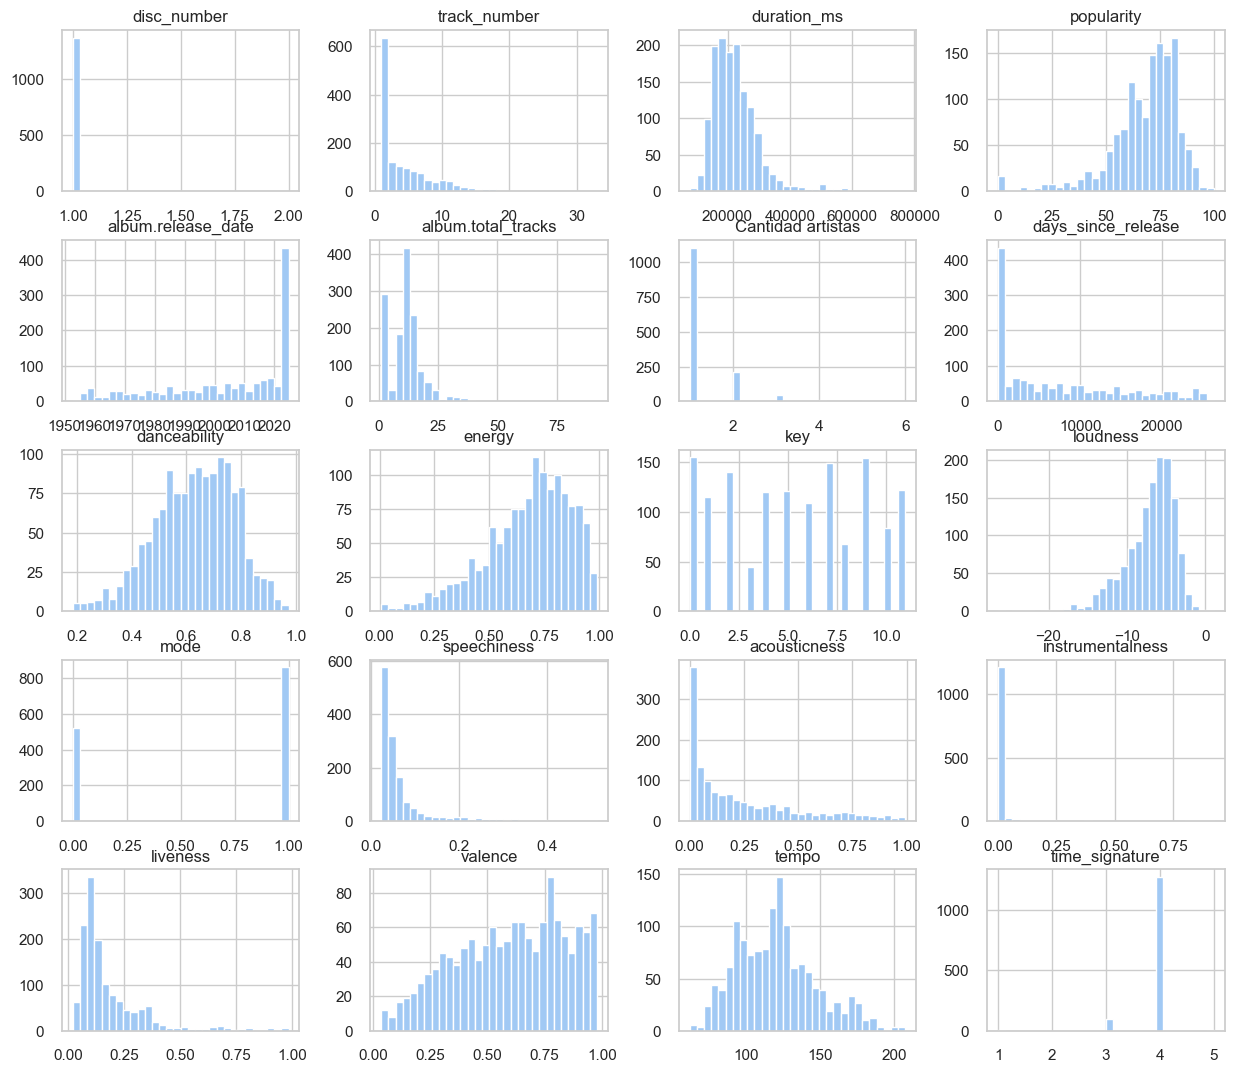

In [916]:
# Graficamos los histogramas de las variables cardinales

sns.set_theme(style="whitegrid", palette="pastel")
datos.hist(figsize=(15,13),bins=30)

/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/1258025129.py:23: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.8, wspace=0.4)


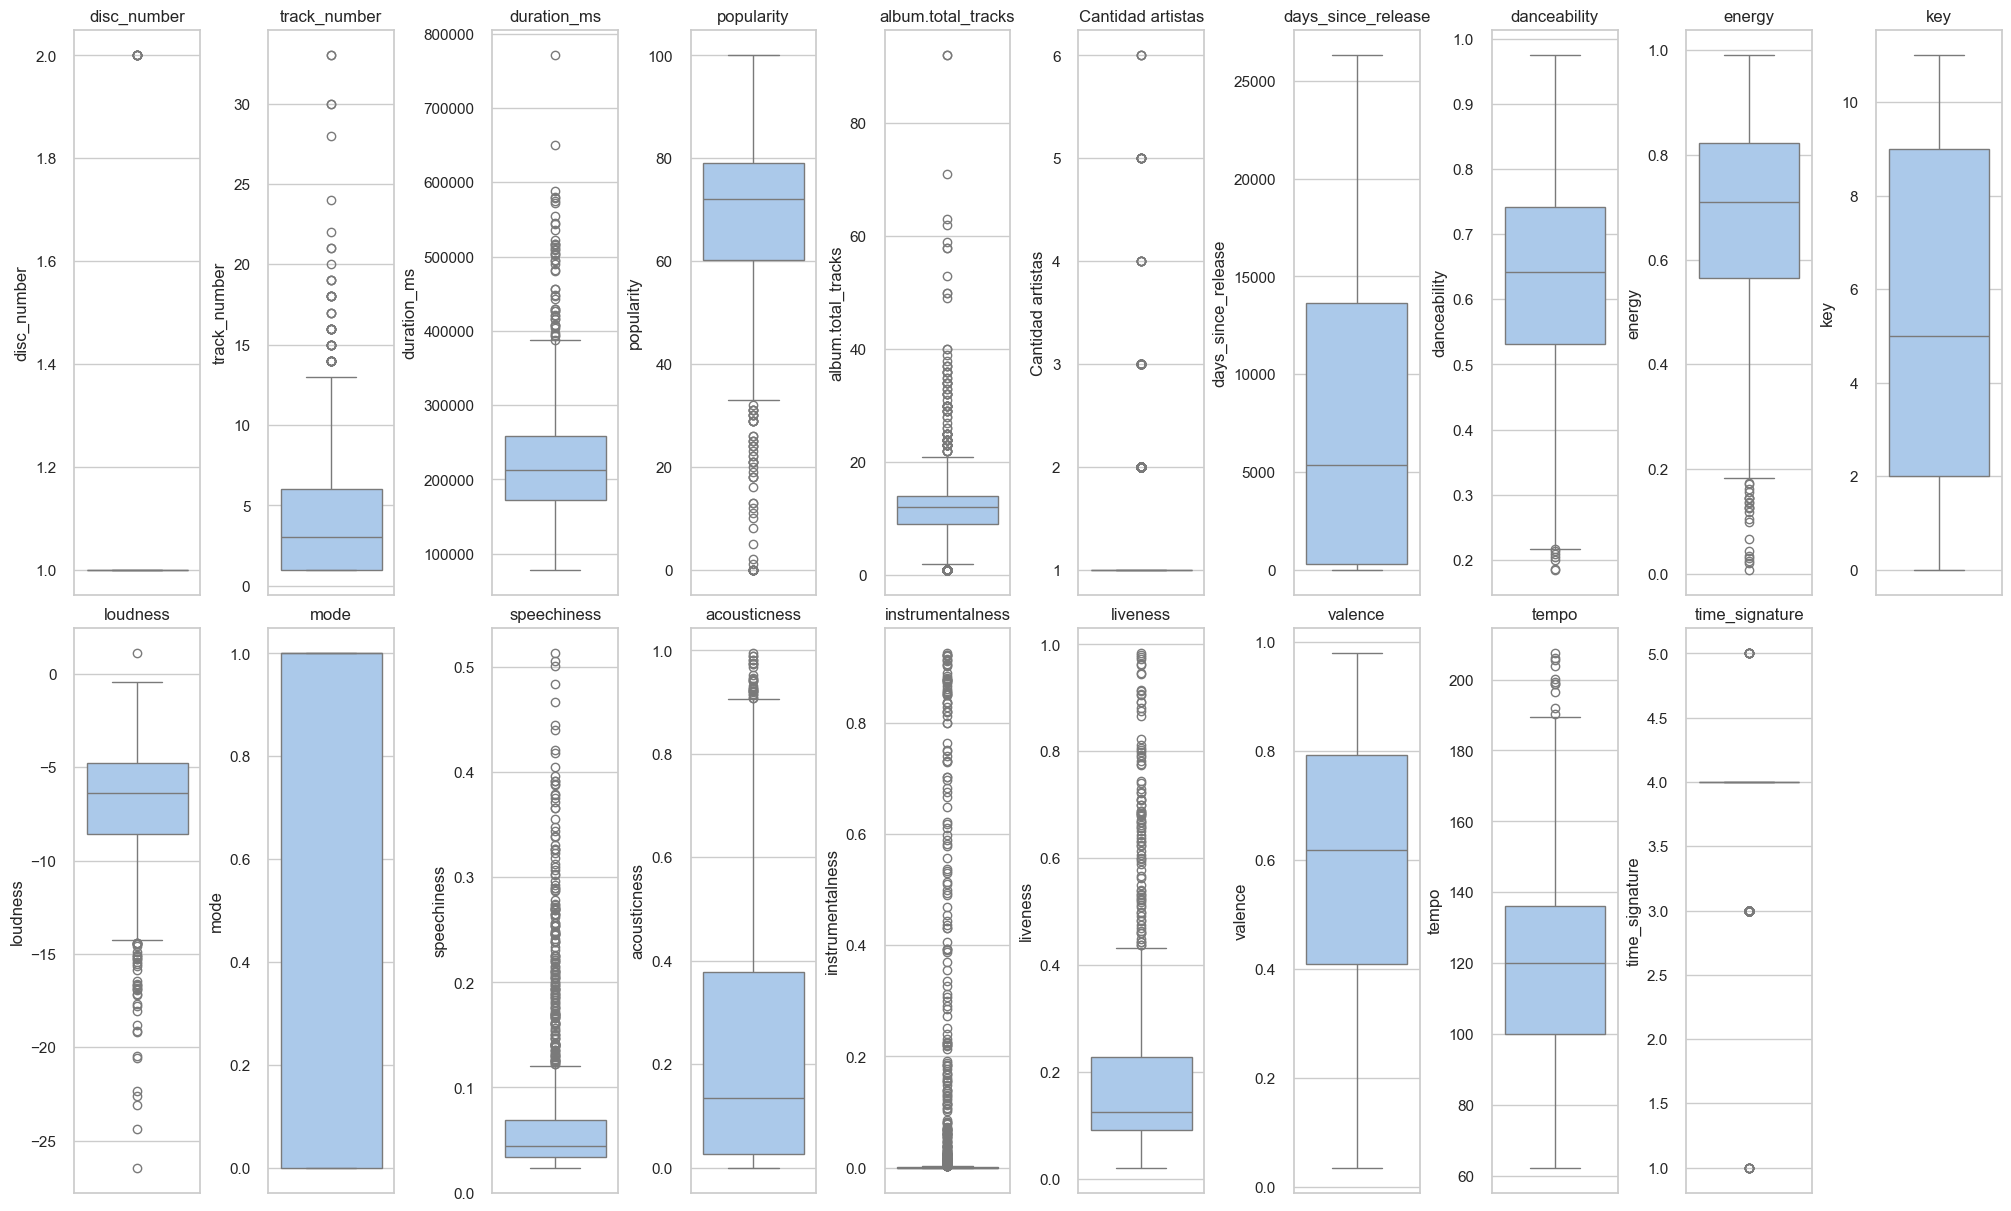

In [917]:
# Realizamos los boxplot para las variables

variables = ['disc_number', 'track_number', 'duration_ms', 'popularity',  
             'album.total_tracks', 'Cantidad artistas', 'days_since_release', 'danceability', 
             'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
             'liveness', 'valence', 'tempo', 'time_signature']

n_cols = 10
n_rows = (len(variables) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), constrained_layout=True)


axes = axes.flatten()

for ax, variable in zip(axes, variables):
    sns.boxplot(y=variable, data=datos, ax=ax)
    ax.set_title(variable)

for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.8, wspace=0.4)

plt.show()

#### Popularidad

El score a predecir en este caso será la popularidad de la canción

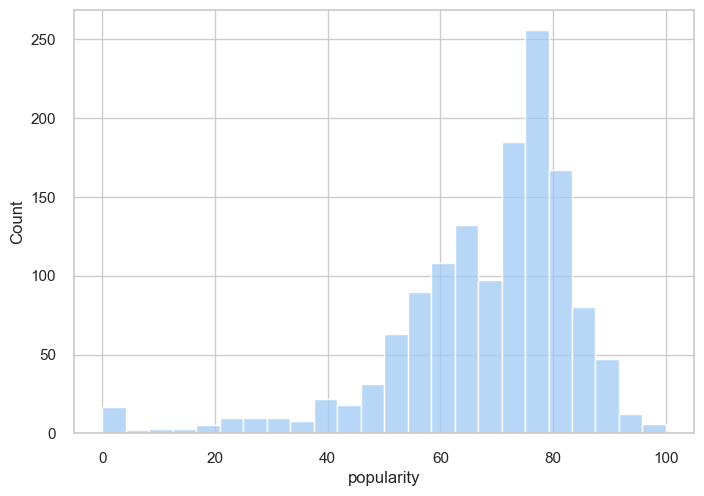

In [918]:
# Lo primero que llama la atención es la cantidad de valores en 0

x=1+3.3*np.log(len(datos))
sns.histplot(datos['popularity'], kde=False,bins=int(x))
plt.show()

In [919]:
(datos['popularity'] == 0).sum(), (datos['popularity'] == 0).sum() / len(datos) * 100

(15, 1.085383502170767)

15 datos, representando el 1,08% tienen valor 0

In [920]:
# Vamos a tomar los datos iguales a 0 ver de qué se trata

pop_0_df = datos[datos['popularity'] == 0]

pop_0_df[['popularity', 'name', 'artist_name', 'days_since_release', 'album.total_tracks']]

popularity                                    name    artist_name  \
4              0                                 Rompela  Charly García   
7              0                                Yo Ya Sé  Charly García   
8              0                       El Club de los 27  Charly García   
11             0                        La Medicina Nº 9  Charly García   
15             0                    Te Recuerdo Invierno  Charly García   
17             0                           Autofemicidio  Charly García   
19             0                                 América  Charly García   
23             0                          Juan Represión  Charly García   
25             0               La Pelicana y el Androide  Charly García   
30             0                 La Lógica del Escorpión  Charly García   
31             0                      Rock and Roll Star  Charly García   
32             0                       Estrellas al Caer  Charly García   
34             0                     Watching the Wheels  Charly García   
1341           0  Nahuati - Cosmic Cowboys Remix - Mixed       George X   
1342           0                 Time for Change - Mixed          Dio S   

      days_since_release  album.total_tracks  
4                      1                  13  
7                      1                  13  
8                      1                  13  
11                     1                  13  
15                     1                  13  
17                     1                  13  
19                     1                  13  
23                     1                  13  
25                     1                  13  
30                     1                  13  
31                     1                  13  
32                     1                  13  
34                     1                  13  
1341                2118                  11  
1342                2118                  11

Los valores con popularidad 0 corresponden a un álbum de Charly García que fue lanzado el día anterior al análisis, por lo que no tiene actualizado el score. Ademas tenemos dos canciones sin artista reconocido. Ya que estos datos representan el 1% del dataset y por las razones antes mencionadas, se decidió eliminarlos.

Se guardaran en un dataframe "pruebas" para posteriores predicciones del modelo

In [921]:
album_nuevo_charly = pop_0_df[pop_0_df['artist_name'] == 'Charly García']
album_nuevo_charly

explicit  disc_number  track_number  duration_ms                      id  \
4      False            1             1       104566  3BSA7eRvD25S4oX4rdngpU   
7      False            1             2       123288  79thbxA6OpIUMVu8mROice   
8      False            1             3       213358  7tgHjgeAYcXQCKEyGpcRj7   
11     False            1             4       225783  3yN6KXgZZfe6SVjRytj5Z2   
15     False            1             5       144042  1WNvt80Eh9glkspXEEhl6W   
17     False            1             6       141976  23syx1ODrqa0BkQzaaHd3r   
19     False            1             7       231708  51Mo6woPjQEPOON5eWc220   
23     False            1             8       248165  6srEY1lFkB0S3mkNbL5BDT   
25     False            1            10       163940  2TBoLwjf3gSWuVa2Bh8Ayv   
30     False            1            12       100637  54e9B1fVeKg8qBLi4ysSXA   
31     False            1            13       140915  4hMpKCpWbYroQ8VKlABGk4   
32     False            1             9       115269  7Je1Wx6gRPt4dhnbgaEAOu   
34     False            1            11       120374  6HUZ1Tfrs0hgx9JliZgVFQ   

                         name  popularity album.album_type  \
4                     Rompela           0            album   
7                    Yo Ya Sé           0            album   
8           El Club de los 27           0            album   
11           La Medicina Nº 9           0            album   
15       Te Recuerdo Invierno           0            album   
17              Autofemicidio           0            album   
19                    América           0            album   
23             Juan Represión           0            album   
25  La Pelicana y el Androide           0            album   
30    La Lógica del Escorpión           0            album   
31         Rock and Roll Star           0            album   
32          Estrellas al Caer           0            album   
34        Watching the Wheels           0            album   

                  album.id               album.name  ... key  loudness  mode  \
4   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   9    -5.167     1   
7   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   7    -7.369     1   
8   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   9    -7.538     1   
11  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0    -7.553     1   
15  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0   -10.313     1   
17  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   2    -7.842     1   
19  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   2    -8.175     1   
23  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0    -9.843     1   
25  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   3    -7.505     0   
30  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   5   -11.869     1   
31  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   9    -8.889     1   
32  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   2    -6.216     1   
34  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0    -8.377     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
4       0.0316       0.15400          0.000000    0.3460    0.953  111.465   
7       0.0328       0.05490          0.000000    0.4830    0.661  129.953   
8       0.0373       0.02630          0.008610    0.2670    0.917  109.980   
11      0.0295       0.04330          0.000003    0.3700    0.793  110.016   
15      0.0296       0.24400          0.026400    0.0704    0.448  179.946   
17      0.0344       0.19400          0.000007    0.4370    0.678  168.004   
19      0.0286       0.00590          0.000000    0.0682    0.344  122.049   
23      0.0281       0.20900          0.003280    0.6670    0.299  104.977   
25      0.0352       0.19600          0.000000    0.1190    0.257   82.172   
30      0.1670       0.11400          0.000005    0.3410    0.339   84.165   
31      0.0333       0.00119       

In [922]:
# Eliminamos los valores donde popularity es 0
datos = datos[datos['popularity'] != 0].reset_index(drop=True)
datos.shape

(1367, 27)

In [923]:
# Visualizamos las canciones con popularity = 1

datos[datos['popularity'] == 1][['popularity', 'name', 'artist_name', 'days_since_release', 'album.total_tracks']]

popularity                                      name artist_name  \
730           1  Al calor de la cumbia - Extended Version   Lo Luiggi   

     days_since_release  album.total_tracks  
730                1449                   6

In [924]:
# Visualizamos las canciones con popularity = 2

datos[datos['popularity'] == 2][['popularity', 'name', 'artist_name', 'days_since_release', 'album.total_tracks']]

popularity                                      name artist_name  \
1316           2  Al Son De Faroa - Hector Couto Dub Remix    Cuartero   

      days_since_release  album.total_tracks  
1316                4428                  31

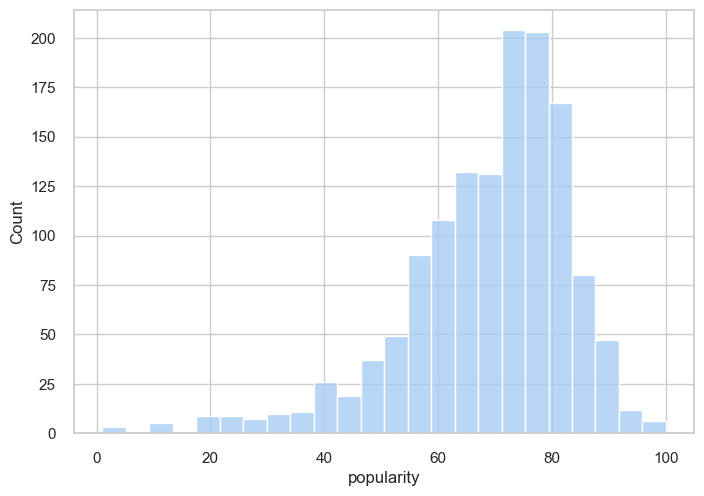

In [925]:
# Volvemos a graficar el histograma

x=1+3.3*np.log(len(datos))
sns.histplot(datos['popularity'], kde=False,bins=int(x))
plt.show()

In [926]:
datos['popularity'].describe()

count    1367.000000
mean       68.718361
std        14.769249
min         1.000000
25%        61.000000
50%        72.000000
75%        79.000000
max       100.000000
Name: popularity, dtype: float64

##### Dividiremos las canciones en 2 grupos distintos

Vamos a tener en cuenta que una canción por debajo de 75 puntos de popularity se considera **'No popular'**, y por encima de ese valor se considera **'Popular'**.

In [927]:
datos['popularity_category'] = pd.cut(datos['popularity'],
                                       bins=[-float('inf'), 74, float('inf')],
                                       labels=['No popular', 'Popular'])

print(datos[['popularity', 'popularity_category']])

      popularity popularity_category
0             96             Popular
1             82             Popular
2             74          No popular
3             72          No popular
4             82             Popular
...          ...                 ...
1362          91             Popular
1363          90             Popular
1364          90             Popular
1365          92             Popular
1366          87             Popular

[1367 rows x 2 columns]


/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/2460495299.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='popularity_category', data=datos, ax=ax1, palette=sns.color_palette('pastel'))
/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/2460495299.py:4: UserWarning: The palette list has more values (10) than needed (2), which may not be intended.
  sns.countplot(x='popularity_category', data=datos, ax=ax1, palette=sns.color_palette('pastel'))


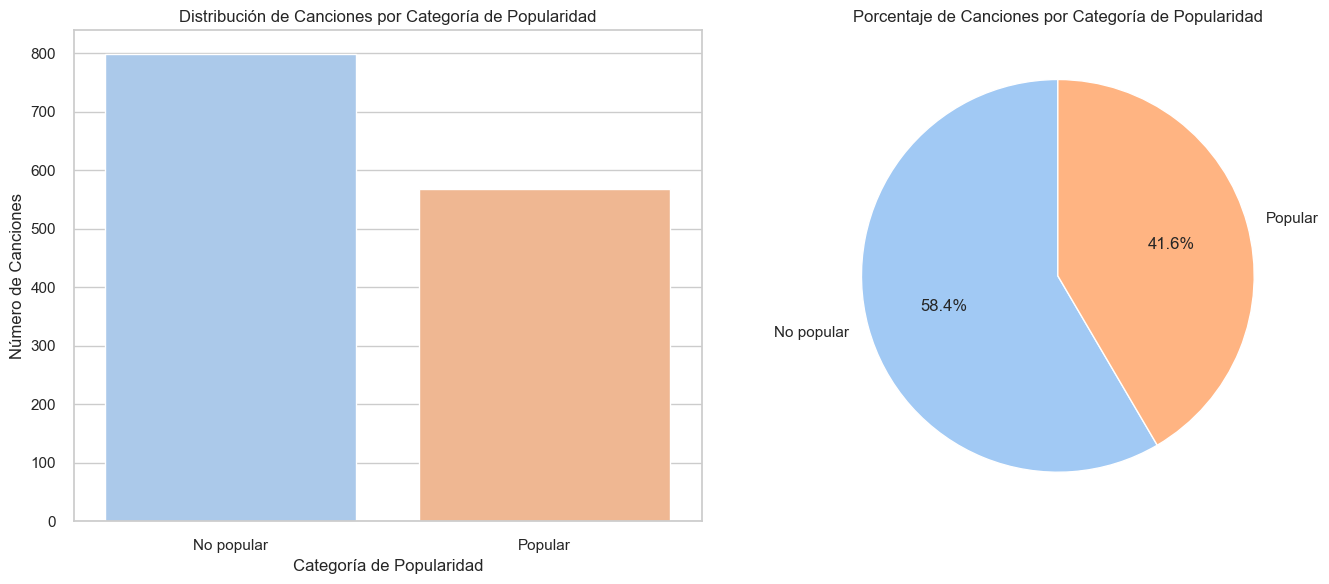

In [928]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Gráfico de barras
sns.countplot(x='popularity_category', data=datos, ax=ax1, palette=sns.color_palette('pastel'))
ax1.set_title('Distribución de Canciones por Categoría de Popularidad')
ax1.set_xlabel('Categoría de Popularidad')
ax1.set_ylabel('Número de Canciones')

# Gráfico de torta (pie chart)
category_percentages = datos['popularity_category'].value_counts(normalize=True) * 100
ax2.pie(category_percentages, labels=category_percentages.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax2.set_title('Porcentaje de Canciones por Categoría de Popularidad')

# Ajustar el layout
plt.tight_layout()
plt.show()

#### Número de disco

In [929]:
# Ahora revisaremos la variable disc_number

datos.groupby(datos['disc_number']).size() / len(datos) * 100

disc_number
1    99.414777
2     0.585223
dtype: float64

Unicamente 8 canciones pertenecen a la segunda parte de algun álbum, representando un 0,58%

In [930]:
# Vamos a ver que valores de popularity tienen esos datos

disc_number_df = datos[datos['disc_number'] == 2]

disc_number_df[['id', 'disc_number', 'popularity', 'name', 'artist_name', 'album.name']]

id  disc_number  popularity  \
290   1YXot2MLAG9sttepCtBRM7            2          71   
311   3GWUv0TDO5E3cHfsxYeptt            2          82   
508   7b4iOHMngSAFhgN120hbWB            2          59   
814   1oDCK7PW72XEZ1pE5rh87A            2          58   
986   1QFh8OH1e78dGd3VyJZCAC            2          77   
1154  5QLHGv0DfpeXLNFo7SFEy1            2          78   
1235  2PpruBYCo4H7WOBJ7Q2EwM            2          83   
1358  1KrktnbXvJUlTdHNam1Xww            2          21   

                                                   name  \
290                                                 踊り子   
311                                      TOMMY & PAMELA   
508                                              A Kiss   
814                                               Smile   
986                                      Boys Don't Cry   
1154                             1979 - Remastered 2012   
1235                                            Hey Ya!   
1358  The Four Agreements - Martin Roth Beats Edit [...   

                artist_name                                         album.name  
290                  Vaundy                                            replica  
311              Peso Pluma                                              ÉXODO  
508          THE DRIVER ERA                                         Girlfriend  
814           Nat King Cole                            The Nat King Cole Story  
986                The Cure                               Three Imaginary Boys  
1154  The Smashing Pumpkins  Mellon Collie And The Infinite Sadness (Deluxe...  
1235                Outkast                        Speakerboxxx/The Love Below  
1358          Matthew Dekay                                      Anjunadeep 11

Por el momento no los vamos a quitar ya que muestran un valor de popularity considerable

#### Número de la pista en su álbum

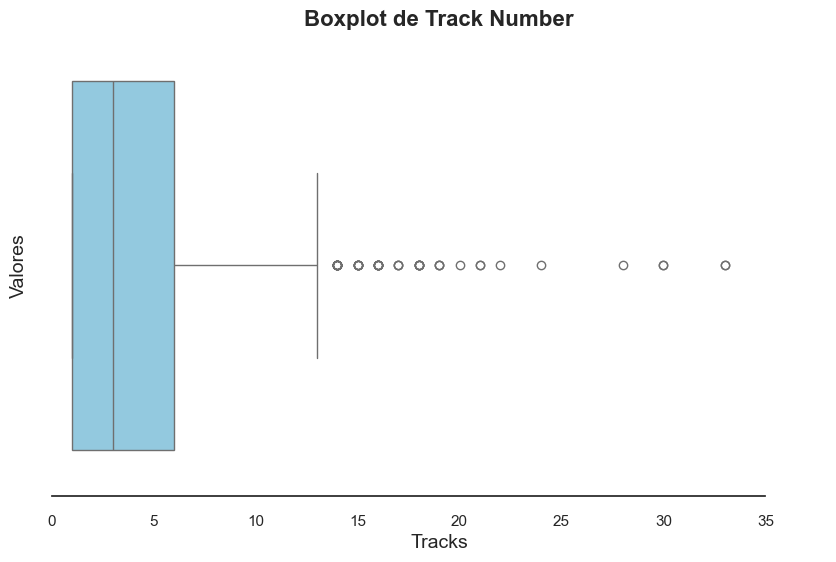

In [931]:
# Para el truck_number se ve un valor máximo de 33, mucho mayor al promedio de 3, por lo que vamos a graficar y ver si se consideran outliers

sns.set_theme(style="white", palette="pastel")

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x=datos.track_number, color='skyblue')

plt.title('Boxplot de Track Number', fontsize=16, fontweight='bold')
plt.xlabel('Tracks', fontsize=14)
plt.ylabel('Valores', fontsize=14)

max_value = datos.track_number.max()
ax.set_xticks(range(0, int(max_value) + 5, 5))
ax.set_xlim(0, max_value + 5)

sns.despine(trim=True)

plt.show()

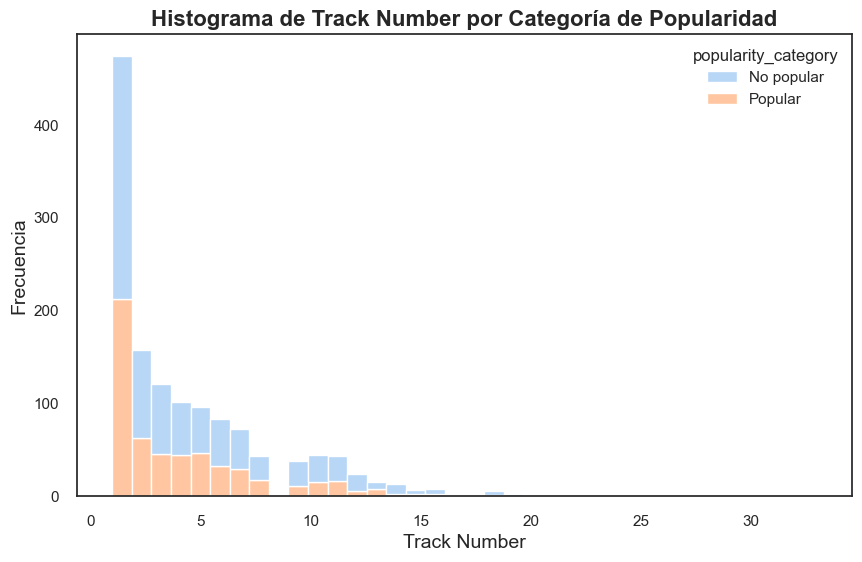

In [932]:
# Graficamos el histograma por categoría

# Configurar el tema de Seaborn con la paleta 'pastel'
sns.set_theme(style="white", palette="pastel")

# Crear el histograma de track_number con hue por popularity_category
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='track_number', hue='popularity_category', palette='pastel', multiple='stack')

# Título y etiquetas
plt.title('Histograma de Track Number por Categoría de Popularidad', fontsize=16, fontweight='bold')
plt.xlabel('Track Number', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [933]:
# Veamos para cuando la canción es la primera del álbum, cuantos datos se consideran populares

primer_cancion = datos[datos['track_number'] == 1]

category_counts = primer_cancion['popularity_category'].value_counts() / len(primer_cancion) * 100

print(category_counts)

No popular    55.063291
Popular       44.936709
Name: popularity_category, dtype: float64


In [934]:
# Vamos a tomar los datos mayores a 30 y ver de qué se trata

track_number_df = datos[datos['track_number'] >= 30]

track_number_df[['track_number', 'popularity', 'name', 'artist_name', 'popularity_category']]

track_number  popularity                     name      artist_name  \
68              33          86  Cowgirls (feat. ERNEST)    Morgan Wallen   
102             30          75      It's Going Down Now  Azumi Takahashi   
1323            30          18            Pressure Drop  Hernan Cattaneo   
1324            33          29              Imaginarium  Hernan Cattaneo   

     popularity_category  
68               Popular  
102              Popular  
1323          No popular  
1324          No popular

Hay cuatro pistas cuyo número en sus álbumes es mayor a 30, lo cual no es muy común, pero tampoco representa un error. A su vez, dos son populares y dos no.

#### Canciones totales en el álbum

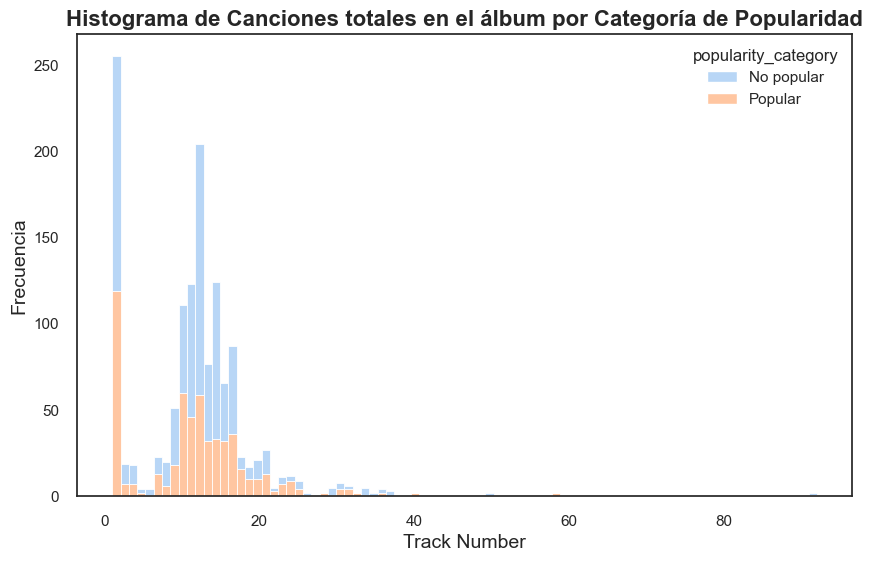

In [935]:
# Graficamos el histograma por categoría

# Configurar el tema de Seaborn con la paleta 'pastel'
sns.set_theme(style="white", palette="pastel")

# Crear el histograma de track_number con hue por popularity_category
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='album.total_tracks', hue='popularity_category', palette='pastel', multiple='stack')

# Título y etiquetas
plt.title('Histograma de Canciones totales en el álbum por Categoría de Popularidad', fontsize=16, fontweight='bold')
plt.xlabel('Track Number', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [936]:
unico_track = datos[datos['album.total_tracks'] == 1]

category_counts = unico_track['popularity_category'].value_counts() / len(unico_track) * 100

print(category_counts)
print('-'*70)
once_tracks = datos[datos['album.total_tracks'] == 11]

category_counts = once_tracks['popularity_category'].value_counts() / len(once_tracks) * 100

print(category_counts)

No popular    50.0
Popular       50.0
Name: popularity_category, dtype: float64
----------------------------------------------------------------------
No popular    62.601626
Popular       37.398374
Name: popularity_category, dtype: float64


Se puede ver que para las canciones que son únicas en su álbum, se ditribuye perfectamente a la mitad entre populares y no. Mientras que el otro pico que vemos en la distribución en 11 canciones, muestra más valores no populares

#### Cantidad de artistas

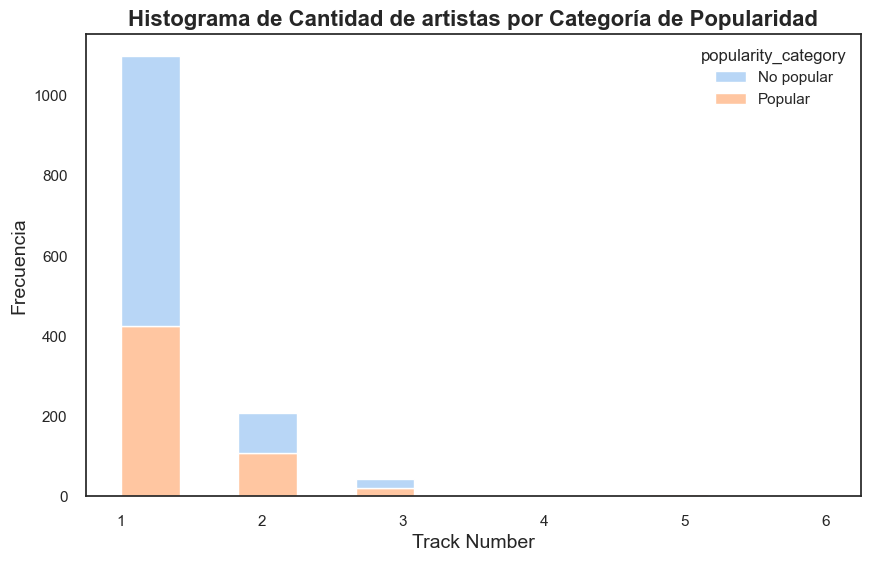

In [937]:
# Graficamos el histograma por categoría

# Configurar el tema de Seaborn con la paleta 'pastel'
sns.set_theme(style="white", palette="pastel")

# Crear el histograma de track_number con hue por popularity_category
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='Cantidad artistas', hue='popularity_category', palette='pastel', multiple='stack')

# Título y etiquetas
plt.title('Histograma de Cantidad de artistas por Categoría de Popularidad', fontsize=16, fontweight='bold')
plt.xlabel('Track Number', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [938]:
# Veamos para cuando la canción tiene un solo artista, cuantos datos se consideran populares

unico_artista = datos[datos['Cantidad artistas'] == 1]

category_counts = unico_artista['popularity_category'].value_counts() / len(unico_artista) * 100

print(category_counts)

No popular    61.202186
Popular       38.797814
Name: popularity_category, dtype: float64


#### Duración de la pista

In [939]:
# Veamos la correlación con la variable popularity

# Calcular correlación de Pearson
pearson_corr = datos[['popularity', 'duration_ms']].corr(method='pearson').iloc[0, 1]

# Calcular correlación de Spearman
spearman_corr = datos[['popularity', 'duration_ms']].corr(method='spearman').iloc[0, 1]

# Mostrar resultados
print(f"Correlación de Pearson: {pearson_corr}")
print(f"Correlación de Spearman: {spearman_corr}")

Correlación de Pearson: -0.2809804916676909
Correlación de Spearman: -0.10531878239822899


No tienen una correlatividad muy fuerte, pero los valores son considerables para el análisis de Pearson

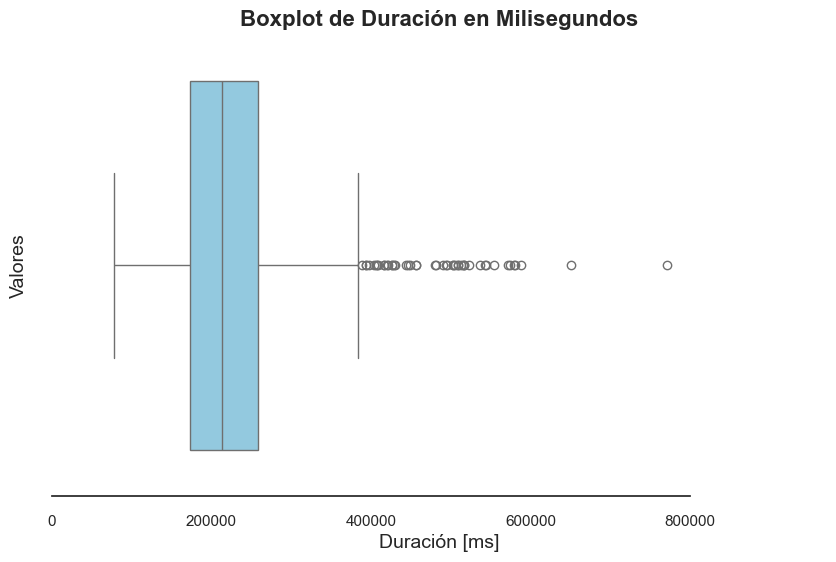

In [940]:
sns.set_theme(style="white", palette="pastel")

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x=datos.duration_ms, color='skyblue')

plt.title('Boxplot de Duración en Milisegundos', fontsize=16, fontweight='bold')
plt.xlabel('Duración [ms]', fontsize=14)
plt.ylabel('Valores', fontsize=14)

max_value = datos.duration_ms.max()
ax.set_xticks(range(0, int(max_value) + 200000, 200000))
ax.set_xlim(0, max_value + 200000)

sns.despine(trim=True)

plt.show()


In [941]:
# Hay un valor muy por encima del resto

longest_df = datos[datos['duration_ms'] >= 600000]

longest_df[['track_number', 'popularity', 'name', 'artist_name', 'duration_ms']]

track_number  popularity  \
481             19          41   
1360            10          30   

                                                   name        artist_name  \
481   Saturday / Level of Concern / Ride / Car Radio...  Twenty One Pilots   
1360                                                Wir     Stephan Bodzin   

      duration_ms  
481        770704  
1360       650322

Vemos que hay un valor por encima de los 700.000 milisegundos (11 minutos y 40 segundos). Se trata de una versión en vivo que combina varias canciones que ya se encuentran en el set de datos, por lo que la eliminaremos.

In [942]:
datos = datos[datos['duration_ms'] < 700000].reset_index(drop=True)

In [943]:
datos['duration_ms'].describe()

count      1366.000000
mean     224649.296486
std       73211.453088
min       78492.000000
25%      173423.250000
50%      213079.500000
75%      258883.000000
max      650322.000000
Name: duration_ms, dtype: float64

Podemos ver que el promedio para las canciones del dataset es de 224.659 milisegundos (3 minutos y 44 segundos), mientras que el mínimo es de 78.492 (1 minuto 18 segundos) y el máximo de 650.322 (10 minutos y 50 segundos)

#### Instrumentalidad

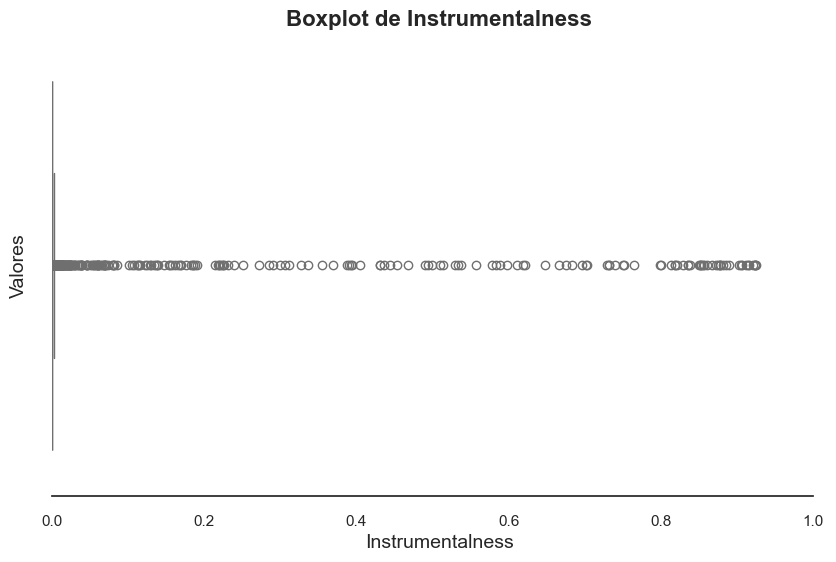

In [944]:
# Graficamos el boxplot para la variable instrumentalness

sns.set_theme(style="white", palette="pastel")

plt.figure(figsize=(10, 6))

ax = sns.boxplot(x=datos.instrumentalness, color='skyblue')

plt.title('Boxplot de Instrumentalness', fontsize=16, fontweight='bold')
plt.xlabel('Instrumentalness', fontsize=14)
plt.ylabel('Valores', fontsize=14)

max_value = datos.instrumentalness.max()
ax.set_xlim(0, max_value + 0.1 * max_value)

sns.despine(trim=True)

plt.show()

In [945]:
datos['instrumentalness'].describe()

count    1366.000000
mean        0.050493
std         0.173020
min         0.000000
25%         0.000000
50%         0.000008
75%         0.001035
max         0.925000
Name: instrumentalness, dtype: float64

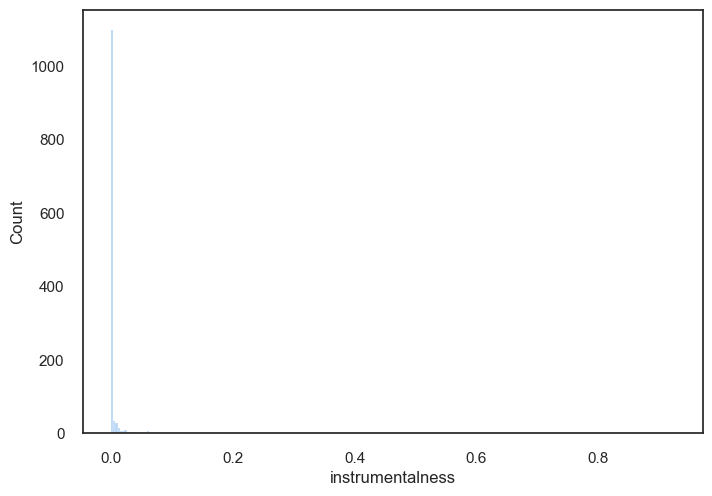

In [946]:
# Graficamos el histograma

x=1+3.3*np.log(len(datos))
sns.histplot(datos['instrumentalness'], kde=False,bins=int(x*10))
plt.show()

In [947]:
(datos['instrumentalness'] == 0).sum() / len(datos) * 100

39.38506588579795

El 39% de los datos es 0, dando a entender que esta es la cantidad de canciones con puras vocales y muy poca instrumental

In [948]:
datos[datos['instrumentalness'] == 0.925000]

explicit  disc_number  track_number  duration_ms  \
1349     False            1             1       495000   

                          id    name  popularity album.album_type  \
1349  7D5rIDUeLi1yc7OzGh4uSz  Allure          22           single   

                    album.id               album.name  ... loudness  mode  \
1349  7u6jvM2cTVYCrO4Y9NULQc  Extinct Dream Series 01  ...  -11.683     1   

      speechiness acousticness  instrumentalness  liveness  valence    tempo  \
1349       0.0489       0.0111             0.925       0.5    0.529  122.005   

      time_signature  popularity_category  
1349               4           No popular  

[1 rows x 28 columns]

Allure es la canción más instrumental que encontraremos en nuestro conjunto de datos

#### Explicitas

In [949]:
# Vemos que cantidad de canciones tienen palabras explicítas
explicit_df = round(datos.groupby(datos['explicit']).size() / len(datos) * 100, 2)
explicit_df

explicit
False    86.46
True     13.54
dtype: float64

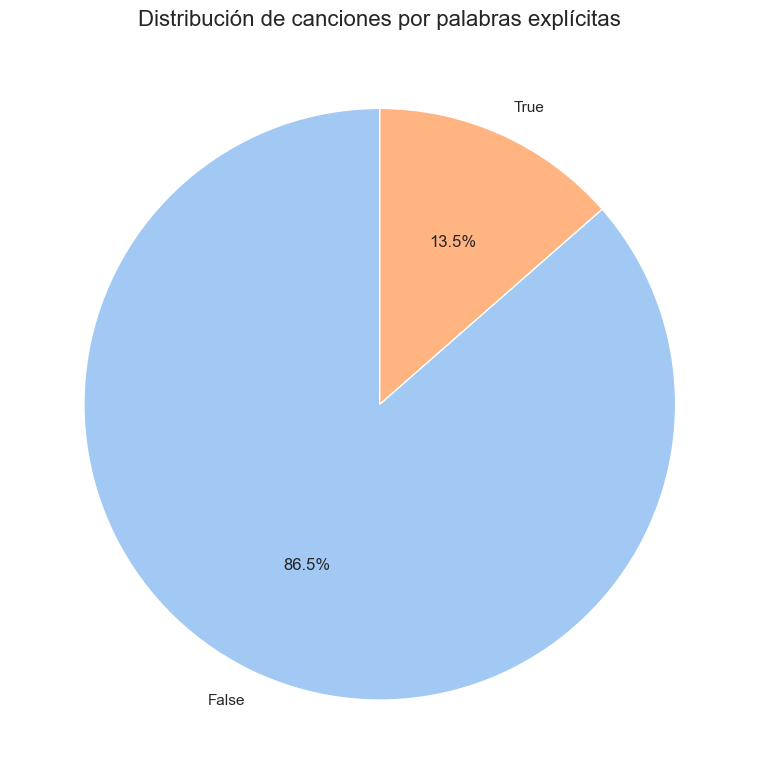

In [950]:
plt.figure(figsize=(8, 8))
plt.pie(explicit_df, labels=explicit_df.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))

plt.title('Distribución de canciones por palabras explícitas', fontsize=16)

plt.tight_layout()
plt.show()

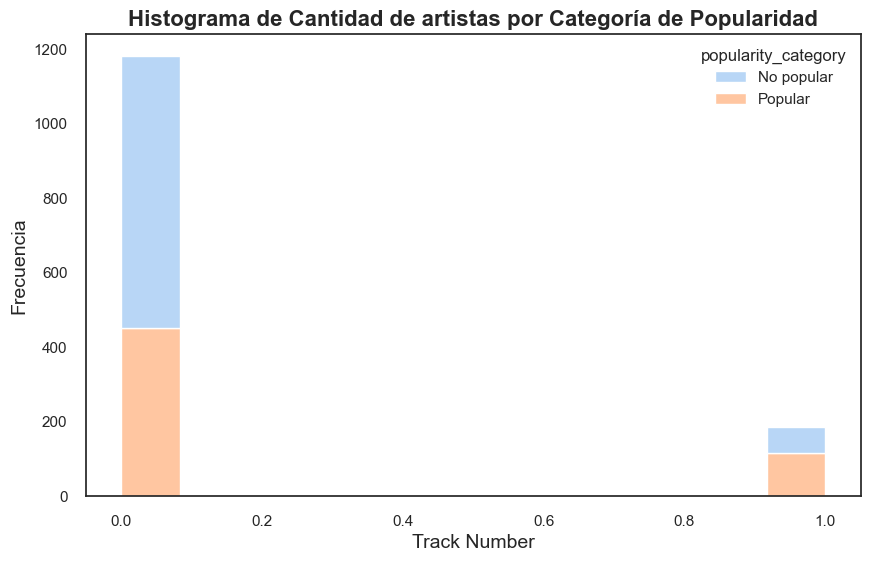

In [951]:
# Graficamos el histograma por categoría

# Configurar el tema de Seaborn con la paleta 'pastel'
sns.set_theme(style="white", palette="pastel")

# Crear el histograma de track_number con hue por popularity_category
plt.figure(figsize=(10, 6))
sns.histplot(data=datos, x='explicit', hue='popularity_category', palette='pastel', multiple='stack')

# Título y etiquetas
plt.title('Histograma de Cantidad de artistas por Categoría de Popularidad', fontsize=16, fontweight='bold')
plt.xlabel('Track Number', fontsize=14)
plt.ylabel('Frecuencia', fontsize=14)

# Mostrar el gráfico
plt.show()

In [952]:
explicit_true = datos[datos['explicit'] == 1]

category_counts = explicit_true['popularity_category'].value_counts() / len(explicit_true) * 100

print(category_counts)

Popular       63.243243
No popular    36.756757
Name: popularity_category, dtype: float64


Pareciera que las canciones con lenguaje explícito son en su mayoría más populares que las que no contienen este tipo de vocabulario, representando el 63%.

#### Tipo de álbum

In [953]:
# Cantidad de canciones pertenecientes a singles o álbumes
round(datos.groupby(datos['album.album_type']).size() / len(datos) * 100, 2)

album.album_type
album     78.04
single    21.96
dtype: float64

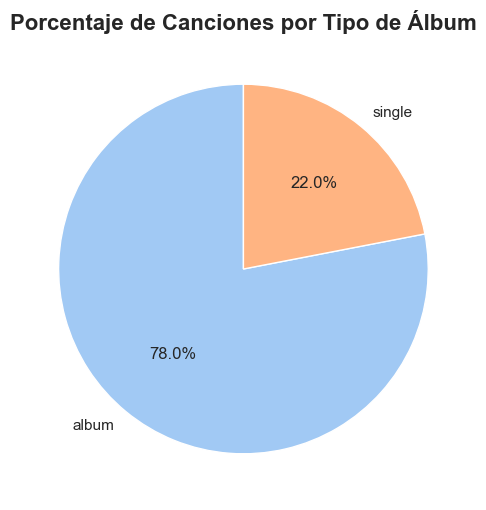

In [954]:
percentages = round(datos.groupby(datos['album.album_type']).size() / len(datos) * 100, 2)

sns.set_theme(style="white", palette="pastel")

plt.figure(figsize=(10, 6))

ax = plt.gca()
ax.pie(percentages, labels=percentages.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
ax.set_title('Porcentaje de Canciones por Tipo de Álbum', fontsize=16, fontweight='bold')

plt.show()

array([[<Axes: title={'center': 'disc_number'}>,
        <Axes: title={'center': 'track_number'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'album.release_date'}>,
        <Axes: title={'center': 'album.total_tracks'}>,
        <Axes: title={'center': 'Cantidad artistas'}>,
        <Axes: title={'center': 'days_since_release'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

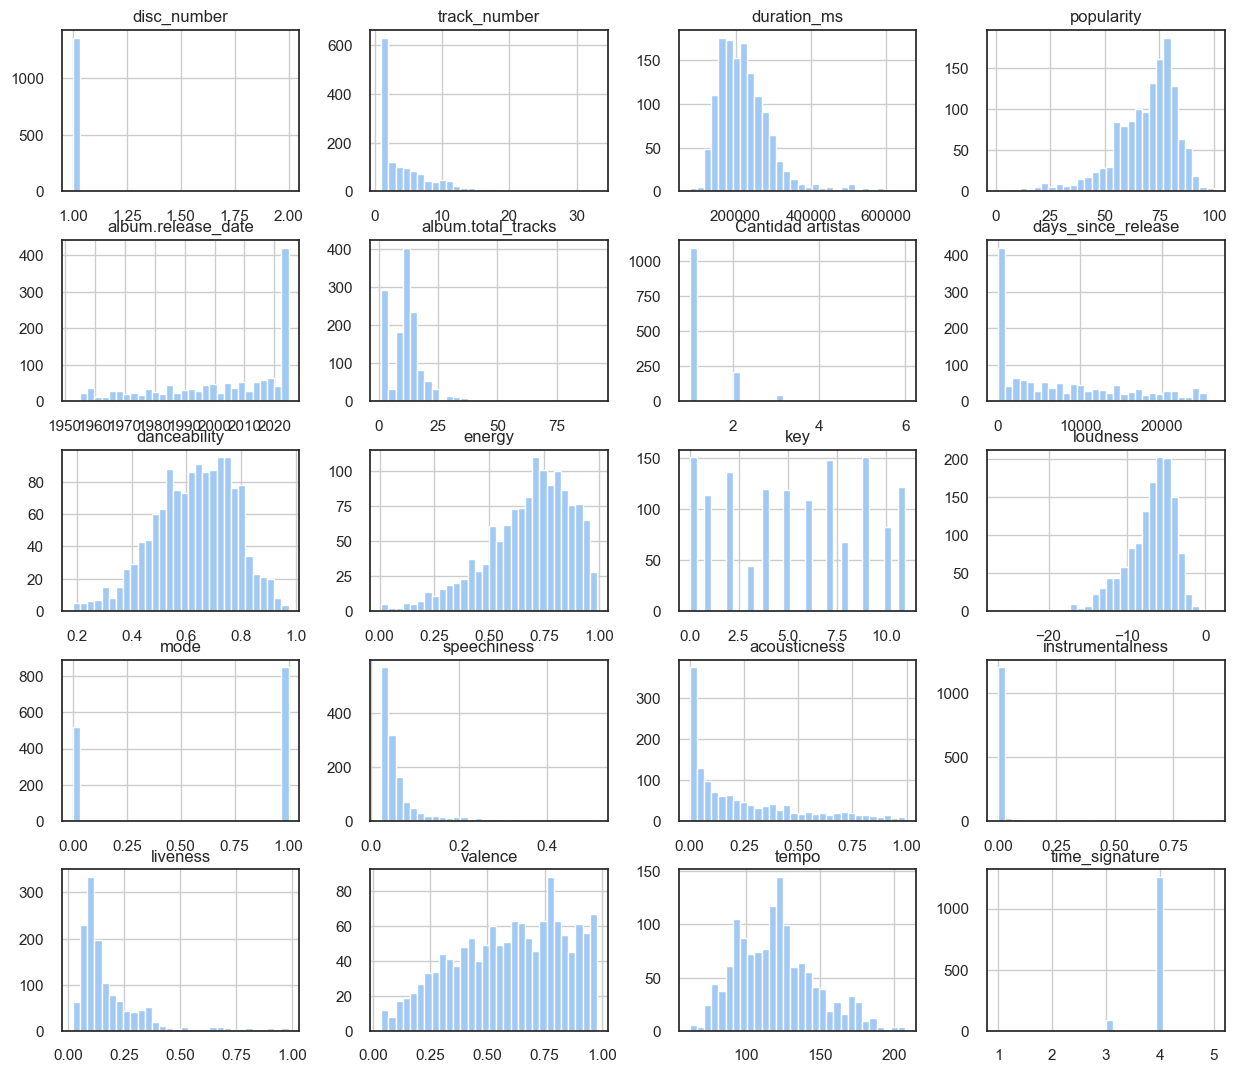

In [955]:
# Graficamos los histogramas una vez realizados los cambios

datos.hist(figsize=(15,13),bins=30)

/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/3296109984.py:23: UserWarning: This figure was using a layout engine that is incompatible with subplots_adjust and/or tight_layout; not calling subplots_adjust.
  plt.subplots_adjust(hspace=0.8, wspace=0.4)


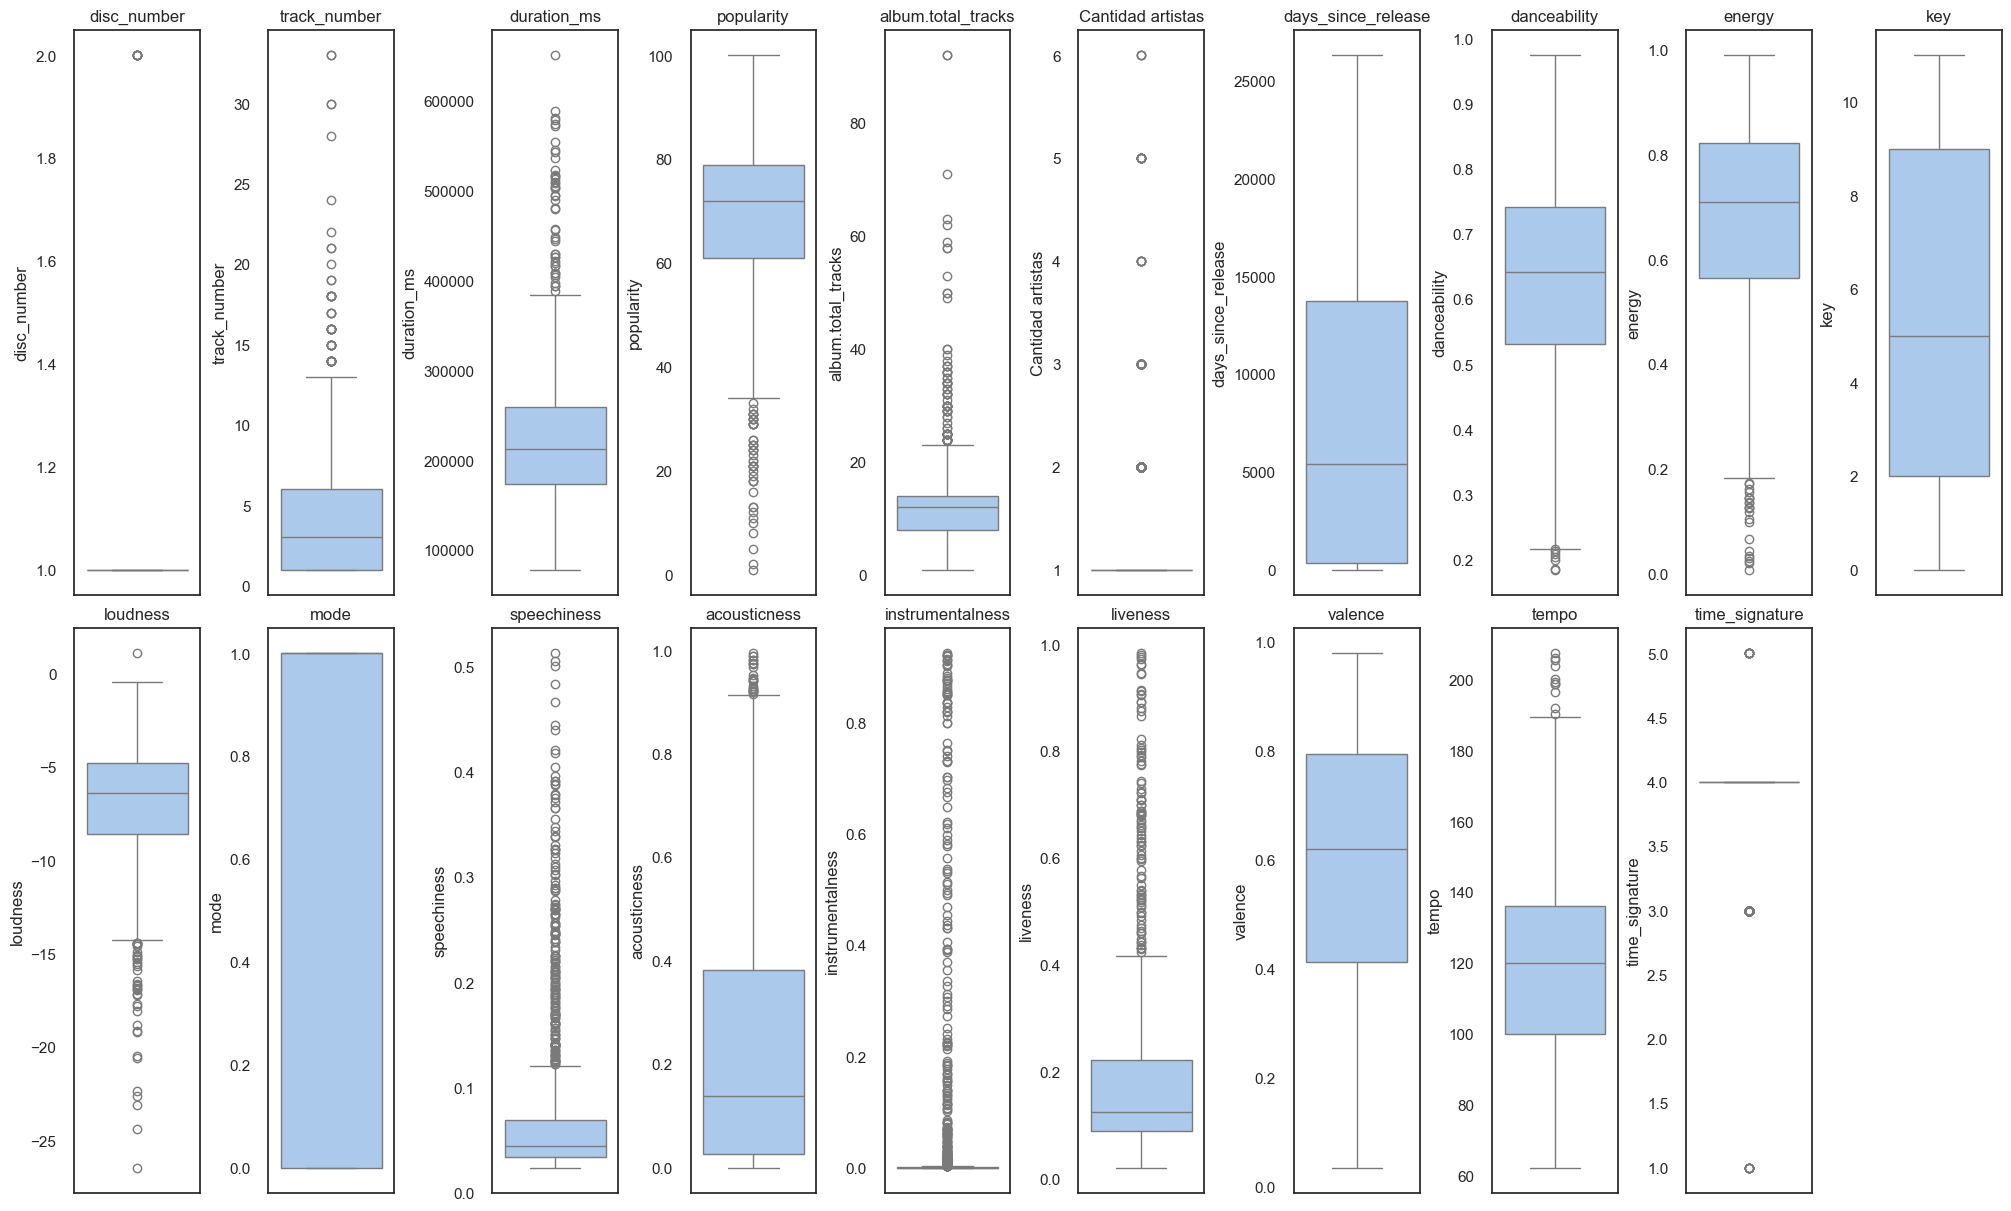

In [956]:
# Realizamos los boxplot para las variables luego de los cambios

variables = ['disc_number', 'track_number', 'duration_ms', 'popularity',  
             'album.total_tracks', 'Cantidad artistas', 'days_since_release', 'danceability', 
             'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 
             'liveness', 'valence', 'tempo', 'time_signature']

n_cols = 10
n_rows = (len(variables) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, 12), constrained_layout=True)


axes = axes.flatten()

for ax, variable in zip(axes, variables):
    sns.boxplot(y=variable, data=datos, ax=ax)
    ax.set_title(variable)

for i in range(len(variables), len(axes)):
    fig.delaxes(axes[i])

plt.subplots_adjust(hspace=0.8, wspace=0.4)

plt.show()

## Análisis de normalidad

Se realizara el análisis para las variables que mayor parecido visual muestran con una distribución normal

In [957]:
# Lista de variables a analizar
variables_norm = ['popularity', 'danceability', 'energy', 'loudness', 'tempo', 'duration_ms', 'liveness']

# Nivel de significancia
nivel_significancia = 0.05

# Iterar sobre cada variable y realizar el test de Shapiro-Wilk
for variable in variables_norm:
    # Realizar el test de Shapiro-Wilk
    p_value = stats.shapiro(datos[variable].dropna())
    
    # Imprimir los resultados
    print(f"Variable: {variable}")
    print("Valor p:", p_value[1])
    
    # Comparar con nivel de significancia
    if p_value[1] < nivel_significancia:
        print("Los datos no siguen una distribución normal.")
    else:
        print("Los datos siguen una distribución normal.")
    
    print()  # Imprimir una línea en blanco para separación

Variable: popularity
Valor p: 6.806696797758398e-26
Los datos no siguen una distribución normal.

Variable: danceability
Valor p: 6.7676788617632155e-09
Los datos no siguen una distribución normal.

Variable: energy
Valor p: 1.2198328287949363e-20
Los datos no siguen una distribución normal.

Variable: loudness
Valor p: 1.590879147524495e-26
Los datos no siguen una distribución normal.

Variable: tempo
Valor p: 1.3118499342379408e-13
Los datos no siguen una distribución normal.

Variable: duration_ms
Valor p: 4.358040921775278e-31
Los datos no siguen una distribución normal.

Variable: liveness
Valor p: 9.178504941327552e-43
Los datos no siguen una distribución normal.



Para todos los casos el p-valor es menor que 0.05 por lo que ser rechaza la hipótesis nula y no se puede decir que las variables sigan una distribución normal. Comparemos para cada caso la media, moda y mediana para ver que tan cerca están entre si, y también que tan cercaon a 0 se encuentra la simetría de la variable

In [958]:
# Estadísticas descriptivas para cada variable

for variable in variables_norm:
    
    data = datos[variable].dropna()
    
    # Calcular la media
    media = data.mean()
    
    # Calcular la moda
    moda = data.mode()[0]  # mode() devuelve una Serie, tomamos el primer valor
    
    # Calcular la mediana
    mediana = data.median()
    
    # Calcular la asimetría (sesgo)
    asimetria = stats.skew(data)
    
    # Imprimir los resultados
    print(f"Variable: {variable}")
    print(f"Media: {media}")
    print(f"Moda: {moda}")
    print(f"Mediana: {mediana}")
    print(f"Asimetría: {asimetria}")
    print()  # Imprimir una línea en blanco para separación

Variable: popularity
Media: 68.73865300146413
Moda: 73
Mediana: 72.0
Asimetría: -1.234457798252777

Variable: danceability
Media: 0.6305146412884334
Moda: 0.66
Mediana: 0.641
Asimetría: -0.3493353286613054

Variable: energy
Media: 0.6776535578330893
Moda: 0.583
Mediana: 0.71
Asimetría: -0.7926110701579868

Variable: loudness
Media: -7.058383601756955
Moda: -6.696
Mediana: -6.3614999999999995
Asimetría: -1.3239228075291443

Variable: tempo
Media: 120.57883382137626
Moda: 122.004
Mediana: 120.00399999999999
Asimetría: 0.511296564925527

Variable: duration_ms
Media: 224649.29648609078
Moda: 300000
Mediana: 213079.5
Asimetría: 1.7129290855661903

Variable: liveness
Media: 0.18549685212298683
Moda: 0.11
Mediana: 0.1245
Asimetría: 2.417712972932964



### QQ-PLOT

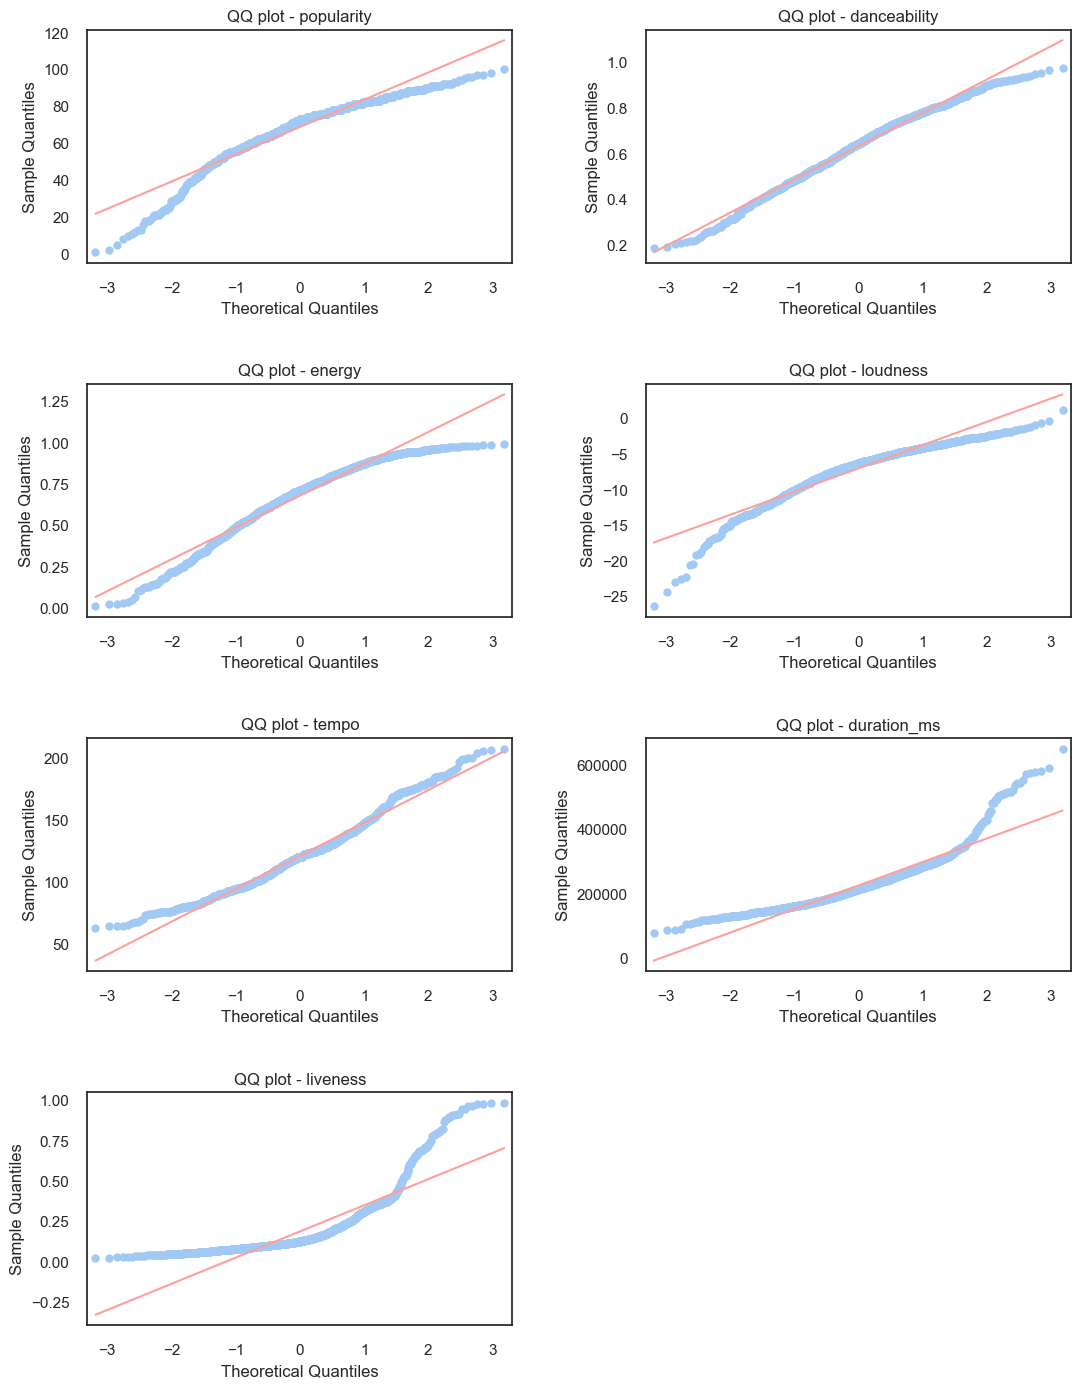

In [959]:
# Creamos el gráfico de cuantiles para cada variable

fig, axes = plt.subplots(4, 2, figsize=(12, 15))

# Ajustar el espacio entre subplots
plt.tight_layout(pad=5.0)

# Iterar sobre las variables y los ejes
for ax, variable in zip(axes.flat, variables_norm):
    # Crear el QQ plot para cada variable
    sm.qqplot(datos[variable], line='s', ax=ax)
    ax.set_title(f'QQ plot - {variable}')

if len(variables_norm) < len(axes.flat):
    fig.delaxes(axes.flat[len(variables_norm)])

# Mostrar los gráficos
plt.show()

Por más de que los test de Shapiro-Wilk hayan rechazado la hipótesis nula, se pueden considerar a las variables tempo, duration_ms y danceability como muy cercanas a una distribución normal. Donde los p-valores para el test si bien dieron bajos, fueron los más altos del dataframe, las variables estadísticas siguen comportamientos similares a los de una nomral y los QQ-PLOT muestran gran relación entre los cuantiles de cada distribución y una normal

## Correlaciones

#### Correlación de pearson

/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/456902776.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = datos.corr(method="pearson")


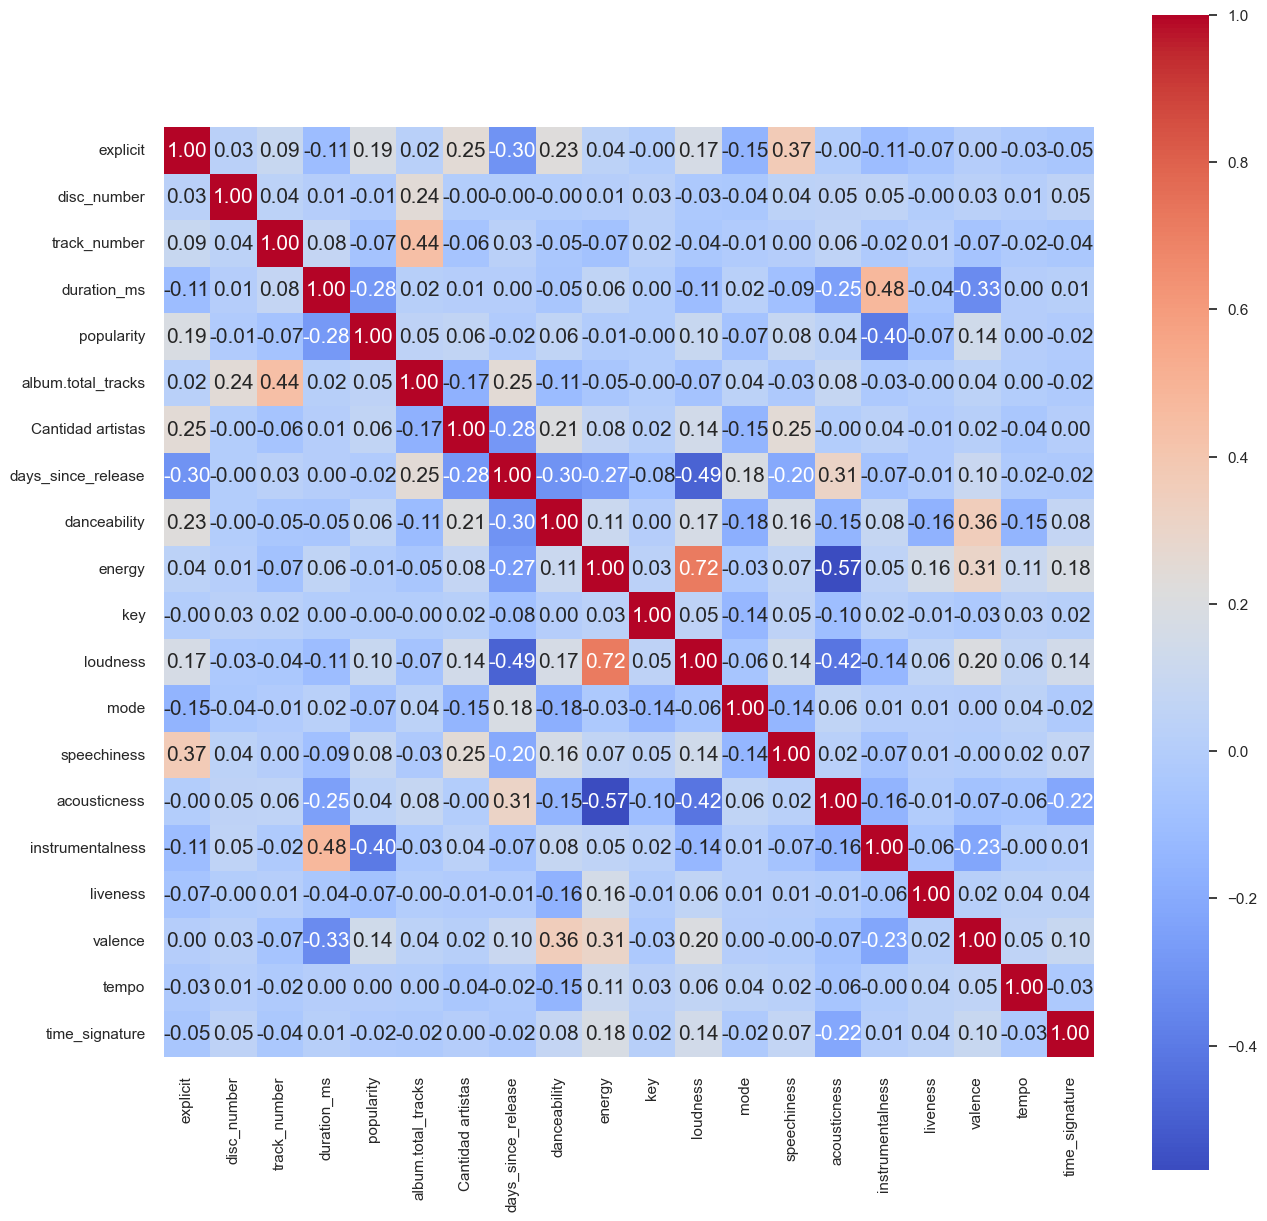

In [960]:
plt.figure(figsize=(15, 15))

correlation = datos.corr(method="pearson")
sns.heatmap(correlation,
            cbar=True,
            square=True,
            annot=True,
            fmt='.2f',
            annot_kws={'size': 15},
            cmap='coolwarm')

plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [961]:
# Calcular la matriz de correlación
correlation = datos.corr(method="pearson")

# Crear una máscara para filtrar los valores mayores a 0.4 en valor absoluto
mask = abs(correlation) > 0.4

# Obtener los pares de variables con correlación mayor a 0.4 en valor absoluto
filtered_corr_pearson = correlation[mask].stack().reset_index()
filtered_corr_pearson.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Eliminar pares duplicados (A, B) y (B, A)
filtered_corr_pearson = filtered_corr_pearson[filtered_corr_pearson['Variable 1'] != filtered_corr_pearson['Variable 2']]
filtered_corr_pearson['Pair'] = filtered_corr_pearson.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
filtered_corr_pearson = filtered_corr_pearson.drop_duplicates(subset='Pair').drop(columns='Pair')

# Mostrar el resultado
print(filtered_corr_pearson)

            Variable 1          Variable 2  Correlation
3         track_number  album.total_tracks     0.441716
5          duration_ms    instrumentalness     0.477613
7           popularity    instrumentalness    -0.402285
12  days_since_release            loudness    -0.487650
15              energy            loudness     0.718021
16              energy        acousticness    -0.568846
21            loudness        acousticness    -0.419774


/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/1305878666.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = datos.corr(method="pearson")


#### Correlación de Spearman

/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/3188054103.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = datos.corr(method="spearman") # Basandome en la correlación de Spearman


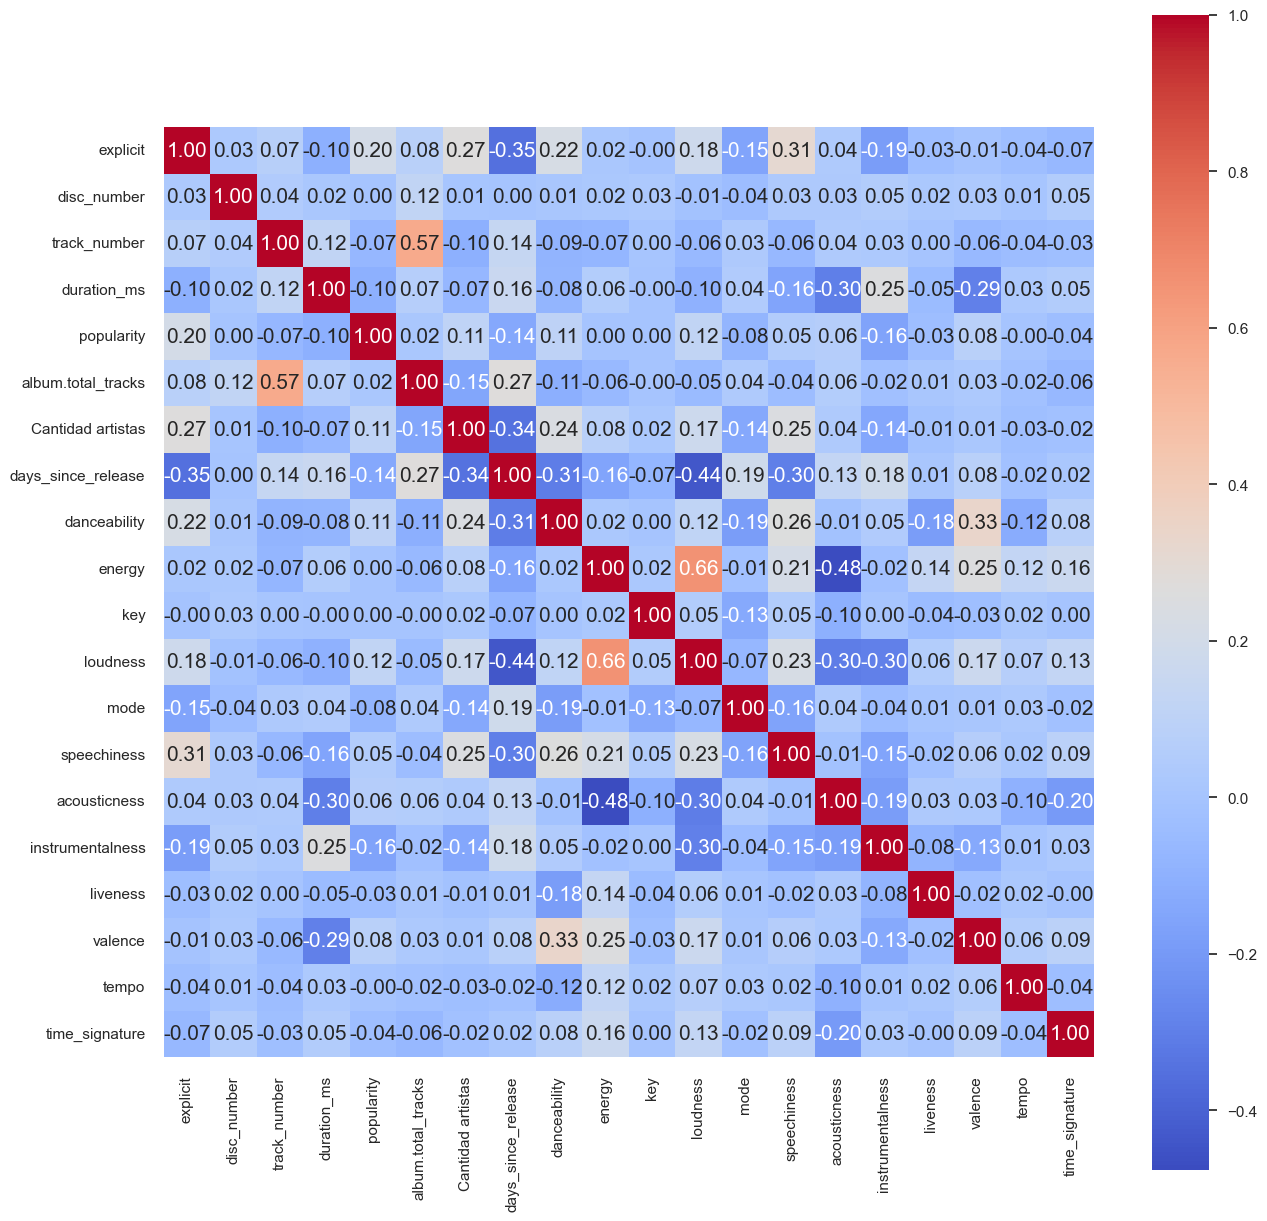

In [962]:
plt.figure(figsize=(15,15))

correlation = datos.corr(method="spearman") # Basandome en la correlación de Spearman
sns.heatmap(correlation,
            cbar = True,
            square = True,
            annot=True,
            fmt= '.2f',
            annot_kws={'size': 15},
            cmap= 'coolwarm')

plt.xticks(rotation = 90)
plt.yticks(rotation = 0)
plt.show()

In [963]:
# Calcular la matriz de correlación
correlation = datos.corr(method="spearman")

# Crear una máscara para filtrar los valores mayores a 0.4 en valor absoluto
mask = abs(correlation) > 0.4

# Obtener los pares de variables con correlación mayor a 0.4 en valor absoluto
filtered_corr_spearman = correlation[mask].stack().reset_index()
filtered_corr_spearman.columns = ['Variable 1', 'Variable 2', 'Correlation']

# Eliminar pares duplicados (A, B) y (B, A)
filtered_corr_spearman = filtered_corr_spearman[filtered_corr_spearman['Variable 1'] != filtered_corr_spearman['Variable 2']]
filtered_corr_spearman['Pair'] = filtered_corr_spearman.apply(lambda x: tuple(sorted([x['Variable 1'], x['Variable 2']])), axis=1)
filtered_corr_spearman = filtered_corr_spearman.drop_duplicates(subset='Pair').drop(columns='Pair')

# Mostrar el resultado
print(filtered_corr_spearman)

            Variable 1          Variable 2  Correlation
3         track_number  album.total_tracks     0.565039
10  days_since_release            loudness    -0.438547
13              energy            loudness     0.658021
14              energy        acousticness    -0.476025


/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/1212751090.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = datos.corr(method="spearman")


### Variables con mayor correlación

In [964]:
# Función para calcular p-valores para correlación de Pearson y Spearman
def calculate_p_values(df, method):
    p_values = []
    for i, row in df.iterrows():
        var1 = row['Variable 1']
        var2 = row['Variable 2']
        if method == 'pearson':
            _, p_value = stats.pearsonr(datos[var1], datos[var2])
        elif method == 'spearman':
            _, p_value = stats.spearmanr(datos[var1], datos[var2])
        p_values.append(p_value)
    return p_values

# Calcular p-valores para Pearson
filtered_corr_pearson['p_value'] = calculate_p_values(filtered_corr_pearson, 'pearson')

# Calcular p-valores para Spearman
filtered_corr_spearman['p_value'] = calculate_p_values(filtered_corr_spearman, 'spearman')

# Ordenar por valor absoluto de la correlación para ambos DataFrames
filtered_corr_pearson = filtered_corr_pearson.assign(
    AbsCorrelation=filtered_corr_pearson['Correlation'].abs()
).sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation')

filtered_corr_spearman = filtered_corr_spearman.assign(
    AbsCorrelation=filtered_corr_spearman['Correlation'].abs()
).sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation')

# Imprimir el DataFrame de Pearson
print("Correlación de Pearson:")
print(filtered_corr_pearson)

# Imprimir una línea en blanco o un separador
print("\n" + "-"*80 + "\n")

# Imprimir el DataFrame de Spearman
print("Correlación de Spearman:")
print(filtered_corr_spearman)

Correlación de Pearson:
            Variable 1          Variable 2  Correlation        p_value
15              energy            loudness     0.718021  6.533102e-217
16              energy        acousticness    -0.568846  6.079604e-118
12  days_since_release            loudness    -0.487650   1.642327e-82
5          duration_ms    instrumentalness     0.477613   9.237958e-79
3         track_number  album.total_tracks     0.441716   2.506825e-66
21            loudness        acousticness    -0.419774   1.979937e-59
7           popularity    instrumentalness    -0.402285   2.751987e-54

--------------------------------------------------------------------------------

Correlación de Spearman:
            Variable 1          Variable 2  Correlation        p_value
13              energy            loudness     0.658021  2.911572e-170
3         track_number  album.total_tracks     0.565039  4.688975e-116
14              energy        acousticness    -0.476025   3.526082e-78
10  days_since_r

Viendo que el p-valor en todos los casos da mucho menor a 0,05 podemos decir que las variables tienen correlación. Se eligió arbitrariamente el umbral 0.4 en valor absoluto para considerar las variables que tienen correlaciones significantes.

Las variables con la correlacion mas fuerte son energy y loudness con un coeficiente de Pearson de 0,71 y de Spearman de 0,65. Indicando que tienen correlación lineal y que además crecen a la par

### Variables con mayor correlación con 'popularity'

In [965]:
# Calcular la correlación con respecto a 'popularity'
correlation_with_popularity = datos.corr()['popularity'].drop('popularity')

# Ordenar por valor absoluto y seleccionar las 6 variables con mayor correlación
top_6_variable_names = correlation_with_popularity.abs().nlargest(9).index

# Ordenar por valor absoluto y seleccionar las 5 variables con menor correlación
bottom_5_variable_names = correlation_with_popularity.abs().nsmallest(6).index

# Crear un DataFrame para almacenar los resultados
results = pd.DataFrame(columns=['Variable', 'Correlation', 'p_value'])

# Calcular p-valores y llenar el DataFrame para las variables con mayor correlación
for variable in top_6_variable_names:
    corr, p_value = stats.pearsonr(datos['popularity'], datos[variable])
    results = results.append({'Variable': variable, 'Correlation': corr, 'p_value': p_value}, ignore_index=True)

# Calcular p-valores y llenar el DataFrame para las variables con menor correlación
results2 = pd.DataFrame(columns=['Variable', 'Correlation', 'p_value'])
for variable in bottom_5_variable_names:
    corr, p_value = stats.pearsonr(datos['popularity'], datos[variable])
    results2 = results2.append({'Variable': variable, 'Correlation': corr, 'p_value': p_value}, ignore_index=True)

# Imprimir ambos DataFrames
print("Variables con mayor correlación:")
print(results)

print("\nVariables con menor correlación:")
print(results2)


Variables con mayor correlación:
           Variable  Correlation       p_value
0  instrumentalness    -0.402285  2.751987e-54
1       duration_ms    -0.276751  1.938002e-25
2          explicit     0.188749  2.021480e-12
3           valence     0.137091  3.653386e-07
4          loudness     0.097814  2.940108e-04
5       speechiness     0.081707  2.510044e-03
6          liveness    -0.073047  6.914596e-03
7              mode    -0.070313  9.334181e-03
8      track_number    -0.069727  9.942008e-03

Variables con menor correlación:
             Variable  Correlation   p_value
0                 key    -0.003680  0.891910
1               tempo     0.004707  0.862014
2              energy    -0.008658  0.749198
3         disc_number    -0.013600  0.615513
4  days_since_release    -0.016366  0.545601
5      time_signature    -0.016717  0.537025


/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/472893865.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_popularity = datos.corr()['popularity'].drop('popularity')
/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/472893865.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': variable, 'Correlation': corr, 'p_value': p_value}, ignore_index=True)
/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/472893865.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': variable, 'Correlation': corr, 'p_value': p

In [966]:
# Crear el array con los nombres de las variables cardinales
high_corr_var = results.Variable.tolist()

# Dropear las variables 'explicit' y 'mode' si están en el DataFrame
variables_a_eliminar = ['explicit', 'mode']
for variable in variables_a_eliminar:
    if variable in high_corr_var:
        high_corr_var.remove(variable)

print(high_corr_var)

['instrumentalness', 'duration_ms', 'valence', 'loudness', 'speechiness', 'liveness', 'track_number']


Se realizó el corte en las primeras 6 variables arbitrariamente

Podemos ver las principales variables correlacionadas a la popularidad de la canción. Si bien algunos valores son bajos, su p-valor es mucho menor a 0,05, por lo que los consideraremos como importantes.

Se eliminó la variable explicit en este caso ya que más adelante se analizará con puntio biserial al tratarse de una variable dicotómica

#### Seguimos con el mismo análisis por el método de Spearman

In [967]:
# Calcular la correlación con respecto a 'popularity'
correlation_with_popularity = datos.corr(method='spearman')['popularity'].drop('popularity')

# Ordenar por valor absoluto y seleccionar las 6 variables con mayor correlación
top_6_variable_names = correlation_with_popularity.abs().nlargest(9).index

# Ordenar por valor absoluto y seleccionar las 5 variables con menor correlación
bottom_5_variable_names = correlation_with_popularity.abs().nsmallest(6).index

# Crear un DataFrame para almacenar los resultados de las variables con mayor correlación
results = pd.DataFrame(columns=['Variable', 'Correlation', 'p_value'])

# Calcular p-valores y llenar el DataFrame usando Spearman para las variables con mayor correlación
for variable in top_6_variable_names:
    corr, p_value = stats.spearmanr(datos['popularity'], datos[variable])
    results = results.append({'Variable': variable, 'Correlation': corr, 'p_value': p_value}, ignore_index=True)

# Ordenar por valor absoluto de la correlación
results['AbsCorrelation'] = results['Correlation'].abs()
results = results.sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation')

# Crear un DataFrame para almacenar los resultados de las variables con menor correlación
results2 = pd.DataFrame(columns=['Variable', 'Correlation', 'p_value'])

# Calcular p-valores y llenar el DataFrame usando Spearman para las variables con menor correlación
for variable in bottom_5_variable_names:
    corr, p_value = stats.spearmanr(datos['popularity'], datos[variable])
    results2 = results2.append({'Variable': variable, 'Correlation': corr, 'p_value': p_value}, ignore_index=True)

# Ordenar por valor absoluto de la correlación en results2
results2['AbsCorrelation'] = results2['Correlation'].abs()
results2 = results2.sort_values(by='AbsCorrelation', ascending=False).drop(columns='AbsCorrelation')

# Imprimir ambos DataFrames
print("Variables con mayor correlación (Spearman):")
print(results)

print("\nVariables con menor correlación (Spearman):")
print(results2)

Variables con mayor correlación (Spearman):
             Variable  Correlation       p_value
0            explicit     0.204403  2.377333e-14
1    instrumentalness    -0.159364  3.170678e-09
2  days_since_release    -0.140300  1.924895e-07
3            loudness     0.120954  7.367589e-06
4   Cantidad artistas     0.106477  8.048984e-05
5        danceability     0.105634  9.171286e-05
6         duration_ms    -0.103475  1.275453e-04
7                mode    -0.080129  3.040870e-03
8             valence     0.078907  3.520304e-03

Variables con menor correlación (Spearman):
             Variable  Correlation   p_value
5            liveness    -0.033514  0.215761
4  album.total_tracks     0.018046  0.505149
3              energy     0.001879  0.944697
2                 key     0.001357  0.960044
1               tempo    -0.000529  0.984426
0         disc_number     0.000134  0.996056


/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/3881610096.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_with_popularity = datos.corr(method='spearman')['popularity'].drop('popularity')
/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/3881610096.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': variable, 'Correlation': corr, 'p_value': p_value}, ignore_index=True)
/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/3881610096.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results = results.append({'Variable': variable, 'Correlation'

In [968]:
# Se agrega cantidad de artistas ya que tiene buena correlacion de Spearman
high_corr_var.extend(['Cantidad artistas'])

print(high_corr_var)

['instrumentalness', 'duration_ms', 'valence', 'loudness', 'speechiness', 'liveness', 'track_number', 'Cantidad artistas']


### Scatterplot
Gradicamos las variables con mayor correlación

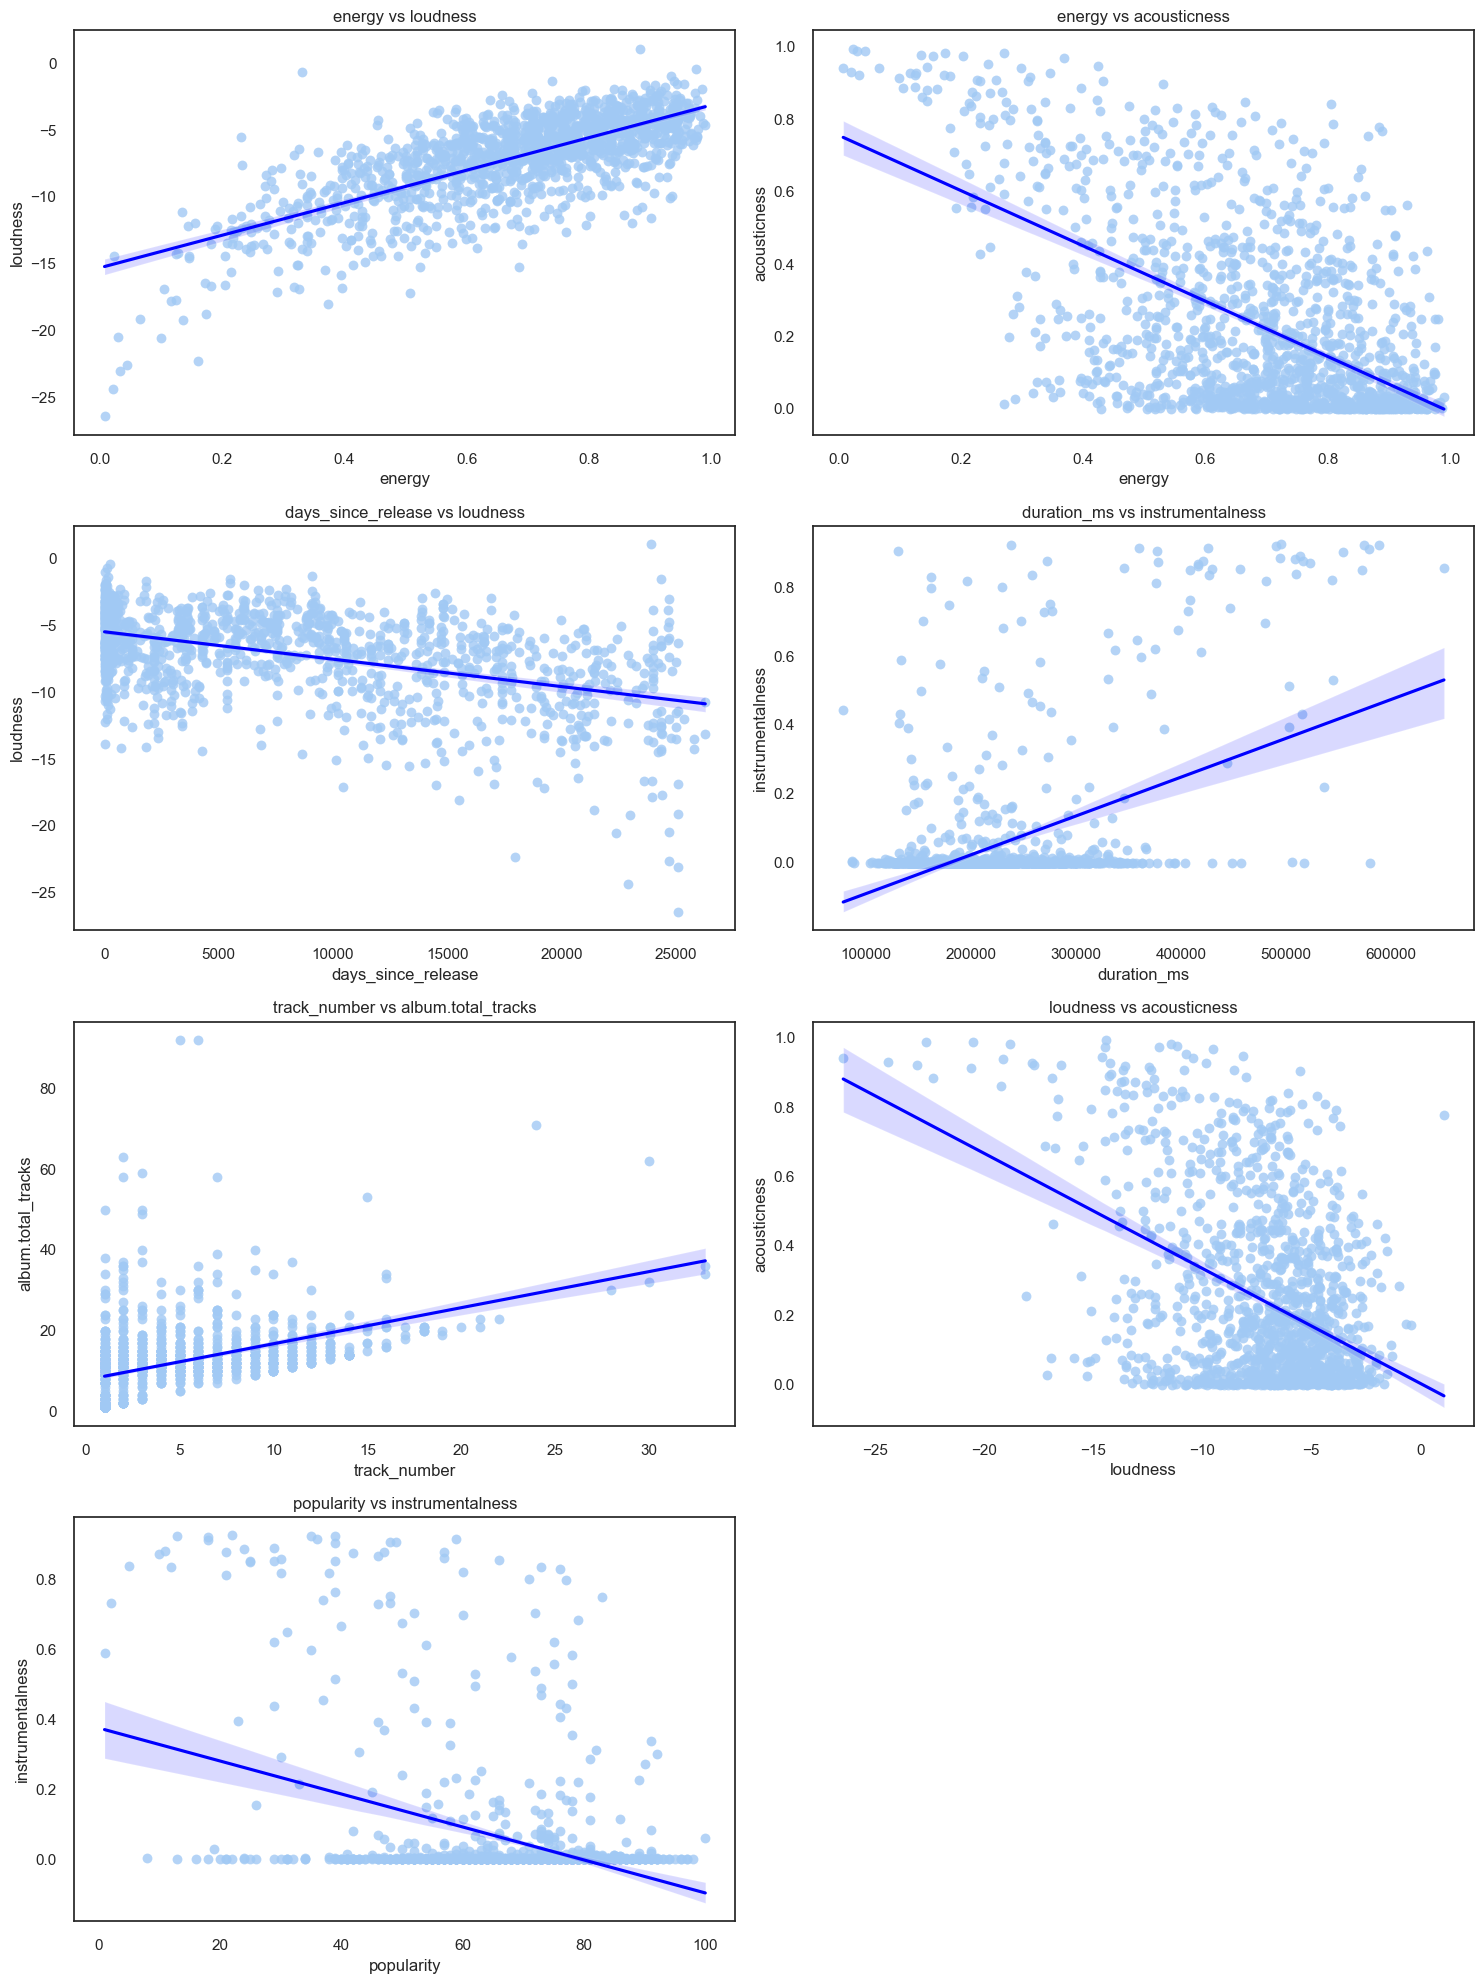

In [969]:
# Número de pares únicos
num_plots = len(filtered_corr_pearson)

# Determinar el número de filas necesarias (dos columnas)
num_cols = 2
num_rows = int(np.ceil(num_plots / num_cols))

# Crear la figura y los ejes
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Aplanar la matriz de ejes para fácil iteración

# Graficar los pares únicos en la cuadrícula
for i, (index, row) in enumerate(filtered_corr_pearson.iterrows()):
    var1 = row['Variable 1']
    var2 = row['Variable 2']
    sns.regplot(x=datos[var1], y=datos[var2], ax=axes[i], scatter_kws={'s':50}, line_kws={'color':'blue'})
    axes[i].set_title(f'{var1} vs {var2}')
    axes[i].set_xlabel(var1)
    axes[i].set_ylabel(var2)

# Eliminar ejes vacíos si hay menos pares que subgráficas
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

#### Conclusiones:

- Cuanto mas ruido tenga una canción, más energía se considera que tendrá. Lo cuál es algo que uno podría entender ya que en una canción el sonido le da su energía.

- Caso contrario al anterior, podemos ver como las energy y acousticness también estan fuertemente relacionadas, pero negativamente. Resulta intuitivo ya que una canción acustica suele ser más tranquila y se podría considerar menos energética.

- Cuanto más nueva una canción, más ruido parecería tener. Se puede ver como a medida que la canción tiene fecha de lanzamiento posterior, los decibelios promedios de la pista disminuyen.

- Cuando comparamos la duración de la canción con la medida de instrumentalidad, vemos como las canciones más largas suelen tener ser más instrumentales. Esto resulta lógico ya que las canciones instrumentales suelen ser más largas que las que poseen muchas líricas.

- Al ver el gráfico comparando las canciones totales en un álbum y el a que posición pertenece la canción, vemos como aumenta. Esto se debe a que cuanto mayor el numero de pista, más canciones debería tener el álbum.

- Luego podemos observar que cuanto más acustica es una canción, menos ruidosa será.

- Y por último podemos ver como las canciones con mayor popularidad resultan ser las menos instrumentales.

In [970]:
# Veamos como se comportan comparado a la media del dataset las canciones con instrumentalness menor a 0,1

# Filtrar el DataFrame para instrumentalness menor a 0.1
filtered_instrumentalness = datos[datos['instrumentalness'] < 0.1]

# Calcular los promedios para el grupo filtrado
mean_popularity_filtered = filtered_instrumentalness['popularity'].mean()
mean_duration_ms_filtered = filtered_instrumentalness['duration_ms'].mean()

# Calcular los promedios para todo el DataFrame
mean_popularity_total = datos['popularity'].mean()
mean_duration_ms_total = datos['duration_ms'].mean()

# Crear un nuevo DataFrame con los promedios
summary_df = pd.DataFrame({
    'Group': ['Instrumentalness < 0.1', 'Total'],
    'Mean Popularity': [mean_popularity_filtered, mean_popularity_total],
    'Mean Duration (ms)': [mean_duration_ms_filtered, mean_duration_ms_total]
})

# Imprimir el DataFrame resultante
print(summary_df)

                    Group  Mean Popularity  Mean Duration (ms)
0  Instrumentalness < 0.1        70.267958       216070.414851
1                   Total        68.738653       224649.296486


Se ve como las canciones con menor instrumental se encuentran por encima del promedio de popularidad y por debajo del promedio de duración

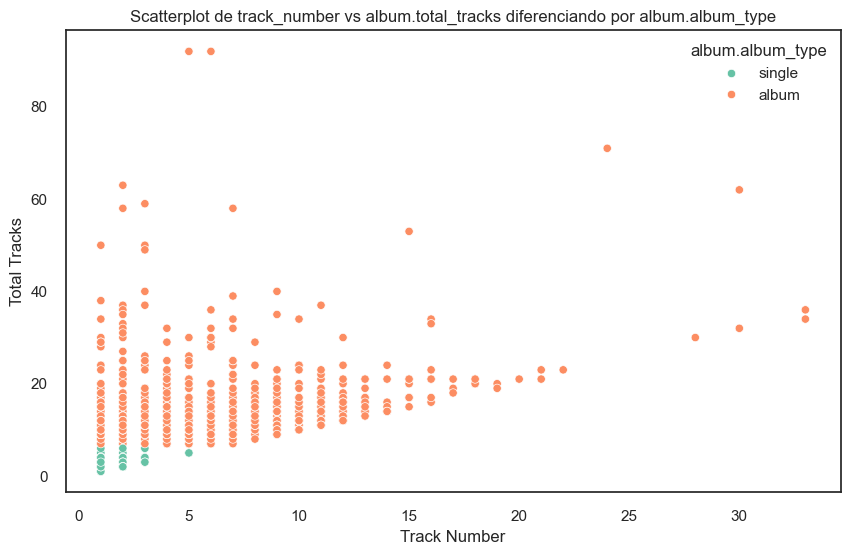

In [971]:
# Gradicaremos nuevamente el scatterplot numero de pista vs pistas totales del álbum, pero separando por colores cuales se consideran singles y cuales álbumes

plt.figure(figsize=(10,6))
sns.scatterplot(x='track_number', y='album.total_tracks', hue='album.album_type', data=datos, palette='Set2')
plt.xlabel('Track Number')
plt.ylabel('Total Tracks')
plt.title('Scatterplot de track_number vs album.total_tracks diferenciando por album.album_type')
plt.show()

Pareciera que para un valor de pistas totales menores o iguales a 6 se corresponde a un single, y mayores, a un álbum

In [972]:
posibles_singles = datos[(datos['album.total_tracks'] <= 6)].groupby('album.album_type').size()

posibles_album = datos[(datos['album.total_tracks'] >= 7)].groupby('album.album_type').size()

print(posibles_singles)
print(posibles_album)


album.album_type
single    300
dtype: int64
album.album_type
album    1066
dtype: int64


Veamos con el test de punto bicerial como es la correlación entre estas variables

In [973]:
# Buscamos el coeficiente Biserial para ver la correlación entre las variables

# Primero vamos a pasar la variable album.album_type a binario

es_single = datos['album.album_type'].apply(lambda x: 1 if x == 'single' else 0)

# Calcular el coeficiente de correlación de punto biserial
coeficiente, p_valor = stats.pointbiserialr(es_single, datos['album.total_tracks'])

# Imprimir el coeficiente de correlación de punto biserial y el p-valor
print("Coeficiente de correlación de punto biserial:", coeficiente)
print("P-valor:", p_valor)

Coeficiente de correlación de punto biserial: -0.630865366298892
P-valor: 1.671928750619733e-152


Obtenemos un valor alto de correlación negativa entre las variables (-0.63), a su vez el p-valor es muy pequeño por lo que podemos concluir que ambas variables estan fuertemente relacionadas

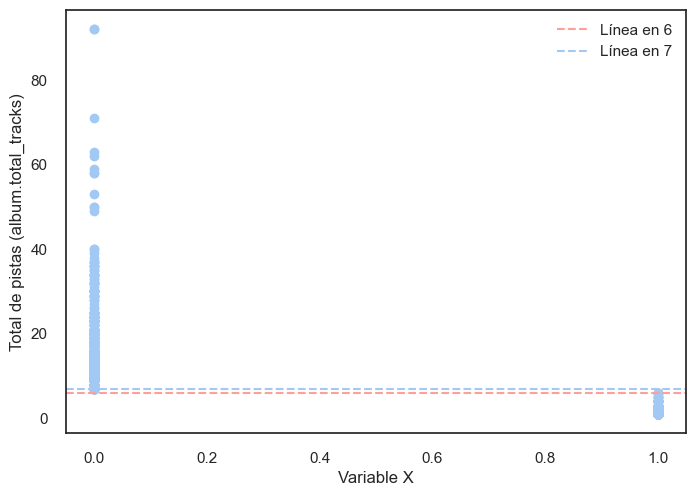

In [974]:
# Gráfico mostrando el corte entre álbum (0) y single (1)

plt.scatter(es_single, datos['album.total_tracks'])

# Agregar líneas horizontales en 6 y 7
plt.axhline(y=6, color='r', linestyle='--', label='Línea en 6')
plt.axhline(y=7, color='b', linestyle='--', label='Línea en 7')

plt.xlabel('Variable X')
plt.ylabel('Total de pistas (album.total_tracks)')
plt.legend()

plt.show()

Se puede observar como efectivamente el corte se produce entre las 6 y 7 pistas del álbum. Un **single** es un pre-lanzamiento del álbum que por lo general tiene una sola canción, pero en varios casos puede tener más. Que en este caso el corte se de en estas cantidades es exclusivo de este conjunto de datos y no significa que siempre sea de la misma manera.

### Punto biserial

Vamos a ver las correlaciones por punto biserial de las variables dicotómicas y la variable popularity

In [975]:
dicotómicas = ['explicit', 'mode']
for i in (dicotómicas):
    coeficiente, p_valor = stats.pointbiserialr(datos[i], datos["popularity"])

    # Imprimir el coeficiente de correlación de punto biserial y el p-valor
    print("Coeficiente de correlación de punto biserial:",i, coeficiente)
    print("P-valor:",i, p_valor)
    if p_valor < 0.05:
        print('Hay correlación entre ambas variables')
        print('')
    else:
        print("No hay correlación entre las variables")
        print('')

Coeficiente de correlación de punto biserial: explicit 0.1887494361426663
P-valor: explicit 2.0214801691786604e-12
Hay correlación entre ambas variables

Coeficiente de correlación de punto biserial: mode -0.07031294516926
P-valor: mode 0.009334181317702068
Hay correlación entre ambas variables



Ambas variables dicotómicas tienen correlación con la variables popularity, por lo que se agregaran al array high_corr_var

In [976]:
high_corr_var.extend(['explicit', 'mode'])
high_corr_var

['instrumentalness',
 'duration_ms',
 'valence',
 'loudness',
 'speechiness',
 'liveness',
 'track_number',
 'Cantidad artistas',
 'explicit',
 'mode']

## Análisis de asimetría

Se tendrán en cuenta las variables que se tomaron para el análisis de normalidad

In [977]:
variables = ['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'tempo',
 'valence']

numericas_df = datos[variables]
numericas_df

danceability  energy  loudness  speechiness  acousticness  \
0            0.924   0.668    -6.795       0.0469        0.4460   
1            0.451   0.711    -4.612       0.0426        0.2400   
2            0.651   0.762    -2.969       0.0315        0.0834   
3            0.575   0.658    -2.340       0.1010        0.0463   
4            0.672   0.702    -4.662       0.0314        0.1680   
...            ...     ...       ...          ...           ...   
1361         0.464   0.417    -9.345       0.0256        0.1360   
1362         0.610   0.926    -4.843       0.0479        0.0310   
1363         0.569   0.882    -2.777       0.0600        0.0316   
1364         0.689   0.454    -7.643       0.0584        0.0351   
1365         0.436   0.299   -10.420       0.0392        0.9420   

      instrumentalness  liveness    tempo  valence  
0             0.000594    0.0678  128.027    0.787  
1             0.000000    0.1540  176.161    0.661  
2             0.000000    0.0701   90.989    0.721  
3             0.000022    0.0627   84.273    0.884  
4             0.000000    0.0445   90.039    0.615  
...                ...       ...      ...      ...  
1361          0.022000    0.0974   67.528    0.479  
1362          0.001200    0.0821  172.638    0.861  
1363          0.000000    0.1420  148.038    0.201  
1364          0.002590    0.0707  159.982    0.912  
1365          0.049800    0.1180   85.744    0.244  

[1366 rows x 9 columns]

In [978]:
# Calculamos el asimetría (skewness) para cada variable

sesgo = datos[variables].skew().to_frame().rename(columns={0:"Asimetria"})
sesgo

Asimetria
danceability      -0.349719
energy            -0.793483
loudness          -1.325379
speechiness        2.971986
acousticness       1.133479
instrumentalness   3.869472
liveness           2.420372
tempo              0.511859
valence           -0.307292

In [979]:
# Veamos que método es más conveniente utilizar

skewness_transformation = {}

for col in variables:
    transformed_log = np.log(datos[col])                        # Log Transformation
    transformed_boxcox = special.boxcox1p(datos[col], 0.15)     # Box-Cox Transformation with lambda=0.15
    transformed_inverse = 1 / datos[col]                        # Inverse Transformation
    transformed_yeojohnson, _ = stats.yeojohnson(datos[col])    # Yeo-Johnson Transformation
    transformed_cbrt = np.cbrt(datos[col])                      # Cube Root Transformation

    # Create a dictionary for the skewness values of each transformation
    transformation_skewness = {
        "Log Transformation": stats.skew(transformed_log),
        "Box-Cox Transformation": stats.skew(transformed_boxcox),
        "Inverse Transformation": stats.skew(transformed_inverse),
        "Yeo Johnson Transformation": stats.skew(transformed_yeojohnson),
        "Cube Root Transformation": stats.skew(transformed_cbrt)}

    # Store the transformation skewness values for the column
    skewness_transformation[col] = transformation_skewness

analisis_sesgo = pd.DataFrame.from_dict(skewness_transformation, orient='index')
analisis_sesgo = pd.concat([sesgo["Asimetria"], analisis_sesgo], axis=1)
analisis_sesgo

/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/opt/homebrew/anaconda3/lib/python3.11/site-packages/scipy/stats/_stats_py.py:1182: RuntimeWarning: invalid value encountered in subtract
  a_zero_mean = a - mean


Asimetria  Log Transformation  Box-Cox Transformation  \
danceability      -0.349719           -1.160027               -0.550782   
energy            -0.793483           -3.403063               -1.078759   
loudness          -1.325379                 NaN                     NaN   
speechiness        2.971986            1.330121                2.760340   
acousticness       1.133479           -1.271578                0.914496   
instrumentalness   3.869472                 NaN                3.682913   
liveness           2.420372            0.552023                2.032170   
tempo              0.511859           -0.039739                0.047147   
valence           -0.307292           -1.577039               -0.516383   

                  Inverse Transformation  Yeo Johnson Transformation  \
danceability                    2.502749                   -0.036224   
energy                         23.812076                   -0.120090   
loudness                       -6.562471                   -0.035617   
speechiness                    -0.211374                    0.693977   
acousticness                   23.673416                    0.284289   
instrumentalness                     NaN                    2.226639   
liveness                        1.517684                    0.334444   
tempo                           0.602402                   -0.001452   
valence                         5.775453                   -0.106154   

                  Cube Root Transformation  
danceability                     -0.847089  
energy                           -1.881937  
loudness                          0.436424  
speechiness                       1.823083  
acousticness                      0.015676  
instrumentalness                  2.484208  
liveness                          1.144925  
tempo                             0.144207  
valence                          -0.991714

Los mejores valores los obtenemos con la transformación Yeo Johnson

In [980]:
# Aplicamos a nuestro dataframe la transformación

for col in variables:
    transformed_col,_ = stats.yeojohnson(datos[col])
    datos[col] = transformed_col

datos.head()

explicit  disc_number  track_number  duration_ms                      id  \
0     False            1             1       195824  6WatFBLVB0x077xWeoVc2k   
1     False            1             1       198495  0SoBfYjQHvL6cuWHtPUYnq   
2     False            1             1       144148  5DSMm0BZXlSvqArsTX00Ge   
3     False            1             5       165054  0c82YIGpQ5dCaXpTNCk4sb   
4     False            1             1       193933  4dLLdfiniBhDP9dlJQIOi4   

                           name  popularity album.album_type  \
0  Si Antes Te Hubiera Conocido          96           single   
1                           Hoy          82           single   
2                        DOCTOR          74           single   
3                       Alegría          72            album   
4        Perdonarte, ¿Para Qué?          82           single   

                 album.id                    album.name  ...  loudness  mode  \
0  5ylbxH7EqpsmHZCRuiYewS  Si Antes Te Hubiera Conocido  ... -2.530862     1   
1  4ENi7P1IV01E2jzbHZeKxn                           Hoy  ... -2.054100     1   
2  3Z9VnhuHM0BmsNUVPWMd7y                        DOCTOR  ... -1.583797     1   
3  3s6jmSUxBLRxzKdevnFmJS                       GOTTI A  ... -1.361235     0   
4  1fXZxmn9aUIo5Zjx8zQFol        Perdonarte, ¿Para Qué?  ... -2.066569     0   

   speechiness acousticness  instrumentalness  liveness   valence     tempo  \
0     0.029656     0.223194          0.000590  0.053141  1.054659  5.659783   
1     0.027986     0.158554         -0.000000  0.092288  0.850481  6.090761   
2     0.022916     0.071215         -0.000000  0.054521  0.946059  5.208957   
3     0.041846     0.042325          0.000022  0.049999  1.220823  5.109219   
4     0.022865     0.124168         -0.000000  0.037791  0.779244  5.195273   

   time_signature  popularity_category  
0               4              Popular  
1               4              Popular  
2               4           No popular  
3               5           No popular  
4               4              Popular  

[5 rows x 28 columns]

array([[<Axes: title={'center': 'disc_number'}>,
        <Axes: title={'center': 'track_number'}>,
        <Axes: title={'center': 'duration_ms'}>,
        <Axes: title={'center': 'popularity'}>],
       [<Axes: title={'center': 'album.release_date'}>,
        <Axes: title={'center': 'album.total_tracks'}>,
        <Axes: title={'center': 'Cantidad artistas'}>,
        <Axes: title={'center': 'days_since_release'}>],
       [<Axes: title={'center': 'danceability'}>,
        <Axes: title={'center': 'energy'}>,
        <Axes: title={'center': 'key'}>,
        <Axes: title={'center': 'loudness'}>],
       [<Axes: title={'center': 'mode'}>,
        <Axes: title={'center': 'speechiness'}>,
        <Axes: title={'center': 'acousticness'}>,
        <Axes: title={'center': 'instrumentalness'}>],
       [<Axes: title={'center': 'liveness'}>,
        <Axes: title={'center': 'valence'}>,
        <Axes: title={'center': 'tempo'}>,
        <Axes: title={'center': 'time_signature'}>]], dtype=object)

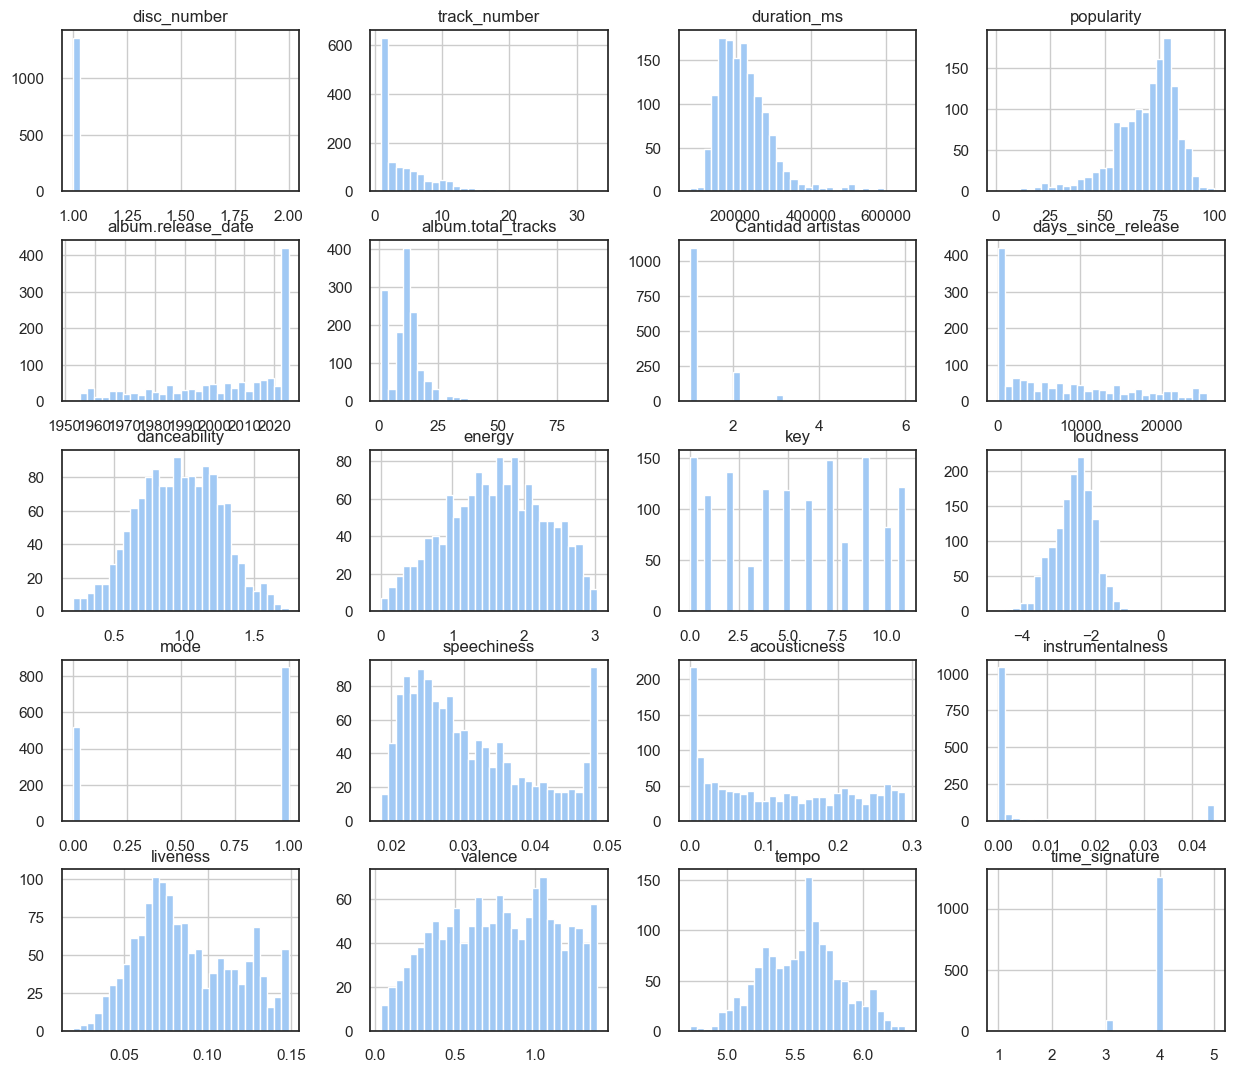

In [981]:
# Veamos como quedaron los histogramas

datos.hist(figsize=(15,13),bins=30)

## Categorización binaria

In [982]:
# Vamos a crear una columna dando valores numericos 0 y 1 a la variable popularity_category

conditions = [
    (datos['popularity_category'] == 'No popular'),
    (datos['popularity_category'] == 'Popular'),
]

choices = [0, 1]

# Asignar la nueva columna
datos['popularity_numeric'] = np.select(conditions, choices)
datos

explicit  disc_number  track_number  duration_ms  \
0        False            1             1       195824   
1        False            1             1       198495   
2        False            1             1       144148   
3        False            1             5       165054   
4        False            1             1       193933   
...        ...          ...           ...          ...   
1361     False            1            12       183956   
1362     False            1             1       200400   
1363      True            1             8       191700   
1364     False            1             6       159245   
1365     False            1             5       200476   

                          id  \
0     6WatFBLVB0x077xWeoVc2k   
1     0SoBfYjQHvL6cuWHtPUYnq   
2     5DSMm0BZXlSvqArsTX00Ge   
3     0c82YIGpQ5dCaXpTNCk4sb   
4     4dLLdfiniBhDP9dlJQIOi4   
...                      ...   
1361  5XeFesFbtLpXzIVDNQP22n   
1362  62bOmKYxYg7dhrC6gH9vFn   
1363  42VsgItocQwOQC3XWZ8JNA   
1364  3qhlB30KknSejmIvZZLjOD   
1365  7zOVh5fGpEwSbZd0g9z80B   

                                                   name  popularity  \
0                          Si Antes Te Hubiera Conocido          96   
1                                                   Hoy          82   
2                                                DOCTOR          74   
3                                               Alegría          72   
4                                Perdonarte, ¿Para Qué?          82   
...                                                 ...         ...   
1361                                   I Wanna Be Yours          91   
1362  Bye Bye Bye - From Deadpool and Wolverine Soun...          90   
1363                         FE!N (feat. Playboi Carti)          90   
1364                                   End of Beginning          92   
1365                                         Satu Bulan          87   

     album.album_type                album.id                    album.name  \
0              single  5ylbxH7EqpsmHZCRuiYewS  Si Antes Te Hubiera Conocido   
1              single  4ENi7P1IV01E2jzbHZeKxn                           Hoy   
2              single  3Z9VnhuHM0BmsNUVPWMd7y                        DOCTOR   
3               album  3s6jmSUxBLRxzKdevnFmJS                       GOTTI A   
4              single  1fXZxmn9aUIo5Zjx8zQFol        Perdonarte, ¿Para Qué?   
...               ...                     ...                           ...   
1361            album  78bpIziExqiI9qztvNFlQu                            AM   
1362            album  20RMokVwJ2wjQ0s8FOdOFC           No Strings Attached   
1363            album  18NOKLkZETa4sWwLMIm0UZ                        UTOPIA   
1364            album  4JDXBZdRPId4devseaAOKH                        DECIDE   
1365           single  5K8xqV7MCe3UIfedVAlZSe                     Terlintas   

      ... mode  speechiness  acousticness instrumentalness  liveness  \
0     ...    1     0.029656      0.223194         0.000590  0.053141   
1     ...    1     0.027986      0.158554        -0.000000  0.092288   
2     ...    1     0.022916      0.071215        -0.000000  0.054521   
3     ...    0     0.041846      0.042325         0.000022  0.049999   
4     ...    0     0.022865      0.124168        -0.000000  0.037791   
...   ...  ...          ...           ...              ...       ...   
1361  ...    0     0.019703      0.105978         0.017205  0.069286   
1362  ...    0     0.030024      0.029174         0.001183  0.061364   
1363  ...    0     0.033922      0.029705        -0.000000  0.088120   
1364  ...    1     0.033460      0.032775         0.002513  0.054877   
1365  ...    1     0.026555      0.288035         0.029548  0.078701   

       valence     tempo  time_signature  popularity_category  \
0     1.054659  5.659783               4              Popular   
1     0.850481  6.090761               4              Popular   
2     0.946059  5.208957               4           No popular 

Las variables a tener en cuenta serán todas las numericas.

No se tendrá en cuenta la variable **days_since_release** ya que lo que se busca con el modelo es conocer el score de popularity que tendría una canción nueva, y dicha variable sería siempre 0 o un número bajo de días desde el lanzamiento. A su vez, la popularidad de la pista esta correlacionada con esta variable ya que tiene en cuenta que tan antiguas son las reproducciones de la pista en su cálculo.

Tampoco se tendrá en cuenta el **track_number** ya que como vimos previamente, la popularidad no depende de esta variable

No se tendrá en cuenta el **disc_number** al que pertenece la canción ya que el 99,4% de los valores pertenecen al disco 1 y no se agrega valor con dicha variable. Además, por punto biserial vimos que no se correlaciona con popularity

Se descartará el resto de las variables que, por análisis de punto biserial y correlación de Pearson, se descubrió no tienen relación con popularity: **album.total_tracks**, **key** y **time_signature**

Se eliminarán **mode** y **duration_ms** ya que empeoran la performance del modelo empíriciamente. Además su correlación con la variable popularity es muy baja

A su vez, se agregarán **acousticness**, **energy**, **tempo** y **danceability** ya que se demostró empíricamente que aportan al modelo

In [983]:
high_corr_var

['instrumentalness',
 'duration_ms',
 'valence',
 'loudness',
 'speechiness',
 'liveness',
 'track_number',
 'Cantidad artistas',
 'explicit',
 'mode']

In [984]:
numericas = ['danceability',
 'energy',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'tempo',
 'valence',
 'explicit',
 'Cantidad artistas',
 'track_number']

numericas_df = datos[numericas]
numericas_df

danceability    energy  loudness  speechiness  acousticness  \
0         1.611654  1.473068 -2.530862     0.029656      0.223194   
1         0.606233  1.640955 -2.054100     0.027986      0.158554   
2         0.982214  1.854793 -1.583797     0.022916      0.071215   
3         0.831119  1.435599 -1.361235     0.041846      0.042325   
4         1.025777  1.604894 -2.066569     0.022865      0.124168   
...            ...       ...       ...          ...           ...   
1361      0.628573  0.695949 -2.966998     0.019703      0.105978   
1362      0.899431  2.659491 -2.110981     0.030024      0.029174   
1363      0.819624  2.425174 -1.519062     0.033922      0.029705   
1364      1.061624  0.790572 -2.687187     0.033460      0.032775   
1365      0.580811  0.434374 -3.125166     0.026555      0.288035   

      instrumentalness  liveness     tempo   valence  explicit  \
0             0.000590  0.053141  5.659783  1.054659     False   
1            -0.000000  0.092288  6.090761  0.850481     False   
2            -0.000000  0.054521  5.208957  0.946059     False   
3             0.000022  0.049999  5.109219  1.220823     False   
4            -0.000000  0.037791  5.195273  0.779244     False   
...                ...       ...       ...       ...       ...   
1361          0.017205  0.069286  4.824181  0.579039     False   
1362          0.001183  0.061364  6.063207  1.180720     False   
1363         -0.000000  0.088120  5.854744  0.218775      True   
1364          0.002513  0.054877  5.959695  1.270233     False   
1365          0.029548  0.078701  5.131680  0.270155     False   

      Cantidad artistas  track_number  
0                     1             1  
1                     2             1  
2                     2             1  
3                     3             5  
4                     2             1  
...                 ...           ...  
1361                  1            12  
1362                  1             1  
1363                  2             8  
1364                  1             6  
1365                  1             5  

[1366 rows x 12 columns]

## Comenzamos con los entrenamientos de los distintos modelos

## K-Means

In [985]:
#Tomamos las variables numéricas y agrego la popularity

numericas_pop = np.append(numericas, 'popularity')
numericas_pop


array(['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'valence',
       'explicit', 'Cantidad artistas', 'track_number', 'popularity'],
      dtype='<U17')

In [986]:
numericas_pop_df = datos[numericas_pop]
numericas_pop_df.head(10)

danceability    energy  loudness  speechiness  acousticness  \
0      1.611654  1.473068 -2.530862     0.029656      0.223194   
1      0.606233  1.640955 -2.054100     0.027986      0.158554   
2      0.982214  1.854793 -1.583797     0.022916      0.071215   
3      0.831119  1.435599 -1.361235     0.041846      0.042325   
4      1.025777  1.604894 -2.066569     0.022865      0.124168   
5      0.971958  2.556582 -1.059207     0.033722      0.217511   
6      1.070134  1.373235 -2.323590     0.025067      0.203218   
7      1.331992  1.876643 -1.627823     0.031786      0.120909   
8      0.949552  2.561932 -2.225673     0.040449      0.108956   
9      1.223778  0.972617 -2.648399     0.034908      0.149808   

   instrumentalness  liveness     tempo   valence  explicit  \
0          0.000590  0.053141  5.659783  1.054659     False   
1         -0.000000  0.092288  6.090761  0.850481     False   
2         -0.000000  0.054521  5.208957  0.946059     False   
3          0.000022  0.049999  5.109219  1.220823     False   
4         -0.000000  0.037791  5.195273  0.779244     False   
5         -0.000000  0.087392  6.026154  1.103521      True   
6         -0.000000  0.123125  5.223518  0.629071     False   
7         -0.000000  0.068447  5.332490  0.839526      True   
8         -0.000000  0.076096  4.958504  1.291607     False   
9          0.000006  0.061090  5.332870  1.083217      True   

   Cantidad artistas  track_number  popularity  
0                  1             1          96  
1                  2             1          82  
2                  2             1          74  
3                  3             5          72  
4                  2             1          82  
5                  2             7          78  
6                  2             1          74  
7                  3             1          83  
8                  2             1          78  
9                  1             5          80

In [987]:
scaler = StandardScaler()


scaled_data = scaler.fit_transform(numericas_pop_df)

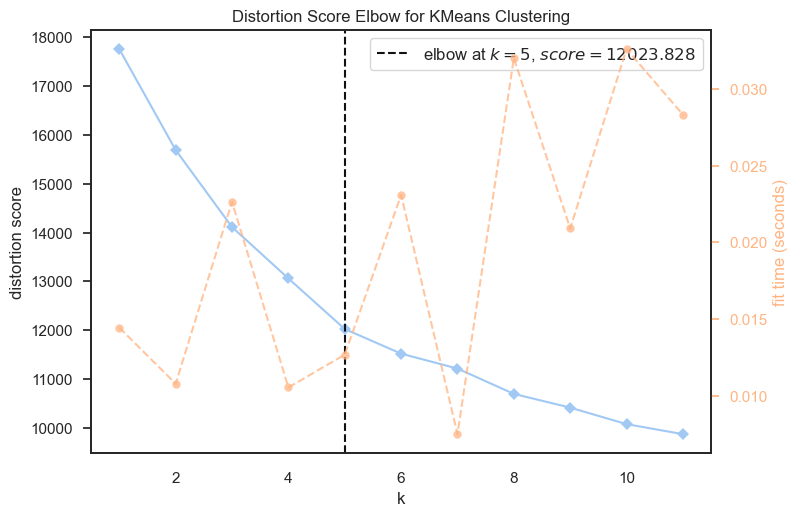

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [988]:
# Realizamos el gráfico de codo

model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12))
visualizer.fit(scaled_data)
visualizer.show()

In [989]:
modelo= Pipeline([('scaler', StandardScaler()),
                  ('model',KMeans(n_clusters=5, max_iter=1000, init='random', random_state=42))
])

modelo.fit_predict(numericas_pop_df)
preds = modelo.fit_predict(numericas_pop_df)
preds

array([2, 4, 2, ..., 3, 2, 0], dtype=int32)

In [990]:
preds.shape

(1366,)

In [991]:
preds=pd.DataFrame(preds)
df_concat = pd.concat([numericas_pop_df.reset_index(drop=True), preds.reset_index(drop=True)], axis=1)
df_concat.rename(columns = {0:'cluster'}, inplace = True)
df_concat.head(5)

danceability    energy  loudness  speechiness  acousticness  \
0      1.611654  1.473068 -2.530862     0.029656      0.223194   
1      0.606233  1.640955 -2.054100     0.027986      0.158554   
2      0.982214  1.854793 -1.583797     0.022916      0.071215   
3      0.831119  1.435599 -1.361235     0.041846      0.042325   
4      1.025777  1.604894 -2.066569     0.022865      0.124168   

   instrumentalness  liveness     tempo   valence  explicit  \
0          0.000590  0.053141  5.659783  1.054659     False   
1         -0.000000  0.092288  6.090761  0.850481     False   
2         -0.000000  0.054521  5.208957  0.946059     False   
3          0.000022  0.049999  5.109219  1.220823     False   
4         -0.000000  0.037791  5.195273  0.779244     False   

   Cantidad artistas  track_number  popularity  cluster  
0                  1             1          96        2  
1                  2             1          82        4  
2                  2             1          74        2  
3                  3             5          72        2  
4                  2             1          82        2

In [992]:
df_concat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1366 entries, 0 to 1365
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   danceability       1366 non-null   float64
 1   energy             1366 non-null   float64
 2   loudness           1366 non-null   float64
 3   speechiness        1366 non-null   float64
 4   acousticness       1366 non-null   float64
 5   instrumentalness   1366 non-null   float64
 6   liveness           1366 non-null   float64
 7   tempo              1366 non-null   float64
 8   valence            1366 non-null   float64
 9   explicit           1366 non-null   bool   
 10  Cantidad artistas  1366 non-null   int64  
 11  track_number       1366 non-null   int64  
 12  popularity         1366 non-null   int64  
 13  cluster            1366 non-null   int32  
dtypes: bool(1), float64(9), int32(1), int64(3)
memory usage: 134.9 KB


In [993]:
pd.set_option('display.max_rows', None)
df_concat.groupby(["cluster"]).describe().transpose()

cluster                           0           1           2           3  \
danceability      count  278.000000  137.000000  418.000000  175.000000   
                  mean     0.760130    1.036022    1.131335    1.160930   
                  std      0.235010    0.292852    0.209520    0.255680   
                  min      0.229559    0.211518    0.550805    0.542566   
                  25%      0.594746    0.811996    0.986329    0.997683   
                  50%      0.737249    1.100149    1.134887    1.154632   
                  75%      0.915352    1.253300    1.271049    1.312118   
                  max      1.306298    1.634784    1.681508    1.742119   
energy            count  278.000000  137.000000  418.000000  175.000000   
                  mean     0.768389    1.801694    1.676080    1.647303   
                  std      0.418628    0.632550    0.503960    0.542867   
                  min      0.007635    0.407141    0.380668    0.414844   
                  25%      0.463396    1.298480    1.265481    1.248317   
                  50%      0.717134    1.833103    1.649036    1.640955   
                  75%      1.026758    2.298222    2.039930    2.015745   
                  max      2.146849    2.972589    2.931462    2.827432   
loudness          count  278.000000  137.000000  418.000000  175.000000   
                  mean    -3.101756   -2.716377   -2.382425   -2.206308   
                  std      0.477500    0.441885    0.512482    0.524111   
                  min     -4.670979   -3.704037   -3.719408   -3.906406   
                  25%     -3.413110   -3.053011   -2.678497   -2.572210   
                  50%     -3.078728   -2.696542   -2.363804   -2.248022   
                  75%     -2.749715   -2.417310   -2.087746   -1.874233   
                  max     -2.033455   -1.705756    1.531586   -0.718994   
speechiness       count  278.000000  137.000000  418.000000  175.000000   
                  mean     0.025843    0.029961    0.032238    0.039155   
                  std      0.005993    0.006702    0.008388    0.008706   
                  min      0.018580    0.020048    0.019236    0.020105   
                  25%      0.021871    0.024785    0.025160    0.031604   
                  50%      0.023869    0.028820    0.030649    0.040993   
                  75%      0.027419    0.034560    0.038534    0.047783   
                  max      0.048463    0.048484    0.048517    0.048518   
acousticness      count  278.000000  137.000000  418.000000  175.000000   
                  mean     0.213684    0.047583    0.129648    0.133539   
                  std      0.076286    0.069305    0.080293    0.086922   
                  min      0.001605    0.000003    0.000155    0.000619   
                  25%      0.169106    0.001575    0.058745    0.042867   
                  50%      0.244905    0.014656    0.128671    0.137052   
                  75%      0.270969    0.061926    0.197255    0.209041   
                  max      0.291511    0.278779    0.280543    0.284712   
instrumentalness  count  278.000000  137.000000  418.000000  175.000000   
                  mean     0.003528    0.041935    0.001199    0.001163   
                  std      0.009438    0.005201    0.004351    0.005318   
                  min     -0.000000    0.019822   -0.000000   -0.000000   
                  25%      0.000000    0.042791    0.000000   -0.000000   
                  50%      0.000014    0.044415    0.000002    0.000000   
                  75%      0.000658    0.044426    0.000129    0.000021   
                  max      0.044421    0.044426    0.036936    0.043965   
liveness          count  278.000000  137.000000  418.000000  175.000000   
                  mean     0.085558    0.081898    0.077527    0.084087   
                  std      0.024788    0.031445    0.027310    0.026508   
                  min      0.031889    0.021603    0.019152    0.029507   
                  25%    

In [994]:
pd.reset_option('display.max_rows')

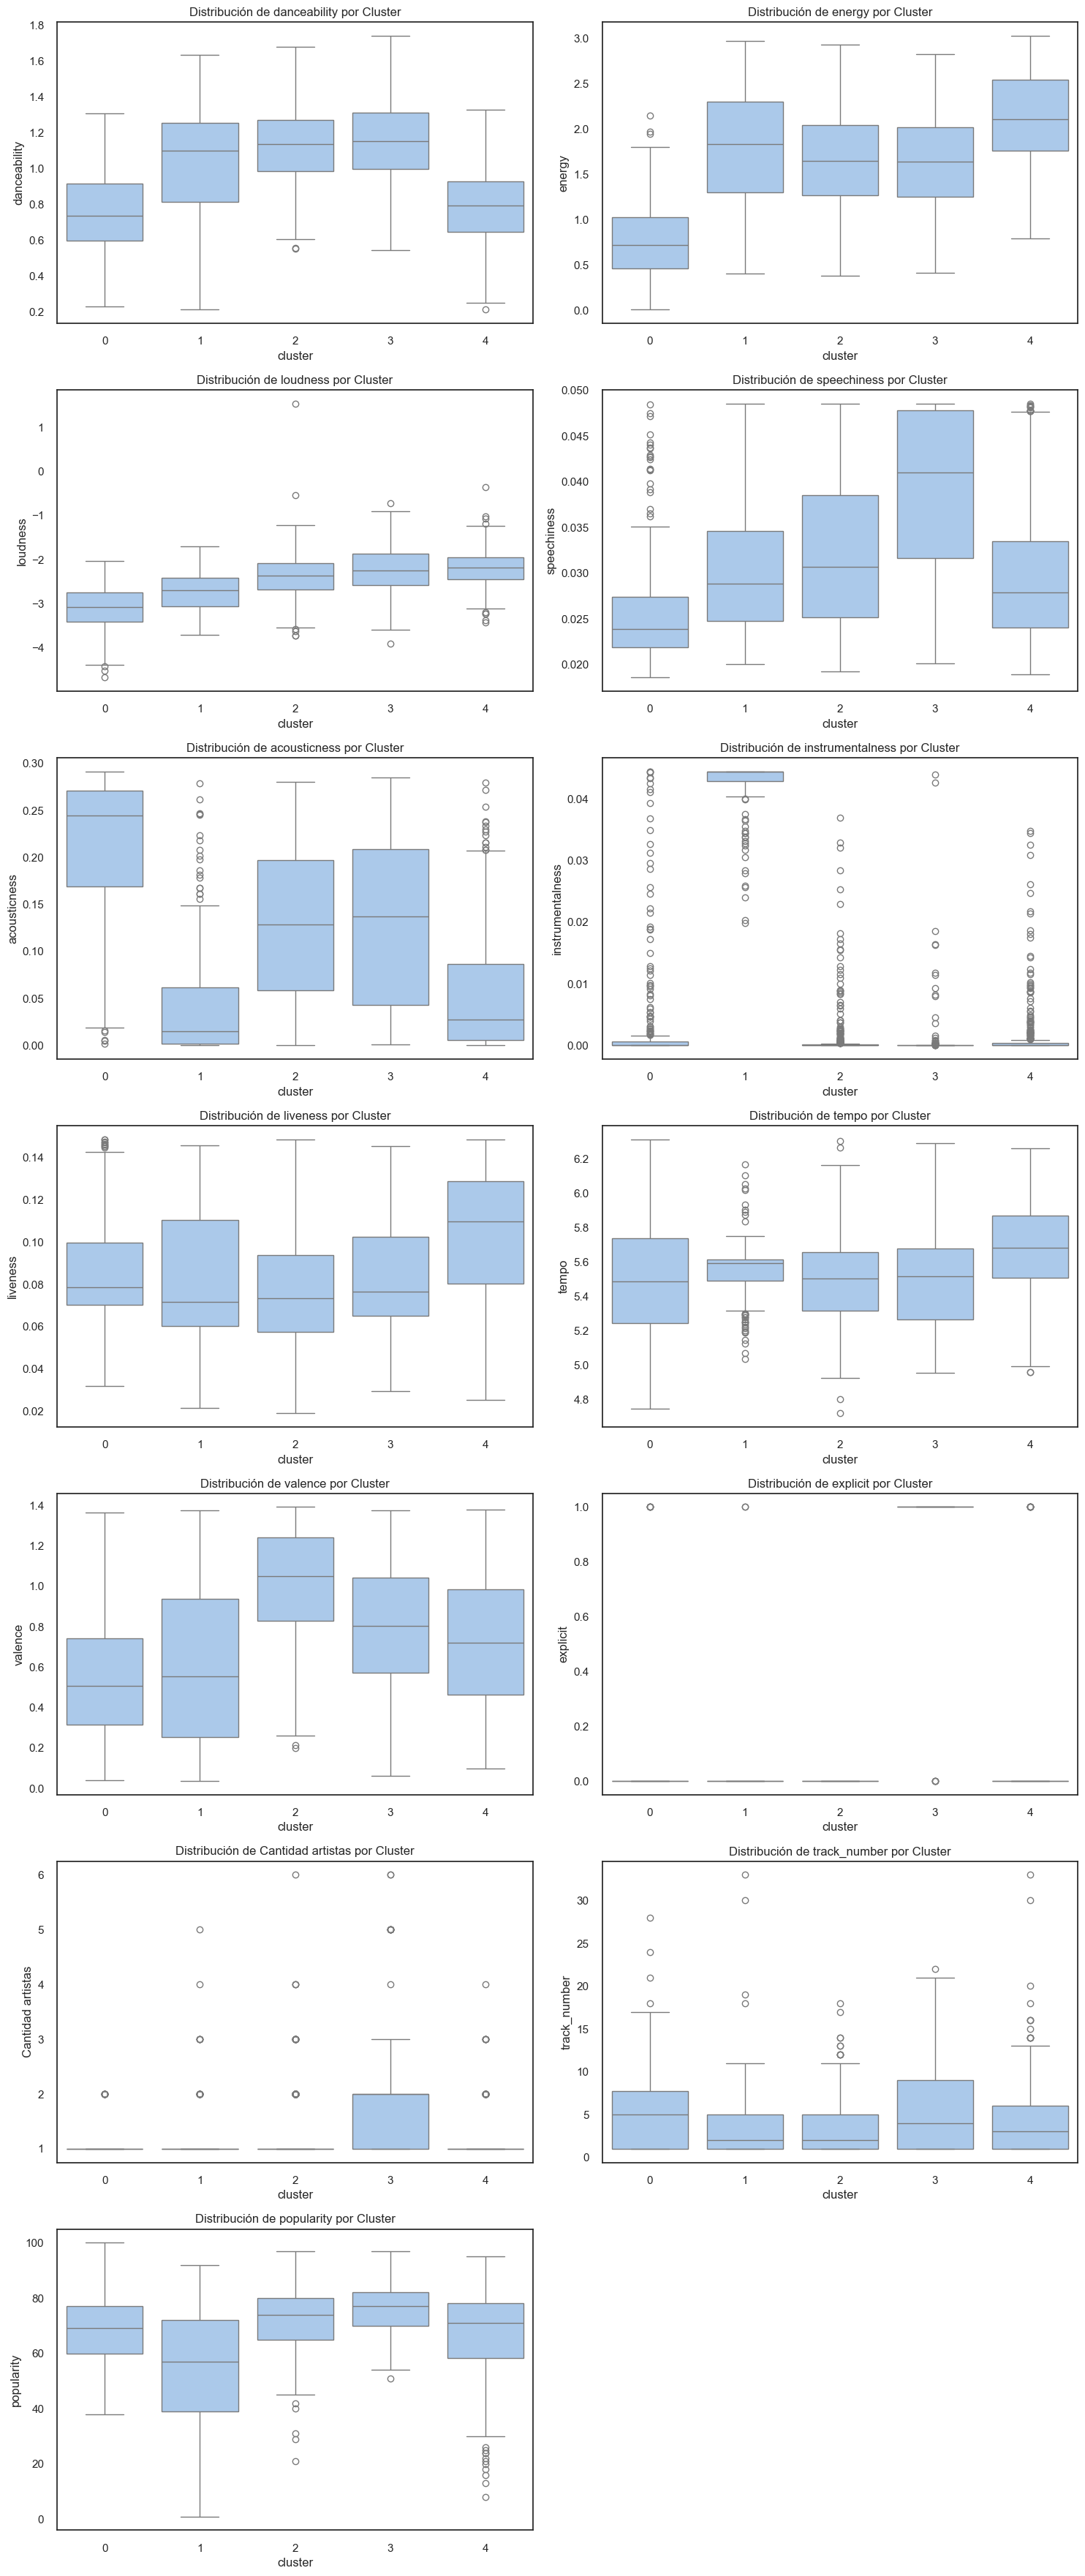

In [995]:
fig, axes = plt.subplots(12, 2, figsize=(15, 12 * 5))
axes = axes.flatten()
for i, column in enumerate(df_concat.columns[:-1]):
    sns.boxplot(x='cluster', y=column, data=df_concat, ax=axes[i])
    axes[i].set_title(f'Distribución de {column} por Cluster')

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

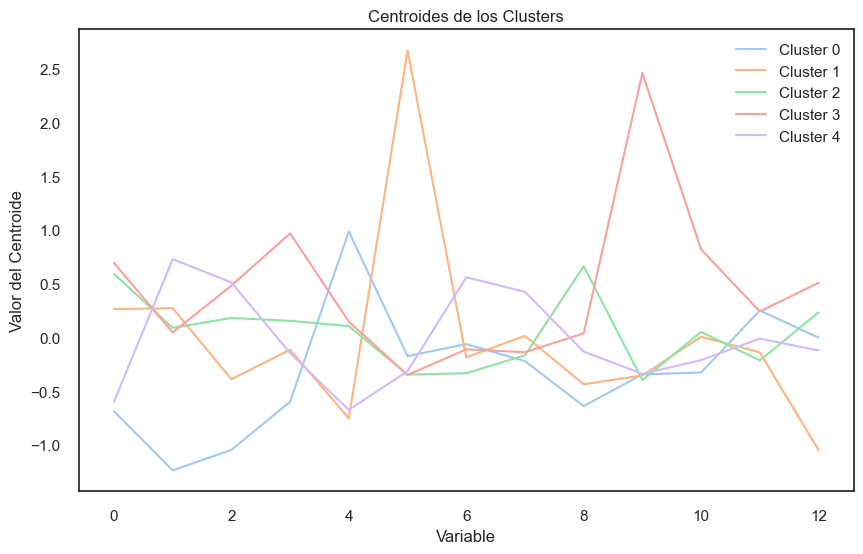

In [996]:
# Obtén los centroides
centroids = modelo.named_steps['model'].cluster_centers_
plt.figure(figsize=(10, 6))
for i, center in enumerate(centroids):
    plt.plot(center, label=f'Cluster {i}')
plt.xlabel('Variable')
plt.ylabel('Valor del Centroide')
plt.title('Centroides de los Clusters')
plt.legend()
plt.show()

El cluster 0 muestra valores bajos de danceability, energy, loudness y speechiness, y un pico en acousticness. También es un análisis que sigue con los resultados que obtuvimos previamente, las primeras 3 variables tienen mucha correlación entre sí, y son indirectamente proporcionales a que tan acústica es una pista.

Los valores del cluster 1 muestran ser los que contienen las canciones con mayor instrumentalidad, y a su vez los valores más bajos de popularidad. También los valores más bajos de acusticidad en comparación a los demás clusters. Esto nos podría llegar a decir que cuanto mayor instrumentalidad, menor popularidad y menos acústica será la canción.

Para el cluster 2 el centroide más significativo es la valencia de la canción. No hay otra variable que represente significativamente a la agrupación.

El cluster 3 muestra altos valores de canciones explícitas, teniendo casi la totalidad de estos datos. A su vez muestra los valores más altos de speechinesss. Esto puede resultar lógico ya que cuanto más discurso tiene una canción, más probabilidades habría de que tenga lenguaje explícito.

Por último, el cluster 4 tiene dos centroides con valores altos en las variable liveness y energy. Esto podría interpretarse como que la agrupación contiene las pistas más vivas y energéticas del conjunto de datos

In [997]:
# Vamos a ver que pasa en un análisis de punto biserial entre explicit y speechiness

coeficiente, p_valor = stats.pointbiserialr(datos['explicit'], datos["speechiness"])

# Imprimir el coeficiente de correlación de punto biserial y el p-valor
print("Coeficiente de correlación de punto biserial:", coeficiente)
print("P-valor:",i, p_valor)
if p_valor < 0.05:
    print('Hay correlación entre ambas variables')
    print('')
else:
    print("No hay correlación entre las variables")
    print('')

Coeficiente de correlación de punto biserial: 0.34400900584110905
P-valor: 4 3.091608086723261e-39
Hay correlación entre ambas variables



Podemos ver una moderada correlación entre ambas variables

## Random Forest

In [998]:
X = numericas_df
y = datos['popularity_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

La métrica que se buscará mejorar en el modelo de clasificación será la **precisión**, ya que se requiere que el algoritmo sea más cauteloso en cuanto a que canción considera popular. Con esto se dejarán fuera canciones que sí serían populares, pero predijimos como que no. Sin embargo, lo importante es que aquellas que digamos con seguridad cuales si lo serán.

In [999]:
clf = RandomForestClassifier(max_depth=6, n_estimators=50)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=6, n_estimators=50)

In [1000]:
# Definir el scorer con zero_division
precision_scorer = make_scorer(precision_score, average='macro', zero_division=1)

# Defino los parámetros a modificar
param_grid = {'max_depth':[2, 4, 6], 'n_estimators':[80, 100, 120]}

# Definir el KFold estratificado
S_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Crear el objeto GridSearchCV y optimizar por precisión personalizada
grid_search = GridSearchCV(clf, param_grid, cv=S_kfold, scoring=precision_scorer, return_train_score=True, verbose=3)

# Ajustar el GridSearch en los datos de entrenamiento
grid_search.fit(X_train, y_train)

# Obtener los mejores parámetros y el mejor estimador del GridSearch
best_params = grid_search.best_params_

print("Mejores hiperparámetros:", best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END max_depth=2, n_estimators=80;, score=(train=0.677, test=0.605) total time=   0.1s
[CV 2/5] END max_depth=2, n_estimators=80;, score=(train=0.690, test=0.563) total time=   0.0s
[CV 3/5] END max_depth=2, n_estimators=80;, score=(train=0.681, test=0.654) total time=   0.1s
[CV 4/5] END max_depth=2, n_estimators=80;, score=(train=0.658, test=0.638) total time=   0.1s
[CV 5/5] END max_depth=2, n_estimators=80;, score=(train=0.694, test=0.617) total time=   0.1s
[CV 1/5] END max_depth=2, n_estimators=100;, score=(train=0.689, test=0.590) total time=   0.1s
[CV 2/5] END max_depth=2, n_estimators=100;, score=(train=0.690, test=0.614) total time=   0.1s
[CV 3/5] END max_depth=2, n_estimators=100;, score=(train=0.679, test=0.694) total time=   0.1s
[CV 4/5] END max_depth=2, n_estimators=100;, score=(train=0.680, test=0.666) total time=   0.1s
[CV 5/5] END max_depth=2, n_estimators=100;, score=(train=0.677, test=0.575) tota

In [1001]:
clf = RandomForestClassifier(**best_params)

clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=4)

In [1002]:
y_pred_train = clf.predict(X_train)
y_pred_test = clf.predict(X_test)

In [1003]:
print('Train:')
print(classification_report(y_true=y_train,y_pred=y_pred_train))
print('-'*60)
print('Test:')
print(classification_report(y_true=y_test,y_pred=y_pred_test))

Train:
              precision    recall  f1-score   support

           0       0.65      0.94      0.77       634
           1       0.79      0.30      0.43       458

    accuracy                           0.67      1092
   macro avg       0.72      0.62      0.60      1092
weighted avg       0.71      0.67      0.63      1092

------------------------------------------------------------
Test:
              precision    recall  f1-score   support

           0       0.65      0.95      0.77       164
           1       0.74      0.23      0.35       110

    accuracy                           0.66       274
   macro avg       0.69      0.59      0.56       274
weighted avg       0.68      0.66      0.60       274



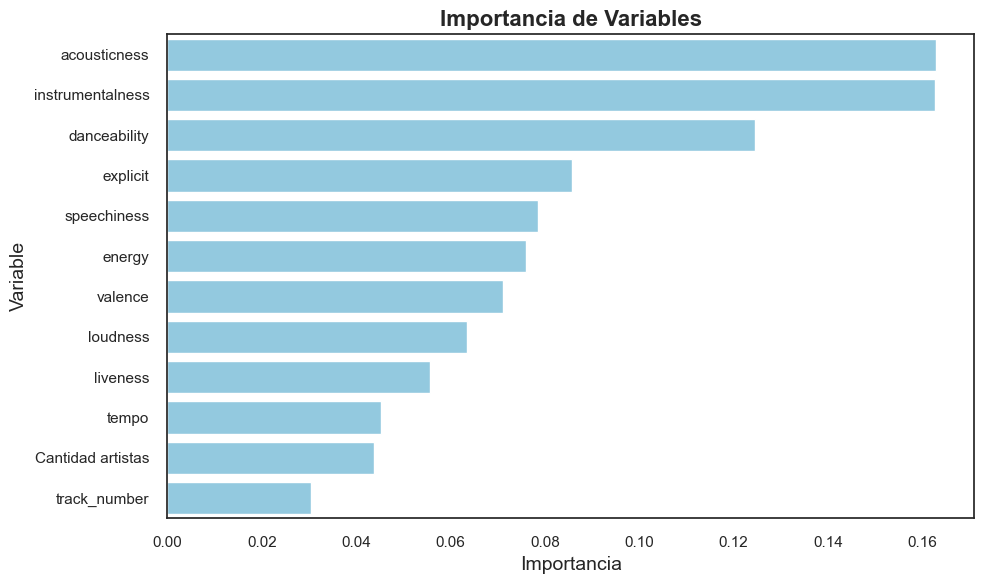

In [1004]:
# Vamos a ver la importancia de las variables
importances = clf.feature_importances_

# Obtener los nombres de las variables
feature_names = X_train.columns

# Crear un DataFrame con las importancias de las variables
importance_df = pd.DataFrame({'Variable': feature_names, 'Importance': importances})

# Ordenar el DataFrame por importancia descendente
importance_df = importance_df.sort_values('Importance', ascending=False)


plt.figure(figsize=(10, 6))

ax = sns.barplot(x='Importance', y='Variable', data=importance_df, color='skyblue')

plt.title('Importancia de Variables', fontsize=16, fontweight='bold')
plt.xlabel('Importancia', fontsize=14)
plt.ylabel('Variable', fontsize=14)

plt.tight_layout()
plt.show()

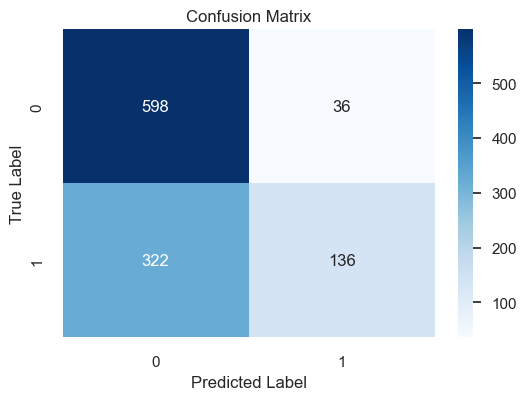

In [1005]:
# Creamos la matriz de confusión para entrenamiento del modelo clf
cm = confusion_matrix(y_train, y_pred_train)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

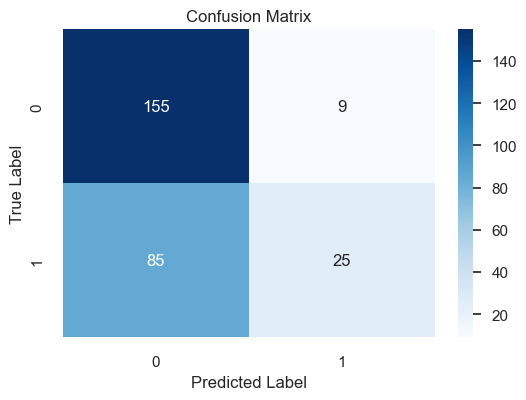

In [1006]:
# Creamos la matriz de confusión para testeo del modelo clf
cm = confusion_matrix(y_test, y_pred_test)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

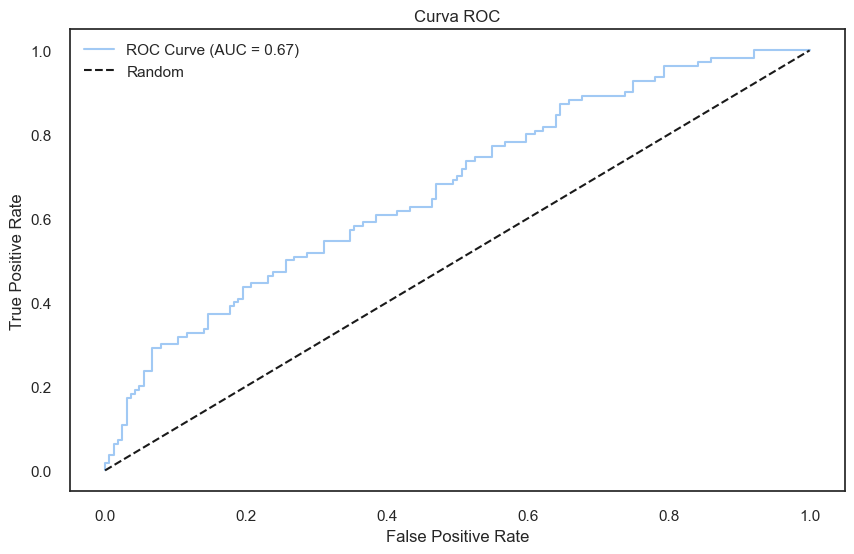

In [1007]:
y_proba = clf.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC
auc = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

## Árbol de decisión

In [1008]:
# Tomamos las variables numericas

numericas_df

danceability    energy  loudness  speechiness  acousticness  \
0         1.611654  1.473068 -2.530862     0.029656      0.223194   
1         0.606233  1.640955 -2.054100     0.027986      0.158554   
2         0.982214  1.854793 -1.583797     0.022916      0.071215   
3         0.831119  1.435599 -1.361235     0.041846      0.042325   
4         1.025777  1.604894 -2.066569     0.022865      0.124168   
...            ...       ...       ...          ...           ...   
1361      0.628573  0.695949 -2.966998     0.019703      0.105978   
1362      0.899431  2.659491 -2.110981     0.030024      0.029174   
1363      0.819624  2.425174 -1.519062     0.033922      0.029705   
1364      1.061624  0.790572 -2.687187     0.033460      0.032775   
1365      0.580811  0.434374 -3.125166     0.026555      0.288035   

      instrumentalness  liveness     tempo   valence  explicit  \
0             0.000590  0.053141  5.659783  1.054659     False   
1            -0.000000  0.092288  6.090761  0.850481     False   
2            -0.000000  0.054521  5.208957  0.946059     False   
3             0.000022  0.049999  5.109219  1.220823     False   
4            -0.000000  0.037791  5.195273  0.779244     False   
...                ...       ...       ...       ...       ...   
1361          0.017205  0.069286  4.824181  0.579039     False   
1362          0.001183  0.061364  6.063207  1.180720     False   
1363         -0.000000  0.088120  5.854744  0.218775      True   
1364          0.002513  0.054877  5.959695  1.270233     False   
1365          0.029548  0.078701  5.131680  0.270155     False   

      Cantidad artistas  track_number  
0                     1             1  
1                     2             1  
2                     2             1  
3                     3             5  
4                     2             1  
...                 ...           ...  
1361                  1            12  
1362                  1             1  
1363                  2             8  
1364                  1             6  
1365                  1             5  

[1366 rows x 12 columns]

In [1009]:
dtree = DecisionTreeClassifier()

In [1010]:
param_grid = {"max_depth":[3,4,5,6,7,8,9,10],
              "min_samples_split":[2,3,4,5,6,7,8],
              "min_samples_leaf":[1,2,3,4,5,6,7,8],
              "criterion":["gini","entropy"],
              "splitter":["best","random"],
              "max_features":["sqrt",None],
              "random_state":[0,42]}

In [1011]:
X = numericas_df
y = datos['popularity_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1012]:
grid_search = GridSearchCV(dtree, param_grid, cv=5, n_jobs=-1)

grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
                         'max_features': ['sqrt', None],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8],
                         'min_samples_split': [2, 3, 4, 5, 6, 7, 8],
                         'random_state': [0, 42],
                         'splitter': ['best', 'random']})

In [1013]:
best_parameters = grid_search.best_params_

print("Best Parameters for DecisionTree Model is:\n")
best_parameters

Best Parameters for DecisionTree Model is:



{'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'min_samples_leaf': 5,
 'min_samples_split': 2,
 'random_state': 0,
 'splitter': 'random'}

In [1014]:
dtree = DecisionTreeClassifier(**best_parameters)

dtree.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, random_state=0,
                       splitter='random')

In [1015]:
y_train_pred = dtree.predict(X_train)
y_test_pred = dtree.predict(X_test)

In [1016]:
print(classification_report(y_true=y_train,y_pred=y_train_pred))

              precision    recall  f1-score   support

           0       0.62      0.95      0.75       634
           1       0.75      0.20      0.32       458

    accuracy                           0.64      1092
   macro avg       0.69      0.58      0.53      1092
weighted avg       0.68      0.64      0.57      1092



In [1017]:
print(classification_report(y_true=y_test,y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.61      0.93      0.74       164
           1       0.52      0.12      0.19       110

    accuracy                           0.60       274
   macro avg       0.57      0.52      0.46       274
weighted avg       0.57      0.60      0.52       274



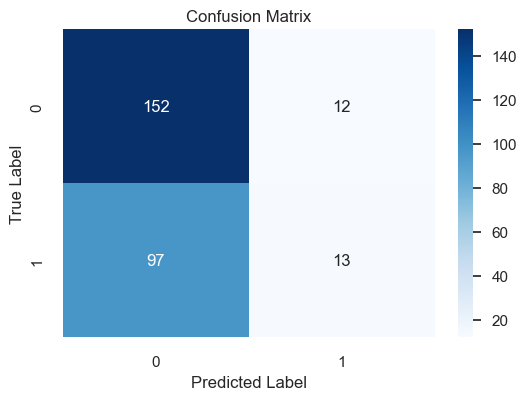

In [1018]:
# Creamos la matriz de confusión para el modelo dtree
cm = confusion_matrix(y_test, y_test_pred)

# usando heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

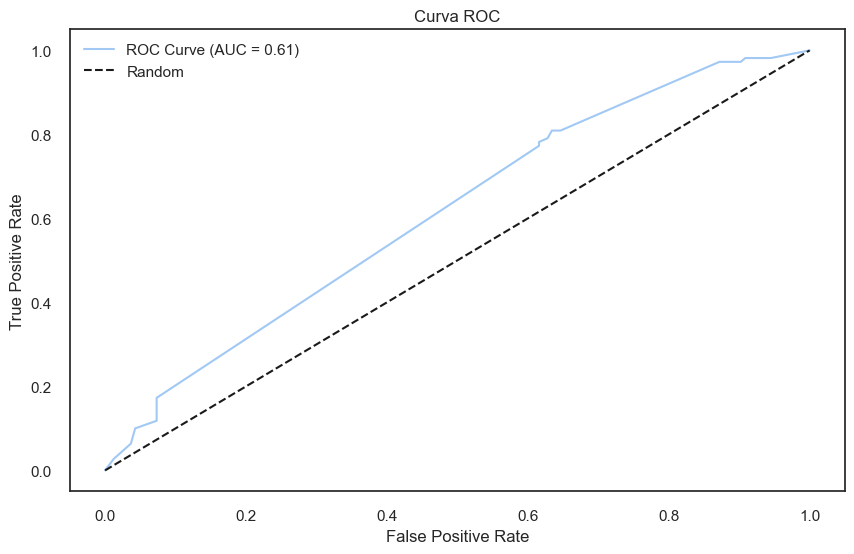

In [1019]:
y_proba = dtree.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC
auc = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

## Regresión Logística

In [1020]:
# Tomamos las variables numericas

numericas_df

danceability    energy  loudness  speechiness  acousticness  \
0         1.611654  1.473068 -2.530862     0.029656      0.223194   
1         0.606233  1.640955 -2.054100     0.027986      0.158554   
2         0.982214  1.854793 -1.583797     0.022916      0.071215   
3         0.831119  1.435599 -1.361235     0.041846      0.042325   
4         1.025777  1.604894 -2.066569     0.022865      0.124168   
...            ...       ...       ...          ...           ...   
1361      0.628573  0.695949 -2.966998     0.019703      0.105978   
1362      0.899431  2.659491 -2.110981     0.030024      0.029174   
1363      0.819624  2.425174 -1.519062     0.033922      0.029705   
1364      1.061624  0.790572 -2.687187     0.033460      0.032775   
1365      0.580811  0.434374 -3.125166     0.026555      0.288035   

      instrumentalness  liveness     tempo   valence  explicit  \
0             0.000590  0.053141  5.659783  1.054659     False   
1            -0.000000  0.092288  6.090761  0.850481     False   
2            -0.000000  0.054521  5.208957  0.946059     False   
3             0.000022  0.049999  5.109219  1.220823     False   
4            -0.000000  0.037791  5.195273  0.779244     False   
...                ...       ...       ...       ...       ...   
1361          0.017205  0.069286  4.824181  0.579039     False   
1362          0.001183  0.061364  6.063207  1.180720     False   
1363         -0.000000  0.088120  5.854744  0.218775      True   
1364          0.002513  0.054877  5.959695  1.270233     False   
1365          0.029548  0.078701  5.131680  0.270155     False   

      Cantidad artistas  track_number  
0                     1             1  
1                     2             1  
2                     2             1  
3                     3             5  
4                     2             1  
...                 ...           ...  
1361                  1            12  
1362                  1             1  
1363                  2             8  
1364                  1             6  
1365                  1             5  

[1366 rows x 12 columns]

In [1021]:
X = numericas_df
y = datos['popularity_numeric']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1022]:
log_reg = LogisticRegression(max_iter=1000)

In [1023]:
# Definir el grid de hiperparámetros
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['liblinear', 'saga'],
    'max_iter': [100, 200, 500],
    'class_weight': ['balanced', None]
}

# Usar GridSearchCV para encontrar la mejor combinación de parámetros
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000),
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'class_weight': ['balanced', None],
                         'max_iter': [100, 200, 500],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [1024]:
best_parameters = grid_search.best_params_
print("Mejores parámetros:", best_parameters)

Mejores parámetros: {'C': 10, 'class_weight': None, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}


In [1025]:
log_reg = LogisticRegression(**best_parameters)

log_reg.fit(X_train,y_train)

LogisticRegression(C=10, penalty='l1', solver='liblinear')

In [1026]:
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

In [1027]:
print(classification_report(y_true=y_train,y_pred=y_train_pred))
print('-'*55)
print('')
print(classification_report(y_true=y_test,y_pred=y_test_pred))

              precision    recall  f1-score   support

           0       0.63      0.86      0.73       634
           1       0.61      0.31      0.41       458

    accuracy                           0.63      1092
   macro avg       0.62      0.58      0.57      1092
weighted avg       0.62      0.63      0.59      1092

-------------------------------------------------------

              precision    recall  f1-score   support

           0       0.65      0.92      0.76       164
           1       0.68      0.25      0.37       110

    accuracy                           0.65       274
   macro avg       0.67      0.59      0.57       274
weighted avg       0.66      0.65      0.60       274



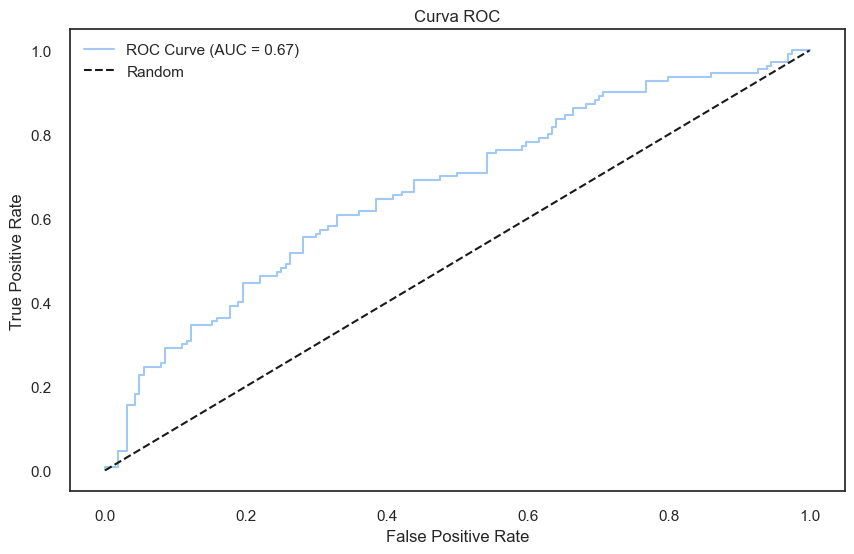

In [1028]:
y_proba = log_reg.predict_proba(X_test)[:, 1]

# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Calcular el AUC
auc = roc_auc_score(y_test, y_proba)

# Graficar la curva ROC
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC')
plt.legend(loc='best')
plt.show()

#### Para todos los casos se hicieron distintas prueba con métodos de balenceo de clases como SMOTE. También se utilizó PCA para reducción de dimensionalidad. Sin embargo, con ninguno de estos métodos se vió una mejora singificativa en el modelo

#### El modelo de clasificación que mejor predijo fue el Random Forest 'clf' con mejores variables de presición y accuracy

## Pruebas modelo de clasificación

Vamos a probar el modelo Random Forest que tiene una precisión del 0.72 para predecir si las canciones del nuevo álbum de Charly García serán populares o no

In [1029]:
album_nuevo_charly

explicit  disc_number  track_number  duration_ms                      id  \
4      False            1             1       104566  3BSA7eRvD25S4oX4rdngpU   
7      False            1             2       123288  79thbxA6OpIUMVu8mROice   
8      False            1             3       213358  7tgHjgeAYcXQCKEyGpcRj7   
11     False            1             4       225783  3yN6KXgZZfe6SVjRytj5Z2   
15     False            1             5       144042  1WNvt80Eh9glkspXEEhl6W   
17     False            1             6       141976  23syx1ODrqa0BkQzaaHd3r   
19     False            1             7       231708  51Mo6woPjQEPOON5eWc220   
23     False            1             8       248165  6srEY1lFkB0S3mkNbL5BDT   
25     False            1            10       163940  2TBoLwjf3gSWuVa2Bh8Ayv   
30     False            1            12       100637  54e9B1fVeKg8qBLi4ysSXA   
31     False            1            13       140915  4hMpKCpWbYroQ8VKlABGk4   
32     False            1             9       115269  7Je1Wx6gRPt4dhnbgaEAOu   
34     False            1            11       120374  6HUZ1Tfrs0hgx9JliZgVFQ   

                         name  popularity album.album_type  \
4                     Rompela           0            album   
7                    Yo Ya Sé           0            album   
8           El Club de los 27           0            album   
11           La Medicina Nº 9           0            album   
15       Te Recuerdo Invierno           0            album   
17              Autofemicidio           0            album   
19                    América           0            album   
23             Juan Represión           0            album   
25  La Pelicana y el Androide           0            album   
30    La Lógica del Escorpión           0            album   
31         Rock and Roll Star           0            album   
32          Estrellas al Caer           0            album   
34        Watching the Wheels           0            album   

                  album.id               album.name  ... key  loudness  mode  \
4   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   9    -5.167     1   
7   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   7    -7.369     1   
8   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   9    -7.538     1   
11  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0    -7.553     1   
15  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0   -10.313     1   
17  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   2    -7.842     1   
19  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   2    -8.175     1   
23  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0    -9.843     1   
25  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   3    -7.505     0   
30  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   5   -11.869     1   
31  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   9    -8.889     1   
32  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   2    -6.216     1   
34  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ...   0    -8.377     1   

   speechiness  acousticness  instrumentalness  liveness  valence    tempo  \
4       0.0316       0.15400          0.000000    0.3460    0.953  111.465   
7       0.0328       0.05490          0.000000    0.4830    0.661  129.953   
8       0.0373       0.02630          0.008610    0.2670    0.917  109.980   
11      0.0295       0.04330          0.000003    0.3700    0.793  110.016   
15      0.0296       0.24400          0.026400    0.0704    0.448  179.946   
17      0.0344       0.19400          0.000007    0.4370    0.678  168.004   
19      0.0286       0.00590          0.000000    0.0682    0.344  122.049   
23      0.0281       0.20900          0.003280    0.6670    0.299  104.977   
25      0.0352       0.19600          0.000000    0.1190    0.257   82.172   
30      0.1670       0.11400          0.000005    0.3410    0.339   84.165   
31      0.0333       0.00119       

In [1030]:
# Primero veamos si hay algun valor de duración mayor a 700.000 milisegundo, ya que al haberlos borrado del df al crear el modelo, no sería muy precisa su predicción

album_nuevo_charly[album_nuevo_charly['duration_ms'] > 700000]

Empty DataFrame
Columns: [explicit, disc_number, track_number, duration_ms, id, name, popularity, album.album_type, album.id, album.name, album.release_date, album.total_tracks, Cantidad artistas, artist_name, days_since_release, danceability, energy, key, loudness, mode, speechiness, acousticness, instrumentalness, liveness, valence, tempo, time_signature]
Index: []

[0 rows x 27 columns]

In [1031]:
# Aplicamos la transformación Yeo Johnson

for col in variables:
    transformed_col,_ = stats.yeojohnson(album_nuevo_charly[col])
    album_nuevo_charly[col] = transformed_col

album_nuevo_charly.head()

/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/4271518677.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_nuevo_charly[col] = transformed_col


explicit  disc_number  track_number  duration_ms                      id  \
4      False            1             1       104566  3BSA7eRvD25S4oX4rdngpU   
7      False            1             2       123288  79thbxA6OpIUMVu8mROice   
8      False            1             3       213358  7tgHjgeAYcXQCKEyGpcRj7   
11     False            1             4       225783  3yN6KXgZZfe6SVjRytj5Z2   
15     False            1             5       144042  1WNvt80Eh9glkspXEEhl6W   

                    name  popularity album.album_type                album.id  \
4                Rompela           0            album  0k2JGzYRZQC3s3ZNTcyHoA   
7               Yo Ya Sé           0            album  0k2JGzYRZQC3s3ZNTcyHoA   
8      El Club de los 27           0            album  0k2JGzYRZQC3s3ZNTcyHoA   
11      La Medicina Nº 9           0            album  0k2JGzYRZQC3s3ZNTcyHoA   
15  Te Recuerdo Invierno           0            album  0k2JGzYRZQC3s3ZNTcyHoA   

                 album.name  ... key  loudness  mode speechiness  \
4   La Lógica del Escorpión  ...   9 -2.178627     1    0.015322   
7   La Lógica del Escorpión  ...   7 -2.625053     1    0.015542   
8   La Lógica del Escorpión  ...   9 -2.655211     1    0.016255   
11  La Lógica del Escorpión  ...   0 -2.657864     1    0.014902   
15  La Lógica del Escorpión  ...   0 -3.092286     1    0.014923   

    acousticness  instrumentalness  liveness   valence     tempo  \
4       0.133110         -0.000000  0.276284  0.574809  5.206328   
7       0.051993         -0.000000  0.357956  0.451757  5.391301   
8       0.025614          0.004168  0.223294  0.561141  5.190228   
11      0.041471          0.000003  0.291469  0.511022  5.190621   
15      0.195392          0.005103  0.066898  0.339940  5.788118   

    time_signature  
4                4  
7                4  
8                3  
11               4  
15               4  

[5 rows x 27 columns]

In [1032]:
# Tomamos las variables numéricas

numericas_charly = album_nuevo_charly[numericas]
numericas_charly

danceability    energy  loudness  speechiness  acousticness  \
4       2.704889  0.830337 -2.178627     0.015322      0.133110   
7       1.868868  0.713656 -2.625053     0.015542      0.051993   
8       2.755372  0.570659 -2.655211     0.016255      0.025614   
11      2.688215  0.609836 -2.657864     0.014902      0.041471   
15      1.329677  0.295062 -3.092286     0.014923      0.195392   
17      1.529921  0.490765 -2.708266     0.015814      0.161971   
19      2.115783  0.432357 -2.764719     0.014708      0.005865   
23      2.026496  0.328234 -3.024859     0.014596      0.172293   
25      1.055719  0.678598 -2.649360     0.015942      0.163363   
30      0.727721  0.397827 -3.300475     0.019029      0.102137   
31      1.805873  0.573399 -2.880395     0.015629      0.001189   
32      2.557548  0.845363 -2.405034     0.017206      0.118675   
34      1.339732  0.681301 -2.798162     0.018020      0.009183   

    instrumentalness  liveness     tempo   valence  explicit  \
4          -0.000000  0.276284  5.206328  0.574809     False   
7          -0.000000  0.357956  5.391301  0.451757     False   
8           0.004168  0.223294  5.190228  0.561141     False   
11          0.000003  0.291469  5.190621  0.511022     False   
15          0.005103  0.066898  5.788118  0.339940     False   
17          0.000007  0.331836  5.703897  0.459771     False   
19         -0.000000  0.064907  5.315500  0.276140     False   
23          0.002421  0.451418  5.134422  0.246241     False   
25         -0.000000  0.109359  4.842983  0.216931     False   
30          0.000005  0.273069  4.871337  0.272891     False   
31          0.000050  0.171270  5.482250  0.411850     False   
32          0.004695  0.089789  5.353171  0.505473     False   
34          0.001482  0.413779  5.661423  0.285144     False   

    Cantidad artistas  track_number  
4                   1             1  
7                   1             2  
8                   2             3  
11                  2             4  
15                  1             5  
17                  1             6  
19                  2             7  
23                  1             8  
25                  2            10  
30                  1            12  
31                  2            13  
32                  1             9  
34                  1            11

In [1033]:
# Aplicamos el modelo de clasificación Random Forest

pred_charly = clf.predict(numericas_charly)
pred_charly

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

In [1034]:
album_nuevo_charly['popularity_category'] = pred_charly
album_nuevo_charly


/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/695716257.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_nuevo_charly['popularity_category'] = pred_charly


explicit  disc_number  track_number  duration_ms                      id  \
4      False            1             1       104566  3BSA7eRvD25S4oX4rdngpU   
7      False            1             2       123288  79thbxA6OpIUMVu8mROice   
8      False            1             3       213358  7tgHjgeAYcXQCKEyGpcRj7   
11     False            1             4       225783  3yN6KXgZZfe6SVjRytj5Z2   
15     False            1             5       144042  1WNvt80Eh9glkspXEEhl6W   
17     False            1             6       141976  23syx1ODrqa0BkQzaaHd3r   
19     False            1             7       231708  51Mo6woPjQEPOON5eWc220   
23     False            1             8       248165  6srEY1lFkB0S3mkNbL5BDT   
25     False            1            10       163940  2TBoLwjf3gSWuVa2Bh8Ayv   
30     False            1            12       100637  54e9B1fVeKg8qBLi4ysSXA   
31     False            1            13       140915  4hMpKCpWbYroQ8VKlABGk4   
32     False            1             9       115269  7Je1Wx6gRPt4dhnbgaEAOu   
34     False            1            11       120374  6HUZ1Tfrs0hgx9JliZgVFQ   

                         name  popularity album.album_type  \
4                     Rompela           0            album   
7                    Yo Ya Sé           0            album   
8           El Club de los 27           0            album   
11           La Medicina Nº 9           0            album   
15       Te Recuerdo Invierno           0            album   
17              Autofemicidio           0            album   
19                    América           0            album   
23             Juan Represión           0            album   
25  La Pelicana y el Androide           0            album   
30    La Lógica del Escorpión           0            album   
31         Rock and Roll Star           0            album   
32          Estrellas al Caer           0            album   
34        Watching the Wheels           0            album   

                  album.id               album.name  ...  loudness  mode  \
4   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.178627     1   
7   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.625053     1   
8   0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.655211     1   
11  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.657864     1   
15  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -3.092286     1   
17  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.708266     1   
19  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.764719     1   
23  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -3.024859     1   
25  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.649360     0   
30  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -3.300475     1   
31  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.880395     1   
32  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.405034     1   
34  0k2JGzYRZQC3s3ZNTcyHoA  La Lógica del Escorpión  ... -2.798162     1   

    speechiness acousticness  instrumentalness  liveness   valence     tempo  \
4      0.015322     0.133110         -0.000000  0.276284  0.574809  5.206328   
7      0.015542     0.051993         -0.000000  0.357956  0.451757  5.391301   
8      0.016255     0.025614          0.004168  0.223294  0.561141  5.190228   
11     0.014902     0.041471          0.000003  0.291469  0.511022  5.190621   
15     0.014923     0.195392          0.005103  0.066898  0.339940  5.788118   
17     0.015814     0.161971          0.000007  0.331836  0.459771  5.703897   
19     0.014708     0.005865         -0.000000  0.064907  0.276140  5.315500   
23     0.014596     0.172293          0.002421  0.451418  0.246241  5.134422   
25     0.015942     0.163363         -0.000000  0.109359  0.216931  4.842983   
30     0.019029     0.102137          0.000005  0.273069  0.272891  4.871337   
31     0.015629     0.001189          0.000050  0.171270  0.411850  5

In [1035]:
album_nuevo_charly['popularidad'] = np.where(album_nuevo_charly['popularity_category'] == 1, 'Popular', 'No Popular')

/var/folders/lb/1npgqr492m9911vjql7g8qph0000gn/T/ipykernel_13909/3971050811.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  album_nuevo_charly['popularidad'] = np.where(album_nuevo_charly['popularity_category'] == 1, 'Popular', 'No Popular')


In [1036]:
album_nuevo_charly[['name', 'popularidad']]

name popularidad
4                     Rompela     Popular
7                    Yo Ya Sé     Popular
8           El Club de los 27  No Popular
11           La Medicina Nº 9     Popular
15       Te Recuerdo Invierno  No Popular
17              Autofemicidio  No Popular
19                    América  No Popular
23             Juan Represión  No Popular
25  La Pelicana y el Androide  No Popular
30    La Lógica del Escorpión  No Popular
31         Rock and Roll Star  No Popular
32          Estrellas al Caer     Popular
34        Watching the Wheels  No Popular

#### Veamos las reproducciones del álbum al 20/09/2024:

<img src="Charly.png" alt="Descripción de la imagen" width="300"/>

Podemos ver que las canciones que predijimos como populares tienen la mayor cantidad de reproducciones dentro del álbum, a excepción de "Estrellas al Caer".

De todas formas las reproducciones son parte del cálculo de la popularidad, sirviendo para analizar cierta tendencia, sin embargo no significa que luego estas canciones vayan a tener puntaje de popularidad alto o no

## Regresión lineal

Para la regresión se intentó predecir el valor de popularity con varios modelos, aplicando PCA y demás técnicas, pero no se consiguieron valores de R^2 mayores a 0,2.

El mejor resultado se consiguió agregando la variable duración a los datos numericos previamente utilizado. Se hicieron pruevas también utilizando únicamente las variables de mayor correlación, pero no mejoró el modelo

In [1037]:
variables2 = np.append(numericas, 'duration_ms')
variables2

array(['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'valence',
       'explicit', 'Cantidad artistas', 'track_number', 'duration_ms'],
      dtype='<U17')

In [1038]:
variables_df = datos[variables2]
variables_df

danceability    energy  loudness  speechiness  acousticness  \
0         1.611654  1.473068 -2.530862     0.029656      0.223194   
1         0.606233  1.640955 -2.054100     0.027986      0.158554   
2         0.982214  1.854793 -1.583797     0.022916      0.071215   
3         0.831119  1.435599 -1.361235     0.041846      0.042325   
4         1.025777  1.604894 -2.066569     0.022865      0.124168   
...            ...       ...       ...          ...           ...   
1361      0.628573  0.695949 -2.966998     0.019703      0.105978   
1362      0.899431  2.659491 -2.110981     0.030024      0.029174   
1363      0.819624  2.425174 -1.519062     0.033922      0.029705   
1364      1.061624  0.790572 -2.687187     0.033460      0.032775   
1365      0.580811  0.434374 -3.125166     0.026555      0.288035   

      instrumentalness  liveness     tempo   valence  explicit  \
0             0.000590  0.053141  5.659783  1.054659     False   
1            -0.000000  0.092288  6.090761  0.850481     False   
2            -0.000000  0.054521  5.208957  0.946059     False   
3             0.000022  0.049999  5.109219  1.220823     False   
4            -0.000000  0.037791  5.195273  0.779244     False   
...                ...       ...       ...       ...       ...   
1361          0.017205  0.069286  4.824181  0.579039     False   
1362          0.001183  0.061364  6.063207  1.180720     False   
1363         -0.000000  0.088120  5.854744  0.218775      True   
1364          0.002513  0.054877  5.959695  1.270233     False   
1365          0.029548  0.078701  5.131680  0.270155     False   

      Cantidad artistas  track_number  duration_ms  
0                     1             1       195824  
1                     2             1       198495  
2                     2             1       144148  
3                     3             5       165054  
4                     2             1       193933  
...                 ...           ...          ...  
1361                  1            12       183956  
1362                  1             1       200400  
1363                  2             8       191700  
1364                  1             6       159245  
1365                  1             5       200476  

[1366 rows x 13 columns]

In [1039]:
X = variables_df
y = datos['popularity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [1040]:
#puede llegar a  tardar demasiado realizar un CV con polinomios mayores a 5.
modelo = Pipeline([('scaler', StandardScaler()),('features', PolynomialFeatures()),
                    ('regression', LinearRegression(fit_intercept=True))])

hiperparametros={'features__degree':[1,2,3,4]}
grilla=GridSearchCV(modelo,hiperparametros, cv=5,scoring='neg_root_mean_squared_error')
grilla.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('features', PolynomialFeatures()),
                                       ('regression', LinearRegression())]),
             param_grid={'features__degree': [1, 2, 3, 4]},
             scoring='neg_root_mean_squared_error')

In [1041]:
#Veamos cuál es el polinomio que mejor se ajusta a nuestro modelo

print(grilla.best_params_)

{'features__degree': 2}


1 13.879650949190813
2 13.44895116243551
3 201.64661625547924
4 10758334172.985428


Text(0, 0.5, 'RMSE en validacion')

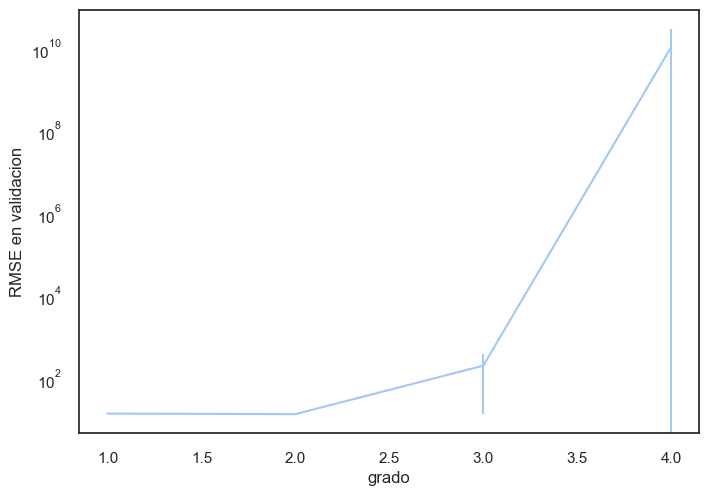

In [1042]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')

Podemos ver como para el modelo de grado 2, la raíz del error cuadrático medio es menor. De todas formas obtenemos un error bastante grande comparado con la escala de la variable popularidad

In [1043]:
# Entrenamos con el mejor modelo obtenido

modelo_lineal=grilla.best_estimator_
modelo_lineal.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('features', PolynomialFeatures()),
                ('regression', LinearRegression())])

In [1044]:
# Realizamos las predicciones

y_pred_test = modelo_lineal.predict(X_test)
y_pred_train = modelo_lineal.predict(X_train)
y_pred_test

array([68.76141357, 66.39379883, 69.71099854, 68.73547363, 64.99401855,
       67.46350098, 66.1628418 , 77.61639404, 72.82202148, 60.66326904,
       72.38330078, 67.89587402, 69.55786133, 72.26281738, 58.48150635,
       64.49847412, 85.10931396, 57.47900391, 81.89025879, 61.6920166 ,
       66.78399658, 70.10888672, 63.11395264, 71.97601318, 63.77996826,
       67.25067139, 56.34954834, 61.55938721, 71.12451172, 73.41827393,
       69.89691162, 66.203125  , 75.62591553, 61.35040283, 73.17803955,
       77.62335205, 70.91522217, 72.55041504, 70.52716064, 70.22692871,
       65.69787598, 73.6194458 , 80.16485596, 71.28289795, 66.3114624 ,
       73.48516846, 65.71258545, 72.08972168, 77.44055176, 72.06762695,
       76.70574951, 68.95245361, 56.92993164, 75.31011963, 62.22991943,
       65.54455566, 62.14599609, 69.04669189, 57.86126709, 70.58599854,
       68.77227783, 69.66430664, 67.93988037, 72.22399902, 64.68225098,
       51.61791992, 69.4453125 , 26.40765381, 77.57574463, 74.38

In [1045]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

score_train_modelo_lineal = mean_squared_error(y_train,y_pred_train,squared=False)
score_test_modelo_lineal = mean_squared_error(y_test,y_pred_test,squared=False)

print ("Train:", score_train_modelo_lineal)
print ("Testeo:", score_test_modelo_lineal)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 12.123079404902967
Testeo: 12.78682732242926


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1046]:
coeficientes = modelo_lineal.named_steps['regression'].coef_
coeficientes

array([ 1.08223417e+08,  4.21837125e-01,  2.33981060e-01, -1.04271439e-01,
       -3.96660533e-01,  1.57814598e+00,  8.23067662e-01, -3.90741241e-01,
        5.59860186e-02,  4.59990022e-01, -7.65785862e+11,  7.52619296e-01,
       -5.52069623e-01, -2.14124796e-05,  5.52747352e-01, -1.04326632e+00,
        1.44815165e+00, -1.10239749e-01,  5.70274681e-01, -8.69788143e-01,
        5.92967433e-01,  1.29262427e-01,  9.10281264e-01,  2.55055975e-01,
       -1.32555817e+00, -4.60378240e-01, -9.73629765e-01, -4.71008240e-01,
        2.14024952e-01, -1.47039444e+00,  1.25274485e+00, -8.58172930e-01,
       -9.43899448e-01, -6.30767822e-01,  1.33491516e+00,  3.91433716e-01,
       -4.72061157e-01, -8.60508919e-01,  5.18493652e-02, -5.06286621e-02,
        1.61774445e+00, -5.26489258e-01,  4.22531128e-01,  1.77933598e+00,
        3.36303711e-01, -2.02563477e+00, -1.10450745e+00,  1.13891602e-01,
        6.86080933e-01, -9.50561523e-01, -2.08740234e-01, -1.23834229e+00,
       -2.41386414e-01,  

In [1047]:
# Veamos el r^2
print('El r^2 es:',r2_score(y_test,y_pred_test))

El r^2 es: 0.15641385450401513


El valor de r^2 para este caso es demasiado bajo

## Vamos a probar otros modelos con regresión y comparar sus RMSE

## Support Vector Machine (SVM)

In [1048]:
pipeline= Pipeline([('scaler', StandardScaler()),
                  ('modelo', SVR())])

hiperparametros=[{'modelo__C':[1,10],'modelo__kernel':['linear']},{'modelo__gamma':[0.01,0.1], 'modelo__C':[1,10],'modelo__kernel':['rbf']}]
grilla=GridSearchCV(pipeline,hiperparametros,refit=True, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(X_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 2/5] END modelo__C=1, modelo__kernel=linear;, score=-13.885 total time=   0.0s
[CV 1/5] END modelo__C=1, modelo__kernel=linear;, score=-14.195 total time=   0.0s
[CV 4/5] END modelo__C=1, modelo__kernel=linear;, score=-14.140 total time=   0.0s
[CV 3/5] END modelo__C=1, modelo__kernel=linear;, score=-13.832 total time=   0.0s
[CV 5/5] END modelo__C=1, modelo__kernel=linear;, score=-15.274 total time=   0.0s
[CV 1/5] END modelo__C=10, modelo__kernel=linear;, score=-14.194 total time=   0.0s
[CV 2/5] END modelo__C=1, modelo__gamma=0.01, modelo__kernel=rbf;, score=-14.000 total time=   0.0s
[CV 2/5] END modelo__C=10, modelo__kernel=linear;, score=-13.878 total time=   0.1s
[CV 3/5] END modelo__C=10, modelo__kernel=linear;, score=-13.835 total time=   0.1s
[CV 4/5] END modelo__C=10, modelo__kernel=linear;, score=-14.169 total time=   0.0s
[CV 3/5] END modelo__C=1, modelo__gamma=0.01, modelo__kernel=rbf;, score=-14.614 total ti

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('modelo', SVR())]),
             n_jobs=-1,
             param_grid=[{'modelo__C': [1, 10], 'modelo__kernel': ['linear']},
                         {'modelo__C': [1, 10], 'modelo__gamma': [0.01, 0.1],
                          'modelo__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [1049]:
# Entrenamos el modelo con los hiperparametros obtenidos

modelo_SVR=grilla.best_estimator_
modelo_SVR.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('modelo', SVR(C=10, gamma=0.1))])

In [1050]:
# Realizamos las predicciones

y_pred_test = modelo_SVR.predict(X_test)
y_pred_train = modelo_SVR.predict(X_train)
y_pred_test

array([74.01492106, 69.7464452 , 72.31035201, 71.42022081, 66.43734105,
       62.47373735, 67.07024796, 72.23449215, 71.25686031, 58.66707351,
       72.18556509, 73.52470718, 62.48357003, 79.11693232, 55.63372044,
       70.17873365, 83.00397724, 62.03282998, 80.54848673, 54.88357701,
       63.08264129, 68.11858686, 66.74723895, 69.59341419, 65.20678352,
       68.82479453, 56.13169662, 66.16606694, 76.49923664, 71.08241539,
       69.09209333, 67.14432468, 74.03839799, 60.60815094, 75.76771782,
       81.18889055, 71.70123591, 74.9449869 , 74.40331929, 68.35419928,
       69.1018285 , 75.40718912, 75.78641843, 73.23943273, 71.7169279 ,
       70.64633638, 67.11566887, 75.03536252, 76.92579245, 75.72502674,
       73.80932008, 74.83116537, 73.17747691, 79.95044593, 63.81645489,
       67.90620732, 59.6026599 , 71.98008838, 63.91925536, 71.6907386 ,
       71.00876972, 69.91653821, 71.27286853, 71.54476319, 75.9090658 ,
       48.67592304, 75.73450497, 62.10185618, 77.3349465 , 71.28

In [1051]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

score_train_modelo_SVR = mean_squared_error(y_train,y_pred_train,squared=False)
score_test_modelo_SVR = mean_squared_error(y_test,y_pred_test,squared=False)

print ("Train:", score_train_modelo_SVR)
print ("Testeo:", score_test_modelo_SVR)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 11.196740897054589
Testeo: 12.396385056913761


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1052]:
# Veamos el r^2
print('El r^2 es:',r2_score(y_test,y_pred_test))

El r^2 es: 0.20714466373108853


## KNN

In [1053]:
pipeline= Pipeline([('scaler', StandardScaler()),
                  ('modelo',KNeighborsRegressor())])

hiperparametros={'modelo__n_neighbors':[1,2,3,4,5,6,7,8,9,10,11]}
grilla=GridSearchCV(pipeline,hiperparametros, cv=5,scoring='neg_root_mean_squared_error',n_jobs=-1,verbose=3)
grilla.fit(X_train,y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits
[CV 1/5] END ...........modelo__n_neighbors=1;, score=-16.629 total time=   0.0s
[CV 2/5] END ...........modelo__n_neighbors=1;, score=-17.034 total time=   0.0s
[CV 4/5] END ...........modelo__n_neighbors=1;, score=-17.545 total time=   0.0s
[CV 3/5] END ...........modelo__n_neighbors=1;, score=-17.733 total time=   0.0s
[CV 5/5] END ...........modelo__n_neighbors=1;, score=-17.440 total time=   0.0s
[CV 2/5] END ...........modelo__n_neighbors=2;, score=-15.476 total time=   0.0s
[CV 1/5] END ...........modelo__n_neighbors=2;, score=-14.712 total time=   0.0s
[CV 3/5] END ...........modelo__n_neighbors=2;, score=-14.623 total time=   0.0s
[CV 4/5] END ...........modelo__n_neighbors=2;, score=-15.502 total time=   0.0s
[CV 5/5] END ...........modelo__n_neighbors=2;, score=-15.965 total time=   0.0s
[CV 1/5] END ...........modelo__n_neighbors=3;, score=-14.128 total time=   0.0s
[CV 2/5] END ...........modelo__n_neighbors=3;, 

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('modelo', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid={'modelo__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10,
                                                 11]},
             scoring='neg_root_mean_squared_error', verbose=3)

In [1054]:
# Entrenamos el modelo con los hiperparametros obtenidos

modelo_KNN=grilla.best_estimator_
modelo_KNN.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', KNeighborsRegressor(n_neighbors=11))])

In [1055]:
# Realizamos las predicciones

y_pred_test = modelo_KNN.predict(X_test)
y_pred_train = modelo_KNN.predict(X_train)
y_pred_test

array([69.18181818, 72.18181818, 75.45454545, 69.36363636, 71.45454545,
       71.        , 73.45454545, 70.18181818, 69.90909091, 52.63636364,
       71.45454545, 63.36363636, 68.27272727, 80.45454545, 54.18181818,
       66.27272727, 77.36363636, 61.45454545, 82.63636364, 57.        ,
       67.        , 65.90909091, 64.18181818, 69.54545455, 71.36363636,
       68.09090909, 58.72727273, 61.        , 71.36363636, 73.81818182,
       72.36363636, 67.18181818, 72.36363636, 65.        , 71.45454545,
       82.09090909, 68.09090909, 75.36363636, 75.36363636, 68.36363636,
       64.18181818, 76.54545455, 77.90909091, 72.27272727, 70.18181818,
       65.27272727, 72.45454545, 70.63636364, 74.90909091, 78.90909091,
       72.45454545, 72.81818182, 69.        , 78.        , 64.81818182,
       59.18181818, 65.54545455, 74.18181818, 66.90909091, 68.54545455,
       76.45454545, 61.81818182, 69.09090909, 64.90909091, 70.27272727,
       56.81818182, 77.72727273, 47.72727273, 69.81818182, 63.54

In [1056]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

score_train_modelo_KNN = mean_squared_error(y_train,y_pred_train,squared=False)
score_test_modelo_KNN = mean_squared_error(y_test,y_pred_test,squared=False)

print ("Train:", score_train_modelo_KNN)
print ("Testeo:", score_test_modelo_KNN)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 12.217931532667134
Testeo: 12.574650111266067


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [1057]:
# Veamos el r^2
print('El r^2 es:',r2_score(y_test,y_pred_test))

El r^2 es: 0.18417754053035562


## Regresión con RF

In [1058]:
RF = RandomForestRegressor()
hiperparametros={'max_depth':[8,9,10],'min_samples_leaf':[1], 'max_leaf_nodes':[8,9,10], 'n_estimators':[130,150,170]}
grilla=GridSearchCV(RF,hiperparametros,cv=3,scoring='neg_root_mean_squared_error', verbose=3)
grilla.fit(X_train,y_train)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
[CV 1/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=130;, score=-12.713 total time=   0.2s
[CV 2/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=130;, score=-13.740 total time=   0.2s
[CV 3/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=130;, score=-13.460 total time=   0.2s
[CV 1/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=150;, score=-12.695 total time=   0.2s
[CV 2/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=150;, score=-13.666 total time=   0.3s
[CV 3/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=150;, score=-13.438 total time=   0.3s
[CV 1/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=170;, score=-12.696 total time=   0.3s
[CV 2/3] END max_depth=8, max_leaf_nodes=8, min_samples_leaf=1, n_estimators=170;, score=-13.684 total time=   0.4s
[CV 3/3] EN

In [905]:
modelo_RF=grilla.best_estimator_
modelo_RF.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, max_leaf_nodes=10, n_estimators=130)

In [906]:
y_pred_test = modelo_RF.predict(X_test)
y_pred_train = modelo_RF.predict(X_train)
y_pred_test

array([68.27477647, 68.99572933, 70.36882456, 70.21766921, 70.00561941,
       71.42627414, 67.79291829, 69.77883998, 70.983428  , 62.20816011,
       69.80205629, 67.34742894, 68.87944796, 70.12773644, 46.48596831,
       68.65624151, 73.83144513, 69.34967215, 74.33222086, 69.55541104,
       69.146893  , 71.09350274, 65.57607945, 71.99196415, 70.01081564,
       69.29293539, 64.76582555, 66.61305094, 72.14931975, 72.57659455,
       69.27199394, 69.48636424, 70.09270271, 68.96465824, 71.5773731 ,
       73.56565327, 71.69370331, 72.65127688, 71.58749821, 69.48787252,
       69.23511347, 71.18328098, 74.22589627, 70.02653949, 69.84076821,
       69.27456029, 66.33296706, 70.10965235, 72.06259535, 72.02624395,
       70.81701695, 71.25723285, 69.32232437, 74.11227124, 65.03394315,
       69.773577  , 62.57204523, 72.27364688, 68.28820286, 74.24400868,
       70.1801112 , 69.69127413, 69.57354563, 70.31597072, 67.06471081,
       65.92020154, 69.76747328, 32.63023861, 72.45523204, 70.19

In [907]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')

score_train_modelo_RF = mean_squared_error(y_train,y_pred_train,squared=False)
score_test_modelo_RF = mean_squared_error(y_test,y_pred_test,squared=False)

print ("Train:", score_train_modelo_RF)
print ("Testeo:", score_test_modelo_RF)

Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
Train: 12.119381371939328
Testeo: 12.21291163210705


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [908]:
# Veamos el r^2
print('El r^2 es:',r2_score(y_test,y_pred_test))

El r^2 es: 0.23044038748935003


#### El modelo con el mejor resultado para la regresión es el RF, aunque sus métricas no dieron lo suficientemente bien como para confiar en sus predicciones